In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

In [372]:
df_loan = pd.read_csv("/content/loan.csv", sep=';')
df_client = pd.read_csv("/content/client.csv", sep=';')
df_account = pd.read_csv("/content/account.csv", sep=';')
df_card = pd.read_csv("/content/card.csv", sep=';')
df_disposition = pd.read_csv("/content/disp.csv", sep=';')
df_district = pd.read_csv("/content/district.csv", sep=';')
df_order = pd.read_csv("/content/order.csv", sep=';')
df_trans = pd.read_csv("/content/trans.csv", sep=';')

/tmp/ipython-input-372-1847157915.py:8: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [373]:
# cellule de test
df_trans = pd.read_csv("/content/trans.csv", sep=';')

/tmp/ipython-input-373-2550678530.py:2: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [374]:
pd.set_option('display.max_columns', 500)

#**Data Cleaning**

##**1- description de la table loan**





In [375]:
df_loan.head()

loan_id  account_id    date  amount  duration  payments status
0     5314        1787  930705   96396        12    8033.0      B
1     5316        1801  930711  165960        36    4610.0      A
2     6863        9188  930728  127080        60    2118.0      A
3     5325        1843  930803  105804        36    2939.0      A
4     7240       11013  930906  274740        60    4579.0      A

In [376]:
df_loan["status"].value_counts()#(normalize=True)
# A : Prêt en cours de remboursement (actif).
# B : Prêt en défaut de paiement (défaut).
# C : Prêt remboursé intégralement (clos).
# D : Prêt restructuré ou en cours en recouvrement

status
C    403
A    203
D     45
B     31
Name: count, dtype: int64

In [377]:
# | `loan_id`             | Integer       | Identifiant unique du prêt. Clé primaire de la table.                                                                                                                                                      |
# | `account_id`          | Integer       | Identifiant du compte lié au prêt. Clé étrangère vers la table `account`. Permet de relier le prêt au client concerné.                                                                                     |
# | `date`                | Date          | Date d'octroi du prêt (format AAAA-MM-JJ).                                                                                                                                                                 |
# | `amount`              | Float/Integer | Montant total du prêt accordé (en couronnes tchèques).                                                                                                                                                     |
# | `duration`            | Integer       | Durée du prêt, exprimée en **mois**.                                                                                                                                                                       |
# | `payments`            | Float         | Montant **mensuel** à rembourser (valeur fixe).                                                                                                                                                            |
# | `status`              | Categorical   | Statut actuel du prêt. Généralement codé par une lettre :
# | `A` = actif (en cours de remboursement) `B` = en défaut (impayé) `C` = remboursé `D` = litige ou restructuré (moins courant) |



In [378]:
# aperçu
print(df_loan.shape)
print("_______________")
print(df_loan.columns)
print("_______________")
print(df_loan.info())

(682, 7)
_______________
Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB
None


In [379]:
df_loan.describe()

loan_id    account_id           date         amount    duration  \
count   682.000000    682.000000     682.000000     682.000000  682.000000   
mean   6172.466276   5824.162757  963027.910557  151410.175953   36.492669   
std     682.579279   3283.512681   14616.406049  113372.406310   17.075219   
min    4959.000000      2.000000  930705.000000    4980.000000   12.000000   
25%    5577.500000   2967.000000  950704.500000   66732.000000   24.000000   
50%    6176.500000   5738.500000  970206.500000  116928.000000   36.000000   
75%    6752.500000   8686.000000  971212.500000  210654.000000   48.000000   
max    7308.000000  11362.000000  981208.000000  590820.000000   60.000000   

          payments  
count   682.000000  
mean   4190.664223  
std    2215.830344  
min     304.000000  
25%    2477.000000  
50%    3934.000000  
75%    5813.500000  
max    9910.000000

In [380]:
status_mapping = {
    'A': 'actif',       # en cours de remboursement
    'B': 'défaut',      # en défaut de paiement
    'C': 'remboursé',   # prêt terminé
    'D': 'litige'       # autre situation (rare)
}
df_loan['status'] = df_loan['status'].map(status_mapping)
df_loan.head()

loan_id  account_id    date  amount  duration  payments  status
0     5314        1787  930705   96396        12    8033.0  défaut
1     5316        1801  930711  165960        36    4610.0   actif
2     6863        9188  930728  127080        60    2118.0   actif
3     5325        1843  930803  105804        36    2939.0   actif
4     7240       11013  930906  274740        60    4579.0   actif

In [381]:
df_loan['date'] = pd.to_datetime(df_loan['date'], format='%y%m%d', errors='coerce')
df_loan

loan_id  account_id       date  amount  duration  payments     status
0       5314        1787 1993-07-05   96396        12    8033.0     défaut
1       5316        1801 1993-07-11  165960        36    4610.0      actif
2       6863        9188 1993-07-28  127080        60    2118.0      actif
3       5325        1843 1993-08-03  105804        36    2939.0      actif
4       7240       11013 1993-09-06  274740        60    4579.0      actif
..       ...         ...        ...     ...       ...       ...        ...
677     4989         105 1998-12-05  352704        48    7348.0  remboursé
678     5221        1284 1998-12-05   52512        12    4376.0  remboursé
679     6402        6922 1998-12-06  139488        24    5812.0  remboursé
680     5346        1928 1998-12-06   55632        24    2318.0  remboursé
681     6748        8645 1998-12-08  240900        60    4015.0  remboursé

[682 rows x 7 columns]

In [382]:
df_loan['loan_id'] = df_loan['loan_id'].astype(str)
df_loan['account_id'] = df_loan['account_id'].astype(str)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   loan_id     682 non-null    object        
 1   account_id  682 non-null    object        
 2   date        682 non-null    datetime64[ns]
 3   amount      682 non-null    int64         
 4   duration    682 non-null    int64         
 5   payments    682 non-null    float64       
 6   status      682 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 37.4+ KB


In [383]:
print(df_loan.isnull().sum())

loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


In [384]:
print(df_loan.duplicated().sum())

0


In [385]:
df_loan['status'].value_counts(normalize=True)

status
remboursé    0.590909
actif        0.297654
litige       0.065982
défaut       0.045455
Name: proportion, dtype: float64

In [386]:
# renommé les colonnes
df_loan.rename(columns={
    'amount': 'loan_amount',
    'duration': 'loan_duration',
    'payments': 'loan_payments',
    'status': 'loan_status',
    'date': 'loan_date'
}, inplace=True)

In [387]:
df_loan_clean = df_loan.copy()
df_loan_clean

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0      5314       1787 1993-07-05        96396             12         8033.0   
1      5316       1801 1993-07-11       165960             36         4610.0   
2      6863       9188 1993-07-28       127080             60         2118.0   
3      5325       1843 1993-08-03       105804             36         2939.0   
4      7240      11013 1993-09-06       274740             60         4579.0   
..      ...        ...        ...          ...            ...            ...   
677    4989        105 1998-12-05       352704             48         7348.0   
678    5221       1284 1998-12-05        52512             12         4376.0   
679    6402       6922 1998-12-06       139488             24         5812.0   
680    5346       1928 1998-12-06        55632             24         2318.0   
681    6748       8645 1998-12-08       240900             60         4015.0   

    loan_status  
0        défaut  
1         actif  
2         actif  
3         actif  
4         actif  
..          ...  
677   remboursé  
678   remboursé  
679   remboursé  
680   remboursé  
681   remboursé  

[682 rows x 7 columns]

##**2 - description de la table client**




In [388]:
df_client.head()

client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5

In [389]:
# aperçu
print(df_client.shape)
print("_______________")
print(df_client.columns)
print("_______________")
print(df_client.info())

(5369, 3)
_______________
Index(['client_id', 'birth_number', 'district_id'], dtype='object')
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB
None


In [390]:
df_client.describe()

client_id   birth_number  district_id
count   5369.000000    5369.000000  5369.000000
mean    3359.011920  535114.970013    37.310114
std     2832.911984  172895.618429    25.043690
min        1.000000  110820.000000     1.000000
25%     1418.000000  406009.000000    14.000000
50%     2839.000000  540829.000000    38.000000
75%     4257.000000  681013.000000    60.000000
max    13998.000000  875927.000000    77.000000

In [391]:

# | `client_id`     Identifiant unique du client. Clé primaire. Sert à relier le client aux autres tables (`disposition`, `card`, etc.).                                                                      |
# | `birth_number`  Encodage de la **date de naissance** et du **sexe** :<br>→ Format `YYMMDD`<br>→ Si le mois est > 50, il s'agit d'une femme (ex. 536123 = 16 mars 1953, femme)<br>→ Sinon, c’est un homme. |
# | `district_id`   Identifiant du **district** de résidence du client. Clé étrangère vers la table `district`, qui contient les données socio-économiques de la zone.                                        |


In [392]:
def decode_birth_number(birth_number):
    # S'assure que c'est bien une chaîne de 6 chiffres
    birth_str = str(birth_number).zfill(6)
    year = int(birth_str[:2])
    month = int(birth_str[2:4])
    day = int(birth_str[4:6])

    gender = 'F' if month > 50 else 'M'
    if month > 50:
        month -= 50

    # Gestion du siècle (à adapter si besoin)
    year += 1900

    return pd.to_datetime(f"{year}-{month:02d}-{day:02d}"), gender

# Exemple d’utilisation sur un DataFrame
df_client['birth_date'], df_client['gender'] = zip(*df_client['birth_number'].apply(decode_birth_number))
df_client.head()

client_id  birth_number  district_id birth_date gender
0          1        706213           18 1970-12-13      F
1          2        450204            1 1945-02-04      M
2          3        406009            1 1940-10-09      F
3          4        561201            5 1956-12-01      M
4          5        605703            5 1960-07-03      F

In [393]:
df_client['age'] = 1998 - df_client['birth_date'].dt.year

In [394]:
df_client.drop(columns='birth_number', inplace=True)

In [395]:
df_client['client_id'] = df_client['client_id'].astype(str)
df_client['district_id'] = df_client['district_id'].astype(str)
df_client.head()

client_id district_id birth_date gender  age
0         1          18 1970-12-13      F   28
1         2           1 1945-02-04      M   53
2         3           1 1940-10-09      F   58
3         4           5 1956-12-01      M   42
4         5           5 1960-07-03      F   38

In [396]:
df_client.isnull().sum()

client_id      0
district_id    0
birth_date     0
gender         0
age            0
dtype: int64

In [397]:
df_client.duplicated().sum()

np.int64(0)

In [398]:
df_client['district_id'].nunique()


77

In [399]:
df_client_clean = df_client.copy()


In [400]:
df_client_clean

client_id district_id birth_date gender  age
0            1          18 1970-12-13      F   28
1            2           1 1945-02-04      M   53
2            3           1 1940-10-09      F   58
3            4           5 1956-12-01      M   42
4            5           5 1960-07-03      F   38
...        ...         ...        ...    ...  ...
5364     13955           1 1945-10-30      F   53
5365     13956           1 1943-04-06      M   55
5366     13968          61 1968-04-13      M   30
5367     13971          67 1962-10-19      F   36
5368     13998          74 1953-08-12      F   45

[5369 rows x 5 columns]

In [401]:
df_client_clean.describe()

birth_date          age
count                           5369  5369.000000
mean   1953-09-12 09:32:21.143602176    44.801639
min              1911-08-20 00:00:00    11.000000
25%              1940-11-25 00:00:00    30.000000
50%              1954-05-06 00:00:00    44.000000
75%              1968-06-09 00:00:00    58.000000
max              1987-09-27 00:00:00    87.000000
std                              NaN    17.282283

##**3 - description de la table account**


In [402]:
df_account.head()

account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102

In [403]:
# | `account_id`           Identifiant unique du compte bancaire.                                                                             |
# | `district_id`          Identifiant du district où le compte est domicilié.                                                                                                   |
# | `frequency`            Fréquence d’envoi des relevés bancaires au titulaire du compte.
# | `date`                 Date d’ouverture du compte bancaire.                                                                                                                                   |


In [404]:
# aperçu
print(df_account.shape)
print("_______________")
print(df_account.columns)
print("_______________")
print(df_account.info())

(4500, 4)
_______________
Index(['account_id', 'district_id', 'frequency', 'date'], dtype='object')
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
None


In [405]:
df_account.describe()

account_id  district_id           date
count   4500.000000  4500.000000    4500.000000
mean    2786.067556    37.310444  951654.608667
std     2313.811984    25.177217   14842.188377
min        1.000000     1.000000  930101.000000
25%     1182.750000    13.000000  931227.000000
50%     2368.000000    38.000000  960102.000000
75%     3552.250000    60.000000  961101.000000
max    11382.000000    77.000000  971229.000000

In [406]:
df_account['date'] = pd.to_datetime(df_account['date'], format='%y%m%d', errors='coerce')


In [407]:
df_account['frequency'].unique()
#`'POPLATEK MESICNE'` → mensuel
#'POPLATEK TYDNE'` → hebdomadaire
#'POPLATEK PO OBRATU'` → après transaction

array(['POPLATEK MESICNE', 'POPLATEK PO OBRATU', 'POPLATEK TYDNE'],
      dtype=object)

In [408]:
freq_map = {
    'POPLATEK MESICNE': 'mensuel',
    'POPLATEK TYDNE': 'hebdomadaire',
    'POPLATEK PO OBRATU': 'après transaction'
}

df_account['frequency'] = df_account['frequency'].map(freq_map)


In [409]:
df_account.isna().sum()


account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [410]:
df_account.drop_duplicates(inplace=True)
df_account.duplicated().sum()

np.int64(0)

In [411]:
df_account['account_id'] = df_account['account_id'].astype(str)
df_account['district_id'] = df_account['district_id'].astype(str)
df_account.head()

account_id district_id frequency       date
0        576          55   mensuel 1993-01-01
1       3818          74   mensuel 1993-01-01
2        704          55   mensuel 1993-01-01
3       2378          16   mensuel 1993-01-01
4       2632          24   mensuel 1993-01-02

In [412]:
df_account['frequency'].value_counts()

frequency
mensuel              4167
hebdomadaire          240
après transaction      93
Name: count, dtype: int64

In [413]:
# renommé les colonnes
df_account.rename(columns={
    'date': 'account_date',
    'frequency': 'sending_frequency'
}, inplace=True)

In [414]:
df_account

account_id district_id sending_frequency account_date
0           576          55           mensuel   1993-01-01
1          3818          74           mensuel   1993-01-01
2           704          55           mensuel   1993-01-01
3          2378          16           mensuel   1993-01-01
4          2632          24           mensuel   1993-01-02
...         ...         ...               ...          ...
4495        124          55           mensuel   1997-12-28
4496       3958          59           mensuel   1997-12-28
4497        777          30           mensuel   1997-12-28
4498       1573          63           mensuel   1997-12-29
4499       3276           1           mensuel   1997-12-29

[4500 rows x 4 columns]

In [415]:
df_account_clean = df_account.copy()

In [416]:
df_account_clean.describe()

account_date
count                        4500
mean   1995-08-08 01:38:52.800000
min           1993-01-01 00:00:00
25%           1993-12-27 00:00:00
50%           1996-01-02 00:00:00
75%           1996-11-01 00:00:00
max           1997-12-29 00:00:00

##**4 - description de la table card**

In [417]:
df_card.head()

card_id  disp_id     type           issued
0     1005     9285  classic  931107 00:00:00
1      104      588  classic  940119 00:00:00
2      747     4915  classic  940205 00:00:00
3       70      439  classic  940208 00:00:00
4      577     3687  classic  940215 00:00:00

In [418]:
# | `card_id`              Identifiant unique de la carte.                                                                                                               |
# | `disp_id`              Identifiant de la **relation client-compte** Permet de relier la carte à un client précis et à son compte.                  |
# | `type`                 Type de carte bancaire.
# | `issued`               Date d’émission de la carte

In [419]:
# aperçu
print(df_card.shape)
print("_______________")
print(df_card.columns)
print("_______________")
print(df_card.info())

(892, 4)
_______________
Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
None


In [420]:
df_card.describe()

card_id       disp_id
count   892.000000    892.000000
mean    480.855381   3511.862108
std     306.933982   2984.373626
min       1.000000      9.000000
25%     229.750000   1387.000000
50%     456.500000   2938.500000
75%     684.250000   4459.500000
max    1247.000000  13660.000000

In [421]:
def fix_date(d):
    if pd.isna(d):
        return pd.NaT
    d = pd.to_datetime(str(d)[:6], format="%y%m%d", errors='coerce')
    # Corrige les années supérieures à 2025 en les ramenant au XXe siècle
    if d and d.year > 2000:
        d = d.replace(year=d.year - 100)
    return d

df_card['issued'] = df_card['issued'].apply(fix_date)


In [422]:
df_card['card_id'] = df_card['card_id'].astype(str)
df_card['disp_id'] = df_card['disp_id'].astype(str)
df_card.head()

card_id disp_id     type     issued
0    1005    9285  classic 1993-11-07
1     104     588  classic 1994-01-19
2     747    4915  classic 1994-02-05
3      70     439  classic 1994-02-08
4     577    3687  classic 1994-02-15

In [423]:
df_card['type'].unique()

array(['classic', 'junior', 'gold'], dtype=object)

In [424]:
df_card.rename(columns={
    'type': 'card_type',
    'issued': 'card_date'
}, inplace=True)

In [425]:
df_card_clean = df_card.copy()

In [426]:
df_card_clean

card_id disp_id card_type  card_date
0      1005    9285   classic 1993-11-07
1       104     588   classic 1994-01-19
2       747    4915   classic 1994-02-05
3        70     439   classic 1994-02-08
4       577    3687   classic 1994-02-15
..      ...     ...       ...        ...
887     125     694      gold 1998-12-26
888     674    4360   classic 1998-12-28
889     322    2063   classic 1998-12-28
890     685    4467   classic 1998-12-29
891     635    4083   classic 1998-12-29

[892 rows x 4 columns]

In [427]:
df_card_clean.describe()

card_date
count                            892
mean   1997-09-19 05:19:38.475336320
min              1993-11-07 00:00:00
25%              1997-01-25 12:00:00
50%              1998-01-06 00:00:00
75%              1998-08-05 06:00:00
max              1998-12-29 00:00:00

##**5 - description de la table disp**


In [428]:
df_disposition.head()

disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

In [429]:
df_disposition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [430]:
df_disposition['type'].unique()
#  'OWNER' → le client est le titulaire du compte
#  'DISPONENT' → le client est un utilisateur (ex. mandataire, conjoint)

array(['OWNER', 'DISPONENT'], dtype=object)

In [431]:
df_disposition['type'].value_counts()

type
OWNER        4500
DISPONENT     869
Name: count, dtype: int64

In [432]:
df_disposition['disp_id'] = df_disposition['disp_id'].astype(str)
df_disposition['client_id'] = df_disposition['client_id'].astype(str)
df_disposition['account_id'] = df_disposition['account_id'].astype(str)
df_disposition

disp_id client_id account_id       type
0          1         1          1      OWNER
1          2         2          2      OWNER
2          3         3          2  DISPONENT
3          4         4          3      OWNER
4          5         5          3  DISPONENT
...      ...       ...        ...        ...
5364   13647     13955      11349      OWNER
5365   13648     13956      11349  DISPONENT
5366   13660     13968      11359      OWNER
5367   13663     13971      11362      OWNER
5368   13690     13998      11382      OWNER

[5369 rows x 4 columns]

In [433]:
# renommé les colonnes
df_disposition.rename(columns={
    'type': 'disp_role'
}, inplace=True)

In [434]:
df_disposition_clean = df_disposition.copy()
df_disposition_clean

disp_id client_id account_id  disp_role
0          1         1          1      OWNER
1          2         2          2      OWNER
2          3         3          2  DISPONENT
3          4         4          3      OWNER
4          5         5          3  DISPONENT
...      ...       ...        ...        ...
5364   13647     13955      11349      OWNER
5365   13648     13956      11349  DISPONENT
5366   13660     13968      11359      OWNER
5367   13663     13971      11362      OWNER
5368   13690     13998      11382      OWNER

[5369 rows x 4 columns]


##**6 - description de la table district (région)**

In [435]:
df_district.head()

A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040

In [436]:
# Renommage des colonnes avec des noms plus parlants
df_district.rename(columns={
    'A1': 'district_id',
    'A2': 'district_name',
    'A3': 'region',
    'A4': 'nb_inhabitants',
    'A5': 'municipalities_lt_499',
    'A6': 'municipalities_500_1999',
    'A7': 'municipalities_2000_9999',
    'A8': 'municipalities_gt_10000',
    'A9': 'nb_cities',
    'A10': 'urban_ratio',
    'A11': 'average_salary',
    'A12': 'unemployment_1995',
    'A13': 'unemployment_1996',
    'A14': 'entrepreneurs_par_1000',
    'A15': 'crimes_1995',
    'A16': 'crimes_1996'
}, inplace=True)

In [437]:
# district_id : Identifiant unique du district.
# district_name : Nom du district.
# region : Région administrative.
# nb_inhabitants : Nombre d'habitants.
# municipalities_lt_499 : Nombre de municipalités avec moins de 499 habitants.
# municipalities_500_1999 : Nombre de municipalités avec 500 à 1999 habitants.
# municipalities_2000_9999 : Nombre de municipalités avec 2000 à 9999 habitants.
# municipalities_gt_10000 : Nombre de municipalités avec plus de 10000 habitants.
# nb_cities : Nombre de villes.
# urban_ratio : Proportion d'habitants urbains.
# average_salary : Salaire moyen dans le district.
# unemployment_1995 : Taux de chômage en 1995.
# unemployment_1995 : Taux de chômage en 1996.
# entrepreneurs_par_1000 : nb d'entrepreneurs par 1000 habitants
# crimes_1995 : Nombre de crimes commis en 1995.
# crimes_1995 : Nombre de crimes commis en 1996.

In [438]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               77 non-null     int64  
 1   district_name             77 non-null     object 
 2   region                    77 non-null     object 
 3   nb_inhabitants            77 non-null     int64  
 4   municipalities_lt_499     77 non-null     int64  
 5   municipalities_500_1999   77 non-null     int64  
 6   municipalities_2000_9999  77 non-null     int64  
 7   municipalities_gt_10000   77 non-null     int64  
 8   nb_cities                 77 non-null     int64  
 9   urban_ratio               77 non-null     float64
 10  average_salary            77 non-null     int64  
 11  unemployment_1995         77 non-null     object 
 12  unemployment_1996         77 non-null     float64
 13  entrepreneurs_par_1000    77 non-null     int64  
 14  crimes_1995 

In [439]:
df_district['unemployment_1995'].unique()

array(['0.29', '1.67', '1.95', '4.64', '3.85', '2.95', '2.26', '1.25',
       '3.39', '0.56', '0.45', '3.83', '2.77', '1.42', '3.13', '1.12',
       '2.38', '2.83', '2.65', '1.51', '1.10', '1.79', '1.39', '2.47',
       '2.64', '0.65', '1.62', '2.82', '3.38', '3.52', '2.80', '5.75',
       '6.43', '1.02', '3.33', '4.46', '7.08', '7.34', '6.49', '3.32',
       '2.41', '1.72', '2.79', '2.28', '1.78', '1.89', '4.83', '2.51',
       '2.52', '2.53', '1.60', '1.88', '4.69', '3.73', '3.24', '3.45',
       '4.76', '1.29', '3.79', '5.74', '3.51', '5.77', '4.09', '?',
       '6.63', '5.93', '3.80', '4.75', '5.38', '4.73', '4.01'],
      dtype=object)

In [440]:
df_district['crimes_1995'].unique()

array(['85677', '2159', '2824', '5244', '2616', '2640', '4289', '5179',
       '2987', '3810', '3475', '3804', '1597', '6604', '1845', '1874',
       '1003', '1740', '999', '1563', '2299', '1089', '2879', '5198',
       '1822', '6041', '1029', '1580', '818', '2985', '1328', '4340',
       '4650', '5323', '3384', '5796', '4147', '2653', '4947', '6949',
       '6445', '1658', '4085', '2166', '2080', '2854', '6079', '1655',
       '1660', '2123', '3496', '2564', '1850', '18721', '3659', '3729',
       '2212', '2595', '1879', '2112', '2719', '1562', '4484', '2157',
       '2247', '3244', '5623', '?', '9878', '4980', '9672', '4355',
       '18782', '4063', '3736', '3460'], dtype=object)

In [441]:
df_district['unemployment_1995'] = df_district['unemployment_1995'].replace('?', np.nan)
df_district['crimes_1995'] = df_district['crimes_1995'].replace('?', np.nan)

In [442]:
df_district['district_id'] = df_district['district_id'].astype(str)
df_district['unemployment_1995'] = df_district['unemployment_1995'].astype(float)
df_district['crimes_1996'] = df_district['crimes_1996'].astype(float)
df_district['crimes_1995'] = df_district['crimes_1995'].astype(float)

df_district.head()


district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

In [443]:
df_district.isnull().sum()

district_id                 0
district_name               0
region                      0
nb_inhabitants              0
municipalities_lt_499       0
municipalities_500_1999     0
municipalities_2000_9999    0
municipalities_gt_10000     0
nb_cities                   0
urban_ratio                 0
average_salary              0
unemployment_1995           1
unemployment_1996           0
entrepreneurs_par_1000      0
crimes_1995                 1
crimes_1996                 0
dtype: int64

In [444]:
mean_value = df_district['unemployment_1995'].mean()
mean_valuee = df_district['crimes_1995'].mean()
df_district['unemployment_1995'].fillna(mean_value, inplace=True)
df_district['crimes_1995'].fillna(mean_valuee, inplace=True)

/tmp/ipython-input-444-2168929323.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-444-2168929323.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

In [445]:
df_district.describe()

nb_inhabitants  municipalities_lt_499  municipalities_500_1999  \
count    7.700000e+01              77.000000                77.000000   
mean     1.338849e+05              48.623377                24.324675   
std      1.369135e+05              32.741829                12.780991   
min      4.282100e+04               0.000000                 0.000000   
25%      8.585200e+04              22.000000                16.000000   
50%      1.088710e+05              49.000000                25.000000   
75%      1.390120e+05              71.000000                32.000000   
max      1.204953e+06             151.000000                70.000000   

       municipalities_2000_9999  municipalities_gt_10000  nb_cities  \
count                 77.000000                77.000000  77.000000   
mean                   6.272727                 1.727273   6.259740   
std                    4.015222                 1.008338   2.435497   
min                    0.000000                 0.000000   1.000000   
25%                    4.000000                 1.000000   5.000000   
50%                    6.000000                 2.000000   6.000000   
75%                    8.000000                 2.000000   8.000000   
max                   20.000000                 5.000000  11.000000   

       urban_ratio  average_salary  unemployment_1995  unemployment_1996  \
count    77.000000       77.000000          77.000000          77.000000   
mean     63.035065     9031.675325           3.119342           3.787013   
std      16.221727      790.202347           1.654574           1.908480   
min      33.900000     8110.000000           0.290000           0.430000   
25%      51.900000     8512.000000           1.790000           2.310000   
50%      59.800000     8814.000000           2.830000           3.600000   
75%      73.500000     9317.000000           3.850000           4.790000   
max     100.000000    12541.000000           7.340000           9.400000   

       entrepreneurs_par_1000   crimes_1995   crimes_1996  
count               77.000000     77.000000     77.000000  
mean               116.129870   4850.315789   5030.831169  
std                 16.608773   9823.677609  11270.796786  
min                 81.000000    818.000000    888.000000  
25%                105.000000   2080.000000   2122.000000  
50%                113.000000   2985.000000   3040.000000  
75%                126.000000   4650.000000   4595.000000  
max                167.000000  85677.000000  99107.000000

In [446]:
df_district.isnull().sum()

district_id                 0
district_name               0
region                      0
nb_inhabitants              0
municipalities_lt_499       0
municipalities_500_1999     0
municipalities_2000_9999    0
municipalities_gt_10000     0
nb_cities                   0
urban_ratio                 0
average_salary              0
unemployment_1995           0
unemployment_1996           0
entrepreneurs_par_1000      0
crimes_1995                 0
crimes_1996                 0
dtype: int64

In [447]:
df_district.duplicated().sum()

np.int64(0)

In [448]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               77 non-null     object 
 1   district_name             77 non-null     object 
 2   region                    77 non-null     object 
 3   nb_inhabitants            77 non-null     int64  
 4   municipalities_lt_499     77 non-null     int64  
 5   municipalities_500_1999   77 non-null     int64  
 6   municipalities_2000_9999  77 non-null     int64  
 7   municipalities_gt_10000   77 non-null     int64  
 8   nb_cities                 77 non-null     int64  
 9   urban_ratio               77 non-null     float64
 10  average_salary            77 non-null     int64  
 11  unemployment_1995         77 non-null     float64
 12  unemployment_1996         77 non-null     float64
 13  entrepreneurs_par_1000    77 non-null     int64  
 14  crimes_1995 

In [449]:
df_district['district_name'].unique()

array(['Hl.m. Praha', 'Benesov', 'Beroun', 'Kladno', 'Kolin',
       'Kutna Hora', 'Melnik', 'Mlada Boleslav', 'Nymburk',
       'Praha - vychod', 'Praha - zapad', 'Pribram', 'Rakovnik',
       'Ceske Budejovice', 'Cesky Krumlov', 'Jindrichuv Hradec',
       'Pelhrimov', 'Pisek', 'Prachatice', 'Strakonice', 'Tabor',
       'Domazlice', 'Cheb', 'Karlovy Vary', 'Klatovy', 'Plzen - mesto',
       'Plzen - jih', 'Plzen - sever', 'Rokycany', 'Sokolov', 'Tachov',
       'Ceska Lipa', 'Decin', 'Chomutov', 'Jablonec n. Nisou', 'Liberec',
       'Litomerice', 'Louny', 'Most', 'Teplice', 'Usti nad Labem',
       'Havlickuv Brod', 'Hradec Kralove', 'Chrudim', 'Jicin', 'Nachod',
       'Pardubice', 'Rychnov nad Kneznou', 'Semily', 'Svitavy', 'Trutnov',
       'Usti nad Orlici', 'Blansko', 'Brno - mesto', 'Brno - venkov',
       'Breclav', 'Hodonin', 'Jihlava', 'Kromeriz', 'Prostejov', 'Trebic',
       'Uherske Hradiste', 'Vyskov', 'Zlin', 'Znojmo', 'Zdar nad Sazavou',
       'Bruntal', 'Frydek - M

In [450]:
df_district_clean = df_district.copy()


In [451]:
df_district_clean

district_id    district_name           region  nb_inhabitants  \
0            1      Hl.m. Praha           Prague         1204953   
1            2          Benesov  central Bohemia           88884   
2            3           Beroun  central Bohemia           75232   
3            4           Kladno  central Bohemia          149893   
4            5            Kolin  central Bohemia           95616   
..         ...              ...              ...             ...   
72          73            Opava    north Moravia          182027   
73          74  Ostrava - mesto    north Moravia          323870   
74          75           Prerov    north Moravia          138032   
75          76          Sumperk    north Moravia          127369   
76          77           Vsetin    north Moravia          148545   

    municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                       0                        0                         0   
1                      80                       26                         6   
2                      55                       26                         4   
3                      63                       29                         6   
4                      65                       30                         4   
..                    ...                      ...                       ...   
72                     17                       49                        12   
73                      0                        0                         0   
74                     67                       30                         4   
75                     31                       32                        13   
76                      8                       35                        12   

    municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                         1          1        100.0           12541   
1                         2          5         46.7            8507   
2                         1          5         41.7            8980   
3                         2          6         67.4            9753   
4                         1          6         51.4            9307   
..                      ...        ...          ...             ...   
72                        2          7         56.4            8746   
73                        1          1        100.0           10673   
74                        2          5         64.6            8819   
75                        2          7         51.2            8369   
76                        3          4         53.5            8909   

    unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0                0.29               0.43                     167      85677.0   
1                1.67               1.85                     132       2159.0   
2                1.95               2.21                     111       2824.0   
3                4.64               5.05                     109       5244.0   
4                3.85               4.43                     118       2616.0   
..                ...                ...                     ...          ...   
72               3.33               3.74                      90       4355.0   
73               4.75               5.44                     100      18782.0   
74               5.38               5.66                      99       4063.0   
75               4.73               5.88                     107       3736.0   
76               4.01               5.56                     113       3460.0   

    crimes_1996  
0       99107.0  
1        2674.0  
2        2813.0  
3        5892.0  
4        3040.0  
..          ...  
72       4433.0  
73      18347.0  
74       4505.0  
75       2807.0  
76       3590.0  

[77 rows x 16 columns]




##**7 - description de la table order**

In [452]:
df_order.head()

order_id  account_id bank_to  account_to  amount k_symbol
0     29401           1      YZ    87144583  2452.0     SIPO
1     29402           2      ST    89597016  3372.7     UVER
2     29403           2      QR    13943797  7266.0     SIPO
3     29404           3      WX    83084338  1135.0     SIPO
4     29405           3      CD    24485939   327.0

In [453]:
#  `order_id`             Identifiant unique de l’ordre permanent.
#  `account_id`           Identifiant du compte émetteur de l’ordre.
#  `bank_to`              Code de la banque du bénéficiaire du virement
#  `account_to`           Numéro du compte du bénéficiaire.
#  `amount`               Montant envoyé à chaque exécution de l’ordre permanent
#  `k_symbol`             Code de signification du virement.

In [454]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [455]:
df_order.describe()

order_id    account_id    account_to        amount
count   6471.000000   6471.000000  6.471000e+03   6471.000000
mean   33778.197497   2962.302890  4.939904e+07   3280.635698
std     3737.681949   2518.503228  2.888356e+07   2714.475335
min    29401.000000      1.000000  3.990000e+02      1.000000
25%    31187.500000   1223.000000  2.415918e+07   1241.500000
50%    32988.000000   2433.000000  4.975606e+07   2596.000000
75%    34785.500000   3645.500000  7.400045e+07   4613.500000
max    46338.000000  11362.000000  9.999420e+07  14882.000000

In [456]:
df_order.shape

(6471, 6)

In [457]:
k_symbol_map = {
    'SIPO': 'paiement groupé (SIPO)',
    'UVER': 'remboursement de prêt',
    'POJISTNE': 'assurance',
    'LEASING': 'leasing',
    'SLUZBY': 'services',
    'DUCHOD': 'retraite',
    'SANKC. UROK': 'intérêts de pénalité',
    'UROK': 'intérêts créditeurs'

}

df_order['k_symbol'] = df_order['k_symbol'].map(k_symbol_map).fillna('inconnu')
df_order.head()

order_id  account_id bank_to  account_to  amount                k_symbol
0     29401           1      YZ    87144583  2452.0  paiement groupé (SIPO)
1     29402           2      ST    89597016  3372.7   remboursement de prêt
2     29403           2      QR    13943797  7266.0  paiement groupé (SIPO)
3     29404           3      WX    83084338  1135.0  paiement groupé (SIPO)
4     29405           3      CD    24485939   327.0                 inconnu

In [458]:
df_order['account_id'] = df_order['account_id'].astype(str)
df_order['order_id'] = df_order['order_id'].astype(str)
df_order['account_to'] = df_order['account_to'].astype(str)
df_order.head()

order_id account_id bank_to account_to  amount                k_symbol
0    29401          1      YZ   87144583  2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016  3372.7   remboursement de prêt
2    29403          2      QR   13943797  7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338  1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939   327.0                 inconnu

In [459]:
df_order['k_symbol'].unique()
#'POJISTNE' → assurance
#'LEASING' → location / leasing
#'UVER' → remboursement de prêt
# 'SIPO' → Paiement groupé de factures courantes
# ' ' → NAN

array(['paiement groupé (SIPO)', 'remboursement de prêt', 'inconnu',
       'assurance', 'leasing'], dtype=object)

In [460]:
#df_order['k_symbol'] = df_order['k_symbol'].fillna('inconnu')


In [461]:
df_order.isnull().sum()

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [462]:
df_order.duplicated().sum()

np.int64(0)

In [463]:
df_order['bank_to'].unique()
#Ces codes sont fictifs et anonymisés dans le dataset à des fins de protection des données.

array(['YZ', 'ST', 'QR', 'WX', 'CD', 'AB', 'UV', 'GH', 'IJ', 'KL', 'EF',
       'MN', 'OP'], dtype=object)

In [464]:
df_order['bank_to'].value_counts()

bank_to
QR    531
YZ    521
AB    519
WX    515
ST    511
KL    500
UV    499
IJ    496
GH    487
OP    485
EF    483
MN    466
CD    458
Name: count, dtype: int64

In [465]:
df_order.rename(columns={
    'amount': 'order_amount',
    'k_symbol' : 'order_type'
}, inplace=True)

In [466]:
df_order_clean = df_order.copy()
df_order_clean

order_id account_id bank_to account_to  order_amount  \
0       29401          1      YZ   87144583        2452.0   
1       29402          2      ST   89597016        3372.7   
2       29403          2      QR   13943797        7266.0   
3       29404          3      WX   83084338        1135.0   
4       29405          3      CD   24485939         327.0   
...       ...        ...     ...        ...           ...   
6466    46334      11362      YZ   70641225        4780.0   
6467    46335      11362      MN   78507822          56.0   
6468    46336      11362      ST   40799850         330.0   
6469    46337      11362      KL   20009470         129.0   
6470    46338      11362      MN   61540514        5392.0   

                  order_type  
0     paiement groupé (SIPO)  
1      remboursement de prêt  
2     paiement groupé (SIPO)  
3     paiement groupé (SIPO)  
4                    inconnu  
...                      ...  
6466  paiement groupé (SIPO)  
6467                 inconnu  
6468               assurance  
6469                 inconnu  
6470   remboursement de prêt  

[6471 rows x 6 columns]

In [467]:
df_order_clean.groupby('bank_to').count

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7d6734d5ba90>>

In [468]:
df_order_clean['order_type'].value_counts()

order_type
paiement groupé (SIPO)    3502
inconnu                   1379
remboursement de prêt      717
assurance                  532
leasing                    341
Name: count, dtype: int64

##**8 - description de la table transaction**

In [469]:
df_trans.head()

trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

In [470]:
# | **`trans_id`**    Identifiant unique de la transaction.                                  |
# | **`account_id`**  Référence au **compte bancaire** concerné par la transaction     |
# | **`date`**        Date de la transaction
# | **`type`**        Type général de la transaction
# | **operation**     Détail du type d’opération
# | **amount**        Montant de la transaction (en couronnes tchèques). |
# | **balance**       Solde du compte après la transaction. |
# | **k_symbol**      Catégorie du paiement. Valeurs possibles
# | **bank**          Code de la banque de l’autre partie (comme dans bank_to dans order).
# | **account**       Numéro de compte du bénéficiaire ou de l’expéditeur.

# important
# | Elles sont simplement vides (NaN) dans certaines lignes, notamment pour les retraits ou dépôts manuels sans contrepartie externe.



In [471]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [472]:
df_trans.shape

(1056320, 10)

In [473]:
df_trans.describe()

trans_id    account_id          date        amount       balance  \
count  1.056320e+06  1.056320e+06  1.056320e+06  1.056320e+06  1.056320e+06   
mean   1.335311e+06  2.936867e+03  9.656748e+05  5.924146e+03  3.851833e+04   
std    1.227487e+06  2.477345e+03  1.394535e+04  9.522735e+03  2.211787e+04   
min    1.000000e+00  1.000000e+00  9.301010e+05  0.000000e+00 -4.112570e+04   
25%    4.302628e+05  1.204000e+03  9.601160e+05  1.359000e+02  2.240250e+04   
50%    8.585065e+05  2.434000e+03  9.704100e+05  2.100000e+03  3.314340e+04   
75%    2.060979e+06  3.660000e+03  9.802280e+05  6.800000e+03  4.960362e+04   
max    3.682987e+06  1.138200e+04  9.812310e+05  8.740000e+04  2.096370e+05   

            account  
count  2.953890e+05  
mean   4.567092e+07  
std    3.066340e+07  
min    0.000000e+00  
25%    1.782858e+07  
50%    4.575095e+07  
75%    7.201341e+07  
max    9.999420e+07

In [474]:
df_trans['type'].unique()
# 'PRIJEM' → crédit (entrée d’argent)
# 'VYDAJ' → débit (sortie d’argent)
# 'VYBER' → retrait (par le client)

array(['PRIJEM', 'VYDAJ', 'VYBER'], dtype=object)

In [475]:
type_map = {
    'PRIJEM': 'credit',
    'VYDAJ': 'debit',
    'VYBER': 'retrait'
}
df_trans['type'] = df_trans['type'].map(type_map)


In [476]:
df_trans['operation'].unique()
#'VKLAD' → dépôt en espèces
#'PREVOD Z UCTU' → virement entrant
#'VYBER' → retrait standard
#'PREVOD NA UCET' → virement sortant
#'VYBER KARTOU' → retrait par carte

array(['VKLAD', 'PREVOD Z UCTU', 'VYBER', nan, 'PREVOD NA UCET',
       'VYBER KARTOU'], dtype=object)

In [477]:
df_trans['k_symbol'].unique()
#'SIPO' → Paiement groupé de factures courantes
#'UVER' → remboursement de prêt
#' ' → Vide
#'POJISTNE' → assurance
#'LEASING' → location / leasing
#'SLUZBY' →  Paiements pour des services divers
#'SANKC. UROK'  →  	Intérêts de pénalité
#'UROK' → Paiement d’intérêts versés au client par la banque
#'DUCHOD' → une pension ou une retraite mensuelle.

array([nan, 'DUCHOD', 'UROK', 'SIPO', 'SLUZBY', ' ', 'POJISTNE',
       'SANKC. UROK', 'UVER'], dtype=object)

In [478]:
df_trans['k_symbol'] = df_trans['k_symbol'].str.strip().replace('', None)

k_symbol_map = {
    'SIPO': 'paiement groupe',
    'UVER': 'remboursement pret',
    'POJISTNE': 'assurance',
    'LEASING': 'leasing',
    'SLUZBY': 'services',
    'DUCHOD': 'retraite',
    'SANKC. UROK': 'intérets penalite',
    'UROK': 'interets crediteurs',
    None: 'inconnu'
}

df_trans['k_symbol'] = df_trans['k_symbol'].map(k_symbol_map).fillna('inconnu')


In [479]:
df_trans['k_symbol'].unique()

array(['inconnu', 'retraite', 'interets crediteurs', 'paiement groupe',
       'services', 'assurance', 'intérets penalite', 'remboursement pret'],
      dtype=object)

In [480]:
operation_map = {
    'VYBER KARTOU': 'retrait par carte',
    'VKLAD': 'depot en especes',
    'PREVOD Z UCTU': 'virement entrant',
    'PREVOD NA UCET': 'virement sortant',
    'SANKC. UROK': 'interets de penalite',
    'UROK': 'interets crediteurs',
    'VYBER': 'retrait en especes',
    ' ': 'inconnu',
    None: 'inconnu'
}
# nous décidons de traiter les ' ' en NAN


# Nettoyage des espaces superflus
df_trans['operation'] = df_trans['operation'].str.strip()

# Remplacement
df_trans['operation'] = df_trans['operation'].replace(operation_map)

In [481]:
df_trans['date'] = pd.to_datetime(df_trans['date'], format='%y%m%d', errors='coerce')


In [482]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   1056320 non-null  object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    1056320 non-null  object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [483]:
df_trans['account_id'] = df_trans['account_id'].astype(str)
df_trans['trans_id'] = df_trans['trans_id'].astype(str)
df_trans['account'] = df_trans['account'].astype(str)
df_trans.head()

trans_id account_id       date    type         operation  amount  balance  \
0   695247       2378 1993-01-01  credit  depot en especes   700.0    700.0   
1   171812        576 1993-01-01  credit  depot en especes   900.0    900.0   
2   207264        704 1993-01-01  credit  depot en especes  1000.0   1000.0   
3  1117247       3818 1993-01-01  credit  depot en especes   600.0    600.0   
4   579373       1972 1993-01-02  credit  depot en especes   400.0    400.0   

  k_symbol bank account  
0  inconnu  NaN     nan  
1  inconnu  NaN     nan  
2  inconnu  NaN     nan  
3  inconnu  NaN     nan  
4  inconnu  NaN     nan

In [484]:
df_trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation          0
amount             0
balance            0
k_symbol           0
bank          782812
account            0
dtype: int64

In [485]:
df_trans['bank'] = df_trans['bank'].fillna('inconnu')
df_trans['account'] = df_trans['account'].fillna('inconnu')
df_trans['account'] = df_trans['account'].replace({"nan": "inconnu"})

In [486]:

df_trans.isnull().sum()

trans_id      0
account_id    0
date          0
type          0
operation     0
amount        0
balance       0
k_symbol      0
bank          0
account       0
dtype: int64

In [487]:
df_trans.duplicated().sum()

np.int64(0)

In [488]:
df_trans.head()

trans_id account_id       date    type         operation  amount  balance  \
0   695247       2378 1993-01-01  credit  depot en especes   700.0    700.0   
1   171812        576 1993-01-01  credit  depot en especes   900.0    900.0   
2   207264        704 1993-01-01  credit  depot en especes  1000.0   1000.0   
3  1117247       3818 1993-01-01  credit  depot en especes   600.0    600.0   
4   579373       1972 1993-01-02  credit  depot en especes   400.0    400.0   

  k_symbol     bank  account  
0  inconnu  inconnu  inconnu  
1  inconnu  inconnu  inconnu  
2  inconnu  inconnu  inconnu  
3  inconnu  inconnu  inconnu  
4  inconnu  inconnu  inconnu

In [489]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  object        
 1   account_id  1056320 non-null  object        
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   1056320 non-null  object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    1056320 non-null  object        
 8   bank        1056320 non-null  object        
 9   account     1056320 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 80.6+ MB


In [490]:
#Colonnes
df_trans.rename(columns={
    'date': 'trans_date',
    'type' : 'trans_type',
    'amount' : 'trans_amount',
    'balance' : 'trans_balance',
    'k_symbol' : 'order_type',
    'bank' : 'bank_to',
    'account' : 'order_account'
}, inplace=True)

In [491]:
df_trans_clean = df_trans.copy()
df_trans_clean

trans_id account_id trans_date trans_type         operation  \
0         695247       2378 1993-01-01     credit  depot en especes   
1         171812        576 1993-01-01     credit  depot en especes   
2         207264        704 1993-01-01     credit  depot en especes   
3        1117247       3818 1993-01-01     credit  depot en especes   
4         579373       1972 1993-01-02     credit  depot en especes   
...          ...        ...        ...        ...               ...   
1056315  3626622       2906 1998-12-31     credit           inconnu   
1056316  3627616       2935 1998-12-31     credit           inconnu   
1056317  3625403       2869 1998-12-31     credit           inconnu   
1056318  3626683       2907 1998-12-31     credit           inconnu   
1056319  3626540       2902 1998-12-31     credit           inconnu   

         trans_amount  trans_balance           order_type  bank_to  \
0               700.0          700.0              inconnu  inconnu   
1               900.0          900.0              inconnu  inconnu   
2              1000.0         1000.0              inconnu  inconnu   
3               600.0          600.0              inconnu  inconnu   
4               400.0          400.0              inconnu  inconnu   
...               ...            ...                  ...      ...   
1056315          62.3        13729.4  interets crediteurs  inconnu   
1056316          81.3        19544.9  interets crediteurs  inconnu   
1056317          60.2        14638.2  interets crediteurs  inconnu   
1056318         107.5        23453.0  interets crediteurs  inconnu   
1056319         164.1        41642.9  interets crediteurs  inconnu   

        order_account  
0             inconnu  
1             inconnu  
2             inconnu  
3             inconnu  
4             inconnu  
...               ...  
1056315       inconnu  
1056316       inconnu  
1056317       inconnu  
1056318       inconnu  
1056319       inconnu  

[1056320 rows x 10 columns]

#**Outliers**

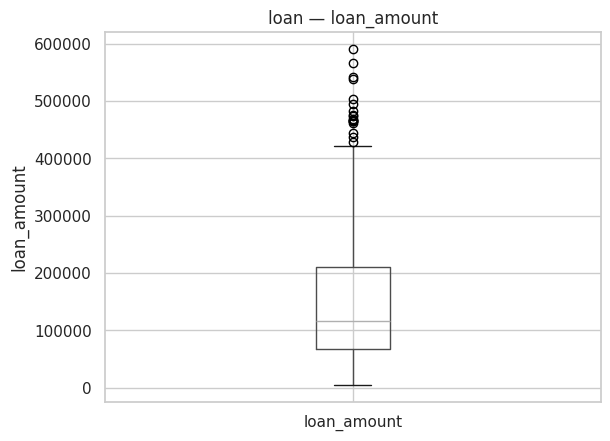

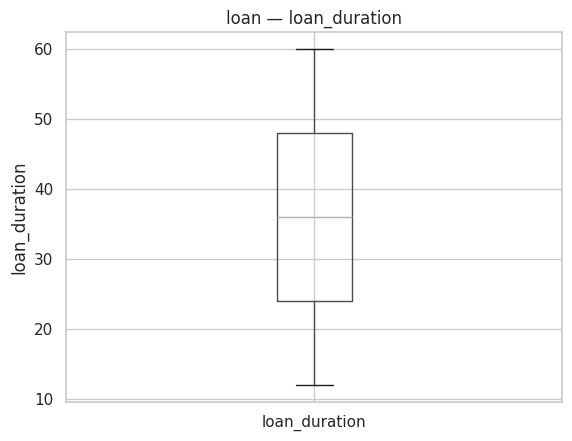

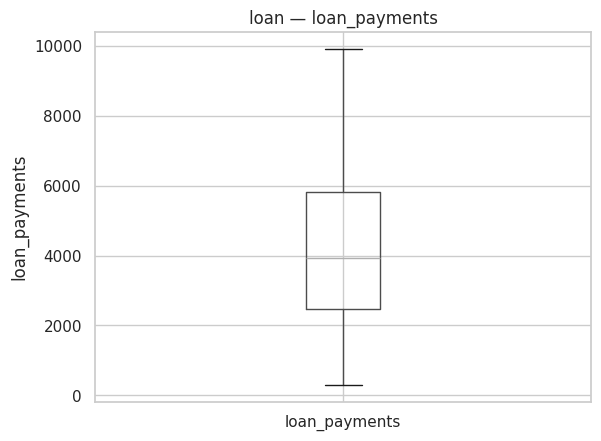

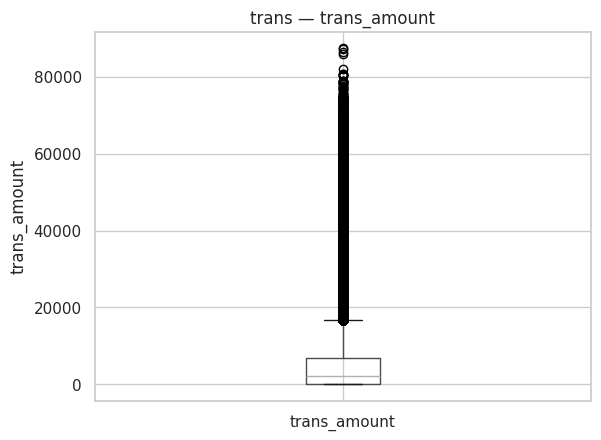

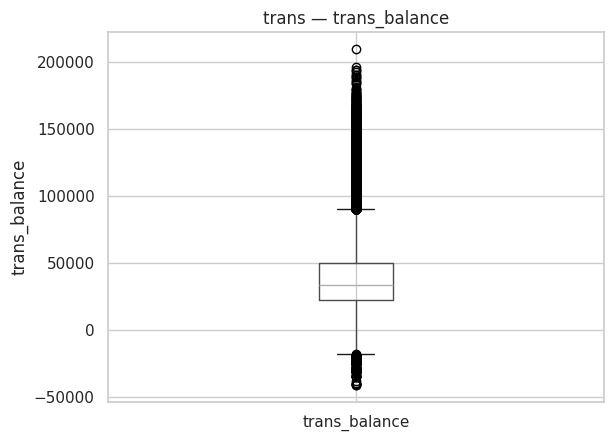

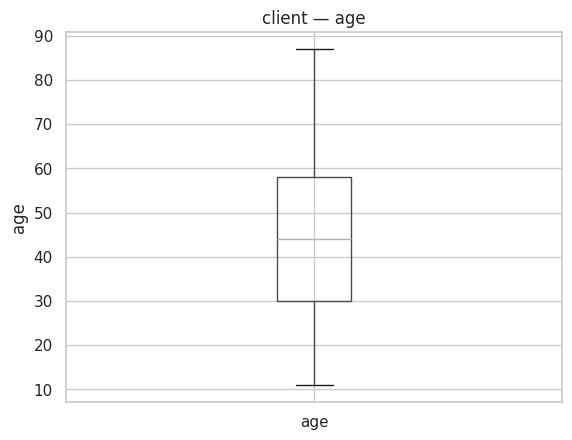

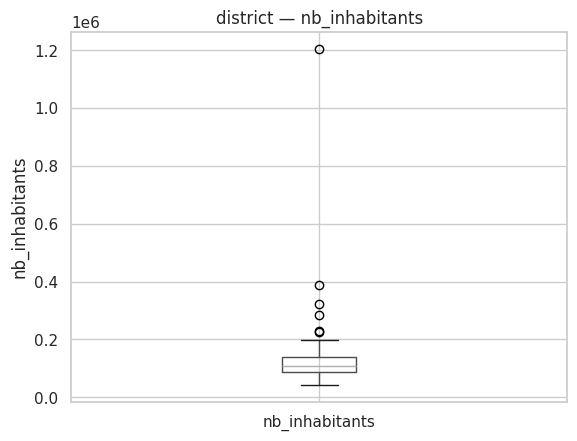

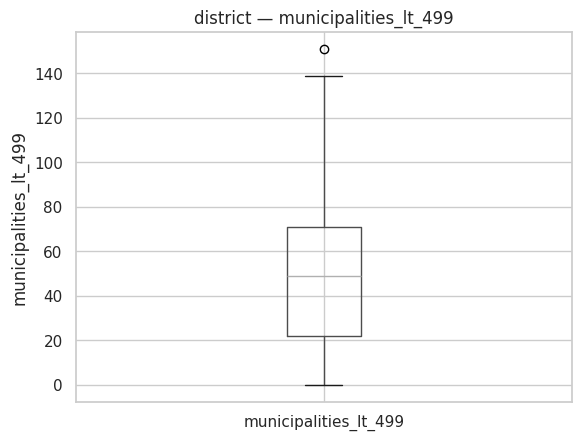

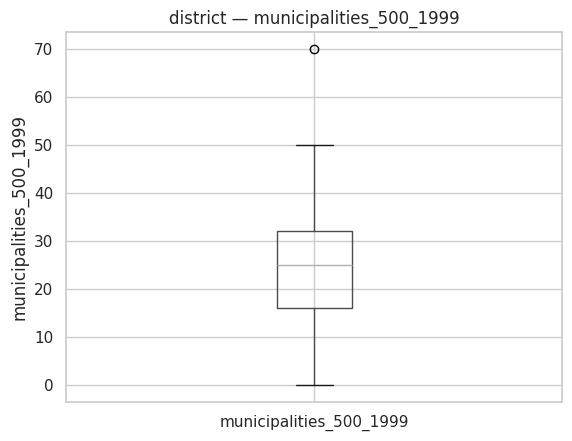

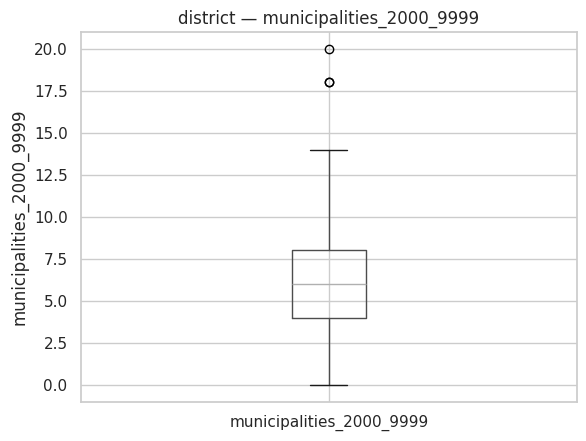

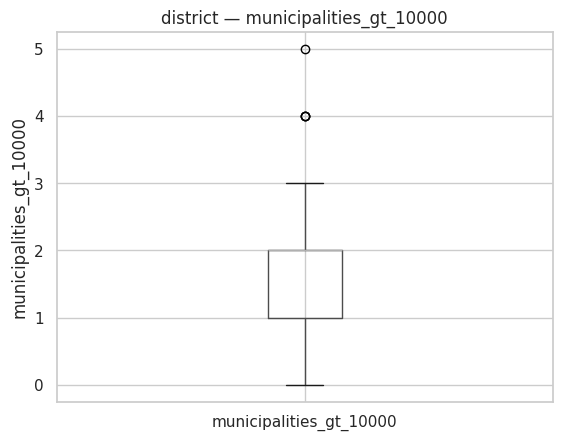

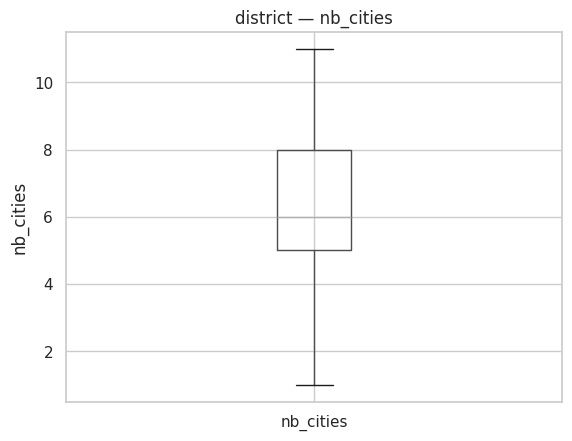

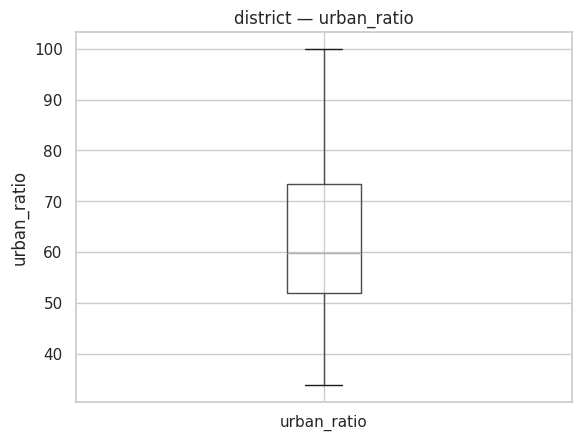

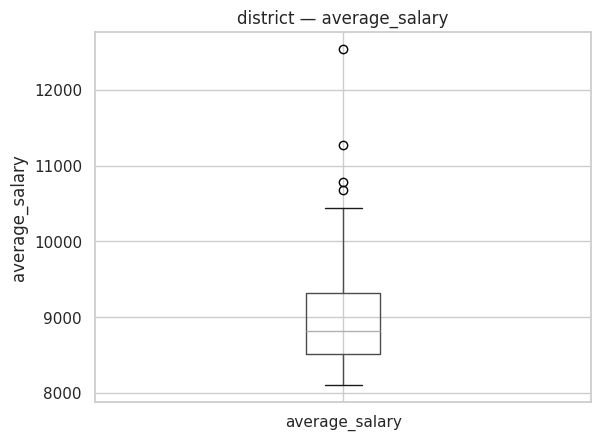

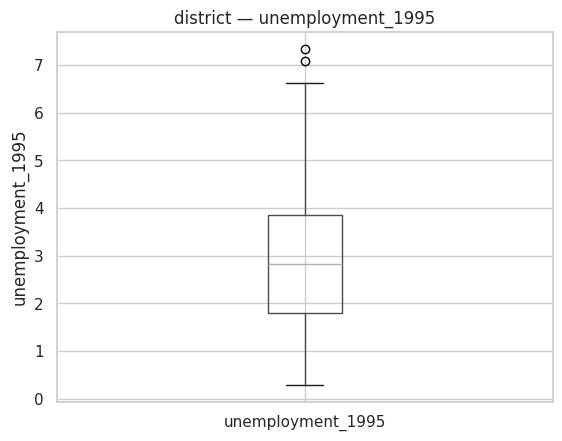

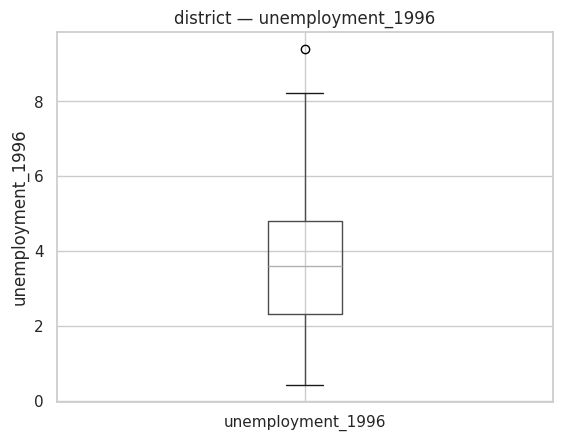

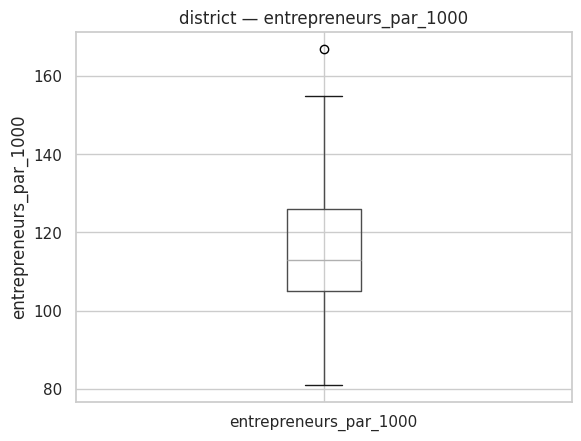

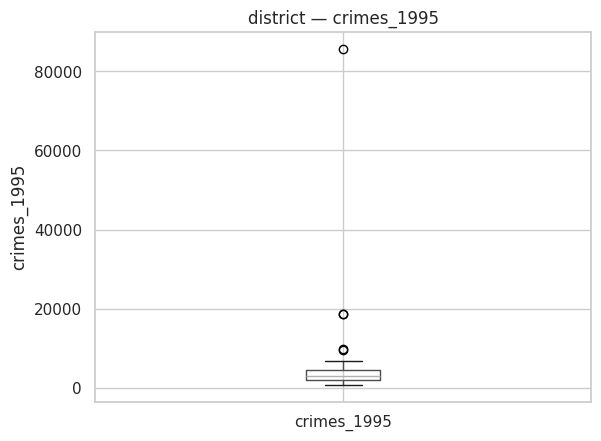

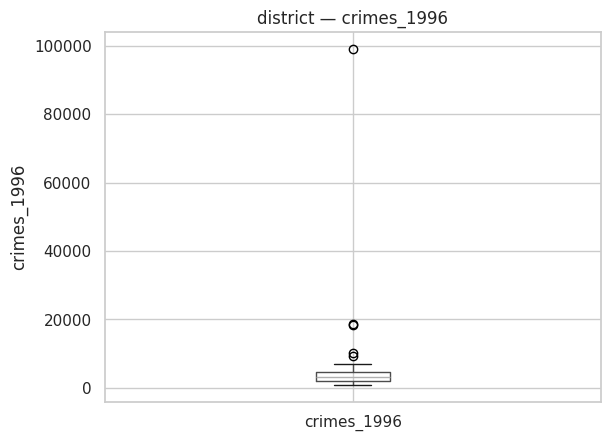

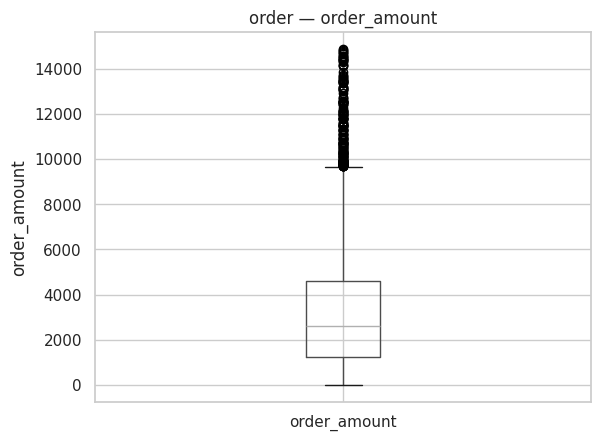

In [492]:
import pandas as pd
import matplotlib.pyplot as plt


dfs = {
    'loan'     : df_loan_clean,
    'account'  : df_account_clean,
    'card'     : df_card_clean,
    'trans'    : df_trans_clean,
    'client'   : df_client_clean,
    'district' : df_district_clean,
    'order'    : df_order_clean,
}


outlier_stats = []

for tbl_name, df in dfs.items():
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure()
        df.boxplot(column=col)
        plt.title(f'{tbl_name} — {col}')
        plt.ylabel(col)
        plt.show()


        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        n_out = ((df[col] < lower) | (df[col] > upper)).sum()

        outlier_stats.append({
            'table'       : tbl_name,
            'column'      : col,
            'lower_bound' : lower,
            'upper_bound' : upper,
            'n_outliers'  : n_out
        })




In [493]:
report_df = pd.DataFrame(outlier_stats)
report_df.sort_values(['table', 'n_outliers'], ascending=[True, False], inplace=True)
report_df.reset_index(drop=True, inplace=True)


report_df

table                    column  lower_bound  upper_bound  n_outliers
0     client                       age     -12.0000     100.0000           0
1   district            nb_inhabitants    6112.0000  218752.0000           6
2   district               crimes_1995   -1775.0000    8505.0000           5
3   district               crimes_1996   -1587.5000    8304.5000           5
4   district   municipalities_gt_10000      -0.5000       3.5000           4
5   district            average_salary    7304.5000   10524.5000           4
6   district  municipalities_2000_9999      -2.0000      14.0000           3
7   district         unemployment_1995      -1.3000       6.9400           2
8   district     municipalities_lt_499     -51.5000     144.5000           1
9   district   municipalities_500_1999      -8.0000      56.0000           1
10  district         unemployment_1996      -1.4100       8.5100           1
11  district    entrepreneurs_par_1000      73.5000     157.5000           1
12  district                 nb_cities       0.5000      12.5000           0
13  district               urban_ratio      19.5000     105.9000           0
14      loan               loan_amount -149151.0000  426537.0000          18
15      loan             loan_duration     -12.0000      84.0000           0
16      loan             loan_payments   -2527.7500   10818.2500           0
17     order              order_amount   -3816.5000    9671.5000         175
18     trans              trans_amount   -9860.2500   16796.1500      120215
19     trans             trans_balance  -18399.1875   90405.3125       34806

#**Exportation des données**

In [494]:
# df_client.to_csv("client_clean.csv", index=False)
# df_account.to_csv("account_clean.csv", index=False)
# df_trans.to_csv("transaction_clean.csv", index=False)
# df_loan.to_csv("loan_clean.csv", index=False)
# df_card.to_csv("card_clean.csv", index=False)
# df_order.to_csv("order_clean.csv", index=False)
# df_district.to_csv("district_clean.csv", index=False)
# df_disposition.to_csv("disposition_clean.csv", index=False)

#TABLES


In [495]:
df_disposition_clean.head(1)

disp_id client_id account_id disp_role
0       1         1          1     OWNER

In [496]:
df_client_clean.head(1)

client_id district_id birth_date gender  age
0         1          18 1970-12-13      F   28

In [497]:
df_account_clean.head(1)

account_id district_id sending_frequency account_date
0        576          55           mensuel   1993-01-01

In [498]:
df_district_clean.head(1)

district_id district_name  region  nb_inhabitants  municipalities_lt_499  \
0           1   Hl.m. Praha  Prague         1204953                      0   

   municipalities_500_1999  municipalities_2000_9999  municipalities_gt_10000  \
0                        0                         0                        1   

   nb_cities  urban_ratio  average_salary  unemployment_1995  \
0          1        100.0           12541               0.29   

   unemployment_1996  entrepreneurs_par_1000  crimes_1995  crimes_1996  
0               0.43                     167      85677.0      99107.0

In [499]:
df_card_clean.head(1)

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07

In [500]:
df_loan_clean.head(1)

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   

  loan_status  
0      défaut

In [501]:
df_trans_clean.head(1)

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   

   trans_balance order_type  bank_to order_account  
0          700.0    inconnu  inconnu       inconnu

In [502]:
df_order_clean.head(1)

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)

#**1 - PROBLÉMATIQUE 1 : Répartition des clients selon l’âge, sexe, localisation ou statut**


#**Jointures**

In [503]:
# === Jointure client + disposition ===
client_dispo = pd.merge(df_client_clean, df_disposition_clean, on="client_id", how="inner")

# === Jointure avec district ===
df_final_p_1 = pd.merge(client_dispo, df_district_clean, left_on="district_id", right_on="district_id", how="left")

# === Jointure avec loan
df_final_p_1_loan = pd.merge(df_final_p_1, df_loan_clean, on="account_id", how="left")


## **1 - Répartition par sexe**

In [504]:
df_client_clean.head()

client_id district_id birth_date gender  age
0         1          18 1970-12-13      F   28
1         2           1 1945-02-04      M   53
2         3           1 1940-10-09      F   58
3         4           5 1956-12-01      M   42
4         5           5 1960-07-03      F   38

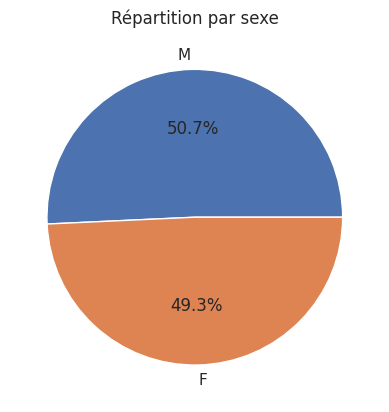

In [505]:
# Compter les sexes
sex_counts = df_client_clean['gender'].value_counts()

# Affichage
sex_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par sexe")
plt.ylabel('')
plt.show()


## **2 - Répartition par tranche d’âge**

In [506]:
# Créer des tranches
df_client_clean['tranche_age'] = pd.cut(df_client_clean['age'], bins=[0, 18, 30, 45, 60, 100],
                                labels=['<18', '18-30', '31-45', '46-60', '60+'])
df_client_clean.head()

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

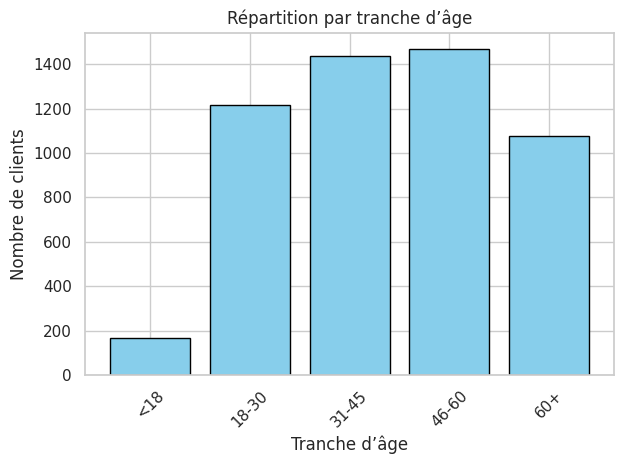

In [507]:
# Compter et afficher
df_client_clean['tranche_age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', width=0.8
, title="Répartition par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**3 - Répartition géographique**

In [508]:
# Top 10 des région
df_final_p_1["district_name"].value_counts().head(10)


district_name
Hl.m. Praha        663
Ostrava - mesto    180
Karvina            169
Brno - mesto       155
Zlin               109
Olomouc            104
Frydek - Mistek     86
Nachod              76
Usti nad Orlici     73
Kolin               71
Name: count, dtype: int64

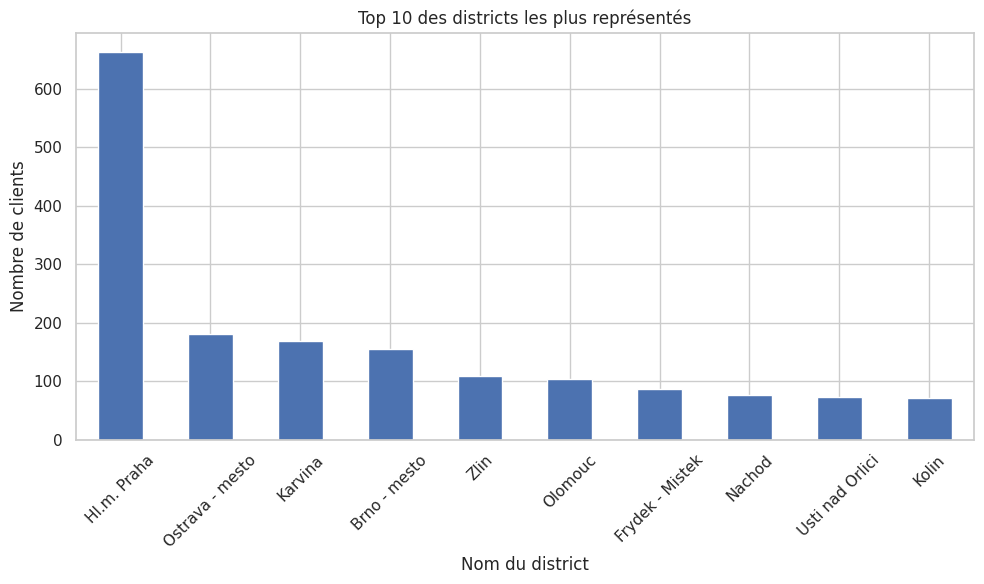

In [509]:
plt.figure(figsize=(10, 6))
df_final_p_1["district_name"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des districts les plus représentés")
plt.xlabel("Nom du district")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**4 -  Répartition par statut**

In [510]:
df_final_p_1_loan.head()

client_id district_id birth_date gender  age disp_id account_id  disp_role  \
0         1          18 1970-12-13      F   28       1          1      OWNER   
1         2           1 1945-02-04      M   53       2          2      OWNER   
2         3           1 1940-10-09      F   58       3          2  DISPONENT   
3         4           5 1956-12-01      M   42       4          3      OWNER   
4         5           5 1960-07-03      F   38       5          3  DISPONENT   

  district_name           region  nb_inhabitants  municipalities_lt_499  \
0         Pisek    south Bohemia           70699                     60   
1   Hl.m. Praha           Prague         1204953                      0   
2   Hl.m. Praha           Prague         1204953                      0   
3         Kolin  central Bohemia           95616                     65   
4         Kolin  central Bohemia           95616                     65   

   municipalities_500_1999  municipalities_2000_9999  municipalities_gt_10000  \
0                       13                         2                        1   
1                        0                         0                        1   
2                        0                         0                        1   
3                       30                         4                        1   
4                       30                         4                        1   

   nb_cities  urban_ratio  average_salary  unemployment_1995  \
0          4         65.3            8968               2.83   
1          1        100.0           12541               0.29   
2          1        100.0           12541               0.29   
3          6         51.4            9307               3.85   
4          6         51.4            9307               3.85   

   unemployment_1996  entrepreneurs_par_1000  crimes_1995  crimes_1996  \
0               3.35                     131       1740.0       1910.0   
1               0.43                     167      85677.0      99107.0   
2               0.43                     167      85677.0      99107.0   
3               4.43                     118       2616.0       3040.0   
4               4.43                     118       2616.0       3040.0   

  loan_id  loan_date  loan_amount  loan_duration  loan_payments loan_status  
0     NaN        NaT          NaN            NaN            NaN         NaN  
1    4959 1994-01-05      80952.0           24.0         3373.0       actif  
2    4959 1994-01-05      80952.0           24.0         3373.0       actif  
3     NaN        NaT          NaN            NaN            NaN         NaN  
4     NaN        NaT          NaN            NaN            NaN         NaN

In [511]:
df_final_p_1_loan["loan_status"].value_counts()
#[-3:]
#(normalize=True) * 100


loan_status
remboursé    493
actif        258
litige        45
défaut        31
Name: count, dtype: int64

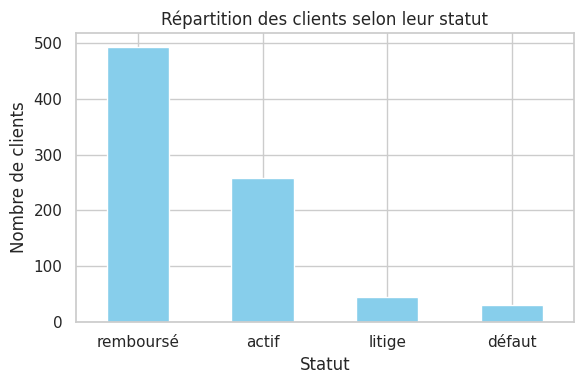

In [512]:
plt.figure(figsize=(6, 4))
df_final_p_1_loan["loan_status"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Répartition des clients selon leur statut")
plt.xlabel("Statut")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## check des tables

In [513]:
display(df_account_clean.head()), #ok

display(df_client_clean.head()), #copy
client = df_client_clean.copy() #ajout des tranches d'age

display(df_account_clean.head()),

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
display(df_order_clean.head()),
display(df_trans_clean.head())


account_id district_id sending_frequency account_date
0        576          55           mensuel   1993-01-01
1       3818          74           mensuel   1993-01-01
2        704          55           mensuel   1993-01-01
3       2378          16           mensuel   1993-01-01
4       2632          24           mensuel   1993-01-02

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date
0        576          55           mensuel   1993-01-01
1       3818          74           mensuel   1993-01-01
2        704          55           mensuel   1993-01-01
3       2378          16           mensuel   1993-01-01
4       2632          24           mensuel   1993-01-02

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  
0          700.0    inconnu  inconnu       inconnu  
1          900.0    inconnu  inconnu       inconnu  
2         1000.0    inconnu  inconnu       inconnu  
3          600.0    inconnu  inconnu       inconnu  
4          400.0    inconnu  inconnu       inconnu

#**2 - PROBLÉMATIQUE 2 : les types de comptes les plus utilisés, et avec quelle fréquence les opérations sont effectuées**






In [514]:
# La colonne 'frequency' (fréquence de frais ou de relevé)
df_account_clean['sending_frequency'].value_counts()

sending_frequency
mensuel              4167
hebdomadaire          240
après transaction      93
Name: count, dtype: int64

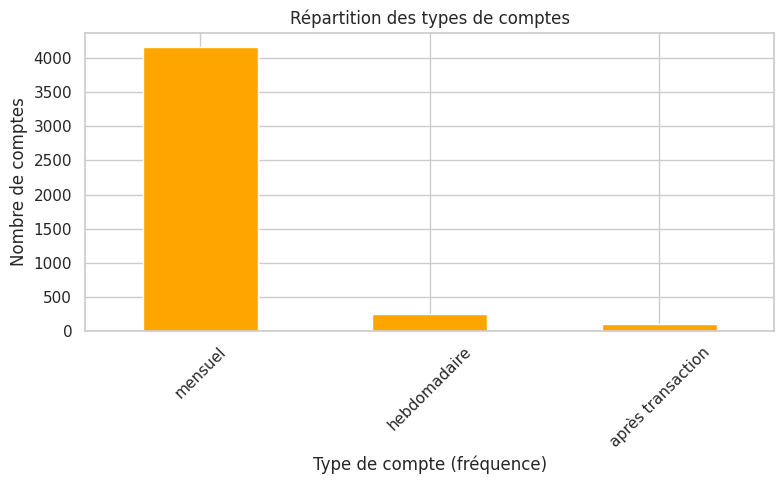

In [515]:
plt.figure(figsize=(8,5))
df_account_clean['sending_frequency'].value_counts().plot(kind='bar', color='orange')
plt.title("Répartition des types de comptes")
plt.xlabel("Type de compte (fréquence)")
plt.ylabel("Nombre de comptes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [516]:
# Nombre d'opérations par compte
transactions_per_account = df_trans_clean.groupby('account_id').size().reset_index(name='transaction_count')
transactions_per_account

account_id  transaction_count
0             1                239
1            10                156
2           100                405
3          1000                584
4         10001                248
...         ...                ...
4495        994                237
4496        995                219
4497        996                 78
4498        997                148
4499        998                341

[4500 rows x 2 columns]

In [517]:
# Jointure avec account_clean pour récupérer le type de compte
account_usage = pd.merge(df_account_clean, transactions_per_account, on='account_id', how='left')
account_usage

account_id district_id sending_frequency account_date  transaction_count
0           576          55           mensuel   1993-01-01                358
1          3818          74           mensuel   1993-01-01                560
2           704          55           mensuel   1993-01-01                479
3          2378          16           mensuel   1993-01-01                435
4          2632          24           mensuel   1993-01-02                564
...         ...         ...               ...          ...                ...
4495        124          55           mensuel   1997-12-28                 70
4496       3958          59           mensuel   1997-12-28                 47
4497        777          30           mensuel   1997-12-28                 79
4498       1573          63           mensuel   1997-12-29                 48
4499       3276           1           mensuel   1997-12-29                 69

[4500 rows x 5 columns]

In [518]:
account_usage['transaction_count'].sum()

np.int64(1056320)

In [519]:
account_usage['transaction_count'] = account_usage['transaction_count'].fillna(0)

In [520]:
account_usage['sending_frequency'].value_counts()

sending_frequency
mensuel              4167
hebdomadaire          240
après transaction      93
Name: count, dtype: int64

In [521]:
# === 5. Analyse : Moyenne d’opérations par type de compte ===
avg_transactions_by_type = account_usage.groupby('sending_frequency')['transaction_count'].mean().sort_values(ascending=False)

print("Nombre moyen d'opérations par type de compte :")
avg_transactions_by_type

Nombre moyen d'opérations par type de compte :


sending_frequency
après transaction    263.440860
hebdomadaire         260.695833
mensuel              232.602112
Name: transaction_count, dtype: float64

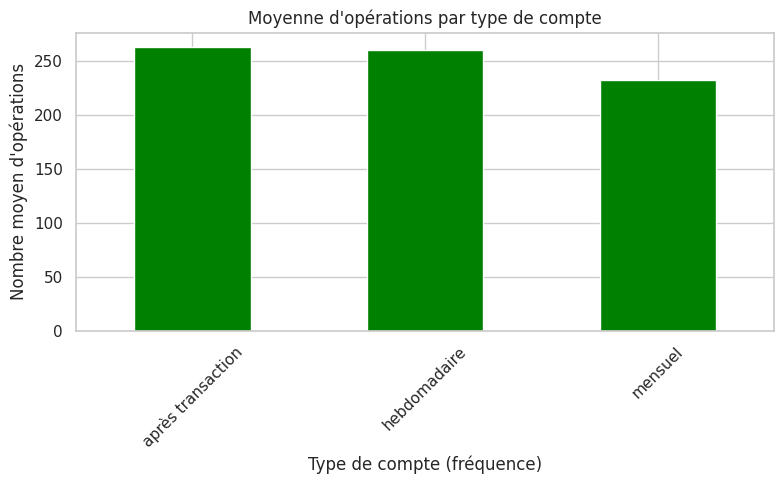

In [522]:
plt.figure(figsize=(8,5))
avg_transactions_by_type.plot(kind='bar', color='green')
plt.title("Moyenne d'opérations par type de compte")
plt.xlabel("Type de compte (fréquence)")
plt.ylabel("Nombre moyen d'opérations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# segmenter les compte et deduire un type par leur comportement

In [523]:
df_account_clean.head()

account_id district_id sending_frequency account_date
0        576          55           mensuel   1993-01-01
1       3818          74           mensuel   1993-01-01
2        704          55           mensuel   1993-01-01
3       2378          16           mensuel   1993-01-01
4       2632          24           mensuel   1993-01-02

In [524]:
df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  
0          700.0    inconnu  inconnu       inconnu  
1          900.0    inconnu  inconnu       inconnu  
2         1000.0    inconnu  inconnu       inconnu  
3          600.0    inconnu  inconnu       inconnu  
4          400.0    inconnu  inconnu       inconnu

In [525]:
# Regrouper les transactions par compte
agg_trans = df_trans_clean.groupby('account_id').agg(
    nb_operations_trans=('trans_amount', 'count'),
    montant_moyen_trans=('trans_amount', 'mean'),
    montant_total_trans=('trans_amount', 'sum'),
    balance_moyen_trans	 = ('trans_balance', 'mean'),
    balance_total_trans = ('trans_balance', 'sum'),
).reset_index().round(2)
agg_trans

account_id  nb_operations_trans  montant_moyen_trans  \
0             1                  239              1569.77   
1            10                  156              6670.55   
2           100                  405              4176.76   
3          1000                  584              8184.49   
4         10001                  248              5865.20   
...         ...                  ...                  ...   
4495        994                  237              3040.62   
4496        995                  219              1167.10   
4497        996                   78              2430.78   
4498        997                  148              1167.62   
4499        998                  341              9745.92   

      montant_total_trans  balance_moyen_trans  balance_total_trans  
0                375174.5             15994.01            3822568.0  
1               1040605.1             47792.13            7455571.8  
2               1691589.5             42188.19           17086216.1  
3               4779742.9             57893.06           33809548.4  
4               1454569.3             56285.16           13958720.3  
...                   ...                  ...                  ...  
4495             720626.1             40778.63            9664534.5  
4496             255594.3             20506.83            4490995.1  
4497             189600.5             20436.80            1594070.3  
4498             172807.8             24584.16            3638456.4  
4499            3323358.7             41224.81           14057661.6  

[4500 rows x 6 columns]

In [526]:
# Regrouper les transactions par compte
agg_trans_2 = df_trans_clean.groupby('account_id').agg(
    nb_operations_trans=('trans_amount', 'count'),
    montant_moyen_trans=('trans_amount', 'mean'),
    montant_total_trans=('trans_amount', 'sum'),
    balance_moyen_trans_mean	 = ('trans_balance', 'mean'),
    balance_total_trans_median = ('trans_balance', 'median'),
    balance_total_trans_std = ('trans_balance', 'std')
).reset_index().round(2)
agg_trans_2

account_id  nb_operations_trans  montant_moyen_trans  \
0             1                  239              1569.77   
1            10                  156              6670.55   
2           100                  405              4176.76   
3          1000                  584              8184.49   
4         10001                  248              5865.20   
...         ...                  ...                  ...   
4495        994                  237              3040.62   
4496        995                  219              1167.10   
4497        996                   78              2430.78   
4498        997                  148              1167.62   
4499        998                  341              9745.92   

      montant_total_trans  balance_moyen_trans_mean  \
0                375174.5                  15994.01   
1               1040605.1                  47792.13   
2               1691589.5                  42188.19   
3               4779742.9                  57893.06   
4               1454569.3                  56285.16   
...                   ...                       ...   
4495             720626.1                  40778.63   
4496             255594.3                  20506.83   
4497             189600.5                  20436.80   
4498             172807.8                  24584.16   
4499            3323358.7                  41224.81   

      balance_total_trans_median  balance_total_trans_std  
0                       15652.40                  3656.89  
1                       47675.80                 12152.31  
2                       42253.00                 12710.17  
3                       55959.15                 18120.69  
4                       54728.40                 15714.90  
...                          ...                      ...  
4495                    41631.20                 14111.96  
4496                    20189.40                  4001.34  
4497                    20229.70                  4463.06  
4498                    24770.05                  3780.72  
4499                    38671.50                 17448.85  

[4500 rows x 7 columns]

In [527]:
df_card_disp = pd.merge(df_card_clean, df_disposition_clean, on='disp_id', how='left')
df_card_disp

card_id disp_id card_type  card_date client_id account_id disp_role
0      1005    9285   classic 1993-11-07      9593       7753     OWNER
1       104     588   classic 1994-01-19       588        489     OWNER
2       747    4915   classic 1994-02-05      4915       4078     OWNER
3        70     439   classic 1994-02-08       439        361     OWNER
4       577    3687   classic 1994-02-15      3687       3050     OWNER
..      ...     ...       ...        ...       ...        ...       ...
887     125     694      gold 1998-12-26       694        577     OWNER
888     674    4360   classic 1998-12-28      4360       3614     OWNER
889     322    2063   classic 1998-12-28      2063       1698     OWNER
890     685    4467   classic 1998-12-29      4467       3705     OWNER
891     635    4083   classic 1998-12-29      4083       3377     OWNER

[892 rows x 7 columns]

In [528]:
# Créer une colonne binaire : 1 si le compte a un prêt
df_loan_clean['has_loan'] = 1
loan_flag = df_loan_clean[['account_id', 'has_loan']].drop_duplicates()

df_card_disp['has_card'] = 1
card_flag = df_card_disp[['account_id', 'has_card']].drop_duplicates()

# Fusion avec les données des comptes

df = (df_account_clean
      .merge(agg_trans_2, on='account_id', how='left')   # agrégats de transactions
      .merge(loan_flag, on='account_id', how='left')   # flag prêt
      .merge(card_flag, on='account_id', how='left') )




# df = pd.merge(df_account_clean, agg_trans, on='account_id', how='left')
# df = pd.merge(df, loan_flag, on='account_id', how='left')


df['has_loan'] = df['has_loan'].fillna(0)
df['has_card'] = df['has_card'].fillna(0)
df['nb_operations_trans'] = df['nb_operations_trans'].fillna(0)
df['montant_moyen_trans'] = df['montant_moyen_trans'].fillna(0)
df['montant_total_trans'] = df['montant_total_trans'].fillna(0)
df['balance_moyen_trans_mean'] = df['balance_moyen_trans_mean'].fillna(0)
df['balance_total_trans_median'] = df['balance_total_trans_median'].fillna(0)
df['balance_total_trans_std'] = df['balance_total_trans_std'].fillna(0)




  # balance_moyen_trans_mean	 = ('trans_balance', 'mean'),
  #   balance_total_trans_median = ('trans_balance', 'median'),
  #   balance_total_trans_std = ('trans_balance', 'std')

In [529]:
df.head()

account_id district_id sending_frequency account_date  nb_operations_trans  \
0        576          55           mensuel   1993-01-01                  358   
1       3818          74           mensuel   1993-01-01                  560   
2        704          55           mensuel   1993-01-01                  479   
3       2378          16           mensuel   1993-01-01                  435   
4       2632          24           mensuel   1993-01-02                  564   

   montant_moyen_trans  montant_total_trans  balance_moyen_trans_mean  \
0              2445.86             875619.3                  28105.39   
1              4916.42            2753196.2                  46475.52   
2              5584.32            2674889.2                  35043.13   
3             12220.62            5315969.9                  54666.03   
4              3893.83            2196122.0                  34629.73   

   balance_total_trans_median  balance_total_trans_std  has_loan  has_card  
0                     29780.8                  8235.32       0.0       0.0  
1                     46386.1                 11855.39       0.0       0.0  
2                     34715.6                 11199.24       0.0       0.0  
3                     50956.1                 26473.59       0.0       0.0  
4                     32806.5                  9834.53       0.0       0.0

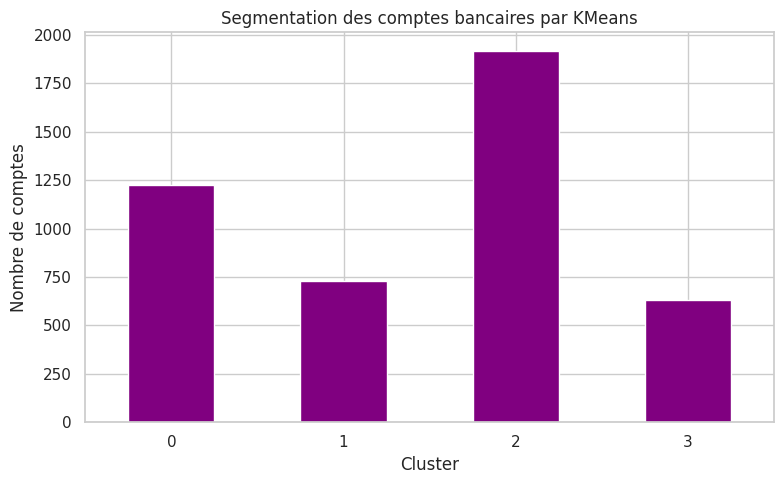

In [530]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Clustering avec KMeans


X = df[['nb_operations_trans', 'montant_moyen_trans', 'montant_total_trans', 'balance_moyen_trans_mean', 'balance_total_trans_median', 'balance_total_trans_std','has_loan', 'has_card']]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisation du résultat
plt.figure(figsize=(8, 5))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Segmentation des comptes bancaires par KMeans")
plt.xlabel("Cluster")
plt.ylabel("Nombre de comptes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [531]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans

KMeans(n_clusters=4, n_init=10, random_state=42)

In [532]:
# Moyenne des variables explicatives par cluster
resume_clusters = df.groupby('cluster')[['nb_operations_trans', 'montant_moyen_trans', 'montant_total_trans', 'balance_moyen_trans_mean', 'balance_total_trans_median', 'balance_total_trans_std','has_loan', 'has_card']].mean().round(2)
resume_clusters


nb_operations_trans  montant_moyen_trans  montant_total_trans  \
cluster                                                                  
0                     250.73              6523.15           1494839.98   
1                     312.18             12119.73           3596581.31   
2                     199.25              2499.63            473469.35   
3                     222.25              6840.29           1432959.35   

         balance_moyen_trans_mean  balance_total_trans_median  \
cluster                                                         
0                        39837.27                    38291.08   
1                        57965.52                    54961.00   
2                        22963.07                    22739.49   
3                        47625.00                    46638.94   

         balance_total_trans_std  has_loan  has_card  
cluster                                               
0                       14462.16      0.21      0.00  
1                       25868.85      0.42      0.36  
2                        6468.59      0.03      0.00  
3                       15035.15      0.09      1.00

In [533]:
# | Cluster | Segmentation comportementale                 | Type bancaire probable                                 |
# | ------- | -------------------------------------------- | ------------------------------------------------------ |
# | **0**   | Activité moyenne, pas de prêt                | 🧾 **Compte courant personnel standard**               |
# | **1**   | Compte très actif, flux élevés               | 💼 **Compte courant professionnel (TPE/PME) ou client très fortuné |
# | **2**   | Grosse activité, très gros flux, pas de prêt | 💰 **Livret épargne haut de gamme / Compte titre**     |
# | **3**   | Gros volumes + prêt                          | 💳 **Compte avec crédit (conso ou immo)**              |


In [534]:
def nom_cluster(row):
    if row['cluster'] == 0:
        return 'Compte courant'
    elif row['cluster'] == 1:
        return 'Compte courant pro'
    elif row['cluster'] == 2:
        return 'Compte épargne'
    elif row['cluster'] == 3:
        return 'Compte crédit'

df['type_compte_kmeans'] = df.apply(nom_cluster, axis=1)
df

account_id district_id sending_frequency account_date  \
0           576          55           mensuel   1993-01-01   
1          3818          74           mensuel   1993-01-01   
2           704          55           mensuel   1993-01-01   
3          2378          16           mensuel   1993-01-01   
4          2632          24           mensuel   1993-01-02   
...         ...         ...               ...          ...   
4495        124          55           mensuel   1997-12-28   
4496       3958          59           mensuel   1997-12-28   
4497        777          30           mensuel   1997-12-28   
4498       1573          63           mensuel   1997-12-29   
4499       3276           1           mensuel   1997-12-29   

      nb_operations_trans  montant_moyen_trans  montant_total_trans  \
0                     358              2445.86             875619.3   
1                     560              4916.42            2753196.2   
2                     479              5584.32            2674889.2   
3                     435             12220.62            5315969.9   
4                     564              3893.83            2196122.0   
...                   ...                  ...                  ...   
4495                   70              1278.60              89502.3   
4496                   47             11857.78             557315.8   
4497                   79             15889.65            1255282.1   
4498                   48              2542.41             122035.5   
4499                   69              2443.77             168619.8   

      balance_moyen_trans_mean  balance_total_trans_median  \
0                     28105.39                    29780.80   
1                     46475.52                    46386.10   
2                     35043.13                    34715.60   
3                     54666.03                    50956.10   
4                     34629.73                    32806.50   
...                        ...                         ...   
4495                  17890.79                    17469.95   
4496                  42209.00                    40446.10   
4497                  73277.63                    71737.60   
4498                  16087.12                    16338.45   
4499                  32718.38                    34338.90   

      balance_total_trans_std  has_loan  has_card  cluster  type_compte_kmeans  
0                     8235.32       0.0       0.0        2      Compte épargne  
1                    11855.39       0.0       0.0        0      Compte courant  
2                    11199.24       0.0       0.0        0      Compte courant  
3                    26473.59       0.0       0.0        1  Compte courant pro  
4                     9834.53       0.0       0.0        0      Compte courant  
...                       ...       ...       ...      ...                 ...  
4495                  4624.41       0.0       0.0        2      Compte épargne  
4496                 15394.89       0.0       0.0        0      Compte courant  
4497                 26806.19       0.0       0.0        1  Compte courant pro  
4498                  4470.42       0.0       0.0        2      Compte épargne  
4499                  9456.34       0.0       0.0        2      Compte épargne  

[4500 rows x 14 columns]

In [535]:
df_account_clean.head()

account_id district_id sending_frequency account_date
0        576          55           mensuel   1993-01-01
1       3818          74           mensuel   1993-01-01
2        704          55           mensuel   1993-01-01
3       2378          16           mensuel   1993-01-01
4       2632          24           mensuel   1993-01-02

In [536]:
df_trans_clean = df_trans_clean.merge(df[['account_id', 'type_compte_kmeans']], on='account_id', how='left')
df_account_clean = df_account_clean.merge(df[['account_id', 'type_compte_kmeans']], on='account_id', how='left')

In [537]:
df_account_clean.head()

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

In [538]:
df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  
1          900.0    inconnu  inconnu       inconnu      Compte épargne  
2         1000.0    inconnu  inconnu       inconnu      Compte courant  
3          600.0    inconnu  inconnu       inconnu      Compte courant  
4          400.0    inconnu  inconnu       inconnu      Compte épargne

In [539]:
df_account_clean['type_compte_kmeans'].value_counts().sort_index()

type_compte_kmeans
Compte courant        1226
Compte courant pro     727
Compte crédit          630
Compte épargne        1917
Name: count, dtype: int64

In [540]:
df_trans_clean['type_compte_kmeans'].value_counts().sort_index()

type_compte_kmeans
Compte courant        307395
Compte courant pro    226952
Compte crédit         140015
Compte épargne        381958
Name: count, dtype: int64

In [541]:
df_loan_clean.shape

(682, 8)

In [542]:
# agg_df = df.groupby(['type_compte_kmeans', 'sending_frequency']).agg(
#     {'nb_operations_trans': 'count','montant_total_trans': 'sum'}
#     ).reset_index().round(2)
trans = df_trans_clean.groupby(['type_compte_kmeans','trans_type', 'operation']).size().reset_index(name='nb_transactions')
trans



type_compte_kmeans trans_type           operation  nb_transactions
0       Compte courant     credit    depot en especes            52110
1       Compte courant     credit             inconnu            52595
2       Compte courant     credit    virement entrant             8341
3       Compte courant      debit  retrait en especes           125760
4       Compte courant      debit    virement sortant            65042
5       Compte courant    retrait  retrait en especes             3547
6   Compte courant pro     credit    depot en especes            41446
7   Compte courant pro     credit             inconnu            36807
8   Compte courant pro     credit    virement entrant             7957
9   Compte courant pro      debit  retrait en especes            92978
10  Compte courant pro      debit   retrait par carte             1788
11  Compte courant pro      debit    virement sortant            34117
12  Compte courant pro    retrait  retrait en especes            11859
13       Compte crédit     credit    depot en especes            25362
14       Compte crédit     credit             inconnu            24021
15       Compte crédit     credit    virement entrant             3030
16       Compte crédit      debit  retrait en especes            53944
17       Compte crédit      debit   retrait par carte             6208
18       Compte crédit      debit    virement sortant            26416
19       Compte crédit    retrait  retrait en especes             1034
20      Compte épargne     credit    depot en especes            37825
21      Compte épargne     credit             inconnu            69691
22      Compte épargne     credit    virement entrant            45898
23      Compte épargne      debit  retrait en especes           145570
24      Compte épargne      debit   retrait par carte               40
25      Compte épargne      debit    virement sortant            82708
26      Compte épargne    retrait  retrait en especes              226

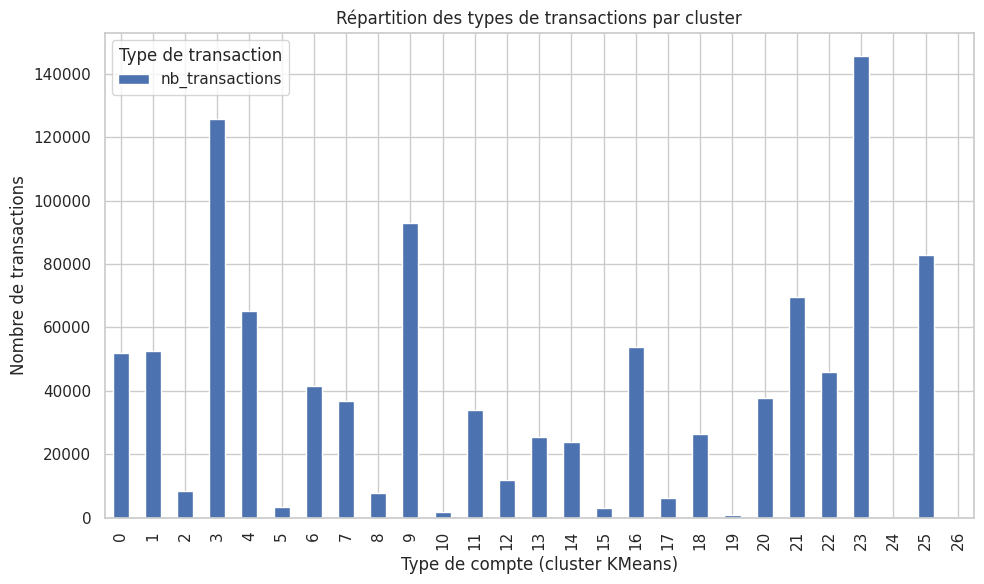

In [543]:
import pandas as pd

# Regrouper les données par type de compte et trans_type
#bar_data = trans.groupby(['type_compte_kmeans', 'trans_type'])['nb_transactions'].sum().unstack()

trans.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des types de transactions par cluster")
plt.xlabel("Type de compte (cluster KMeans)")
plt.ylabel("Nombre de transactions")
plt.legend(title='Type de transaction')
plt.tight_layout()
plt.show()


In [544]:

import plotly.express as px

fig = px.bar(
    trans,
    x='type_compte_kmeans',
    y='nb_transactions',
    color='trans_type',
    hover_data=['operation'],
    title='Nombre de transactions par type de compte et type de transaction',
    barmode='stack'
)
fig.show()


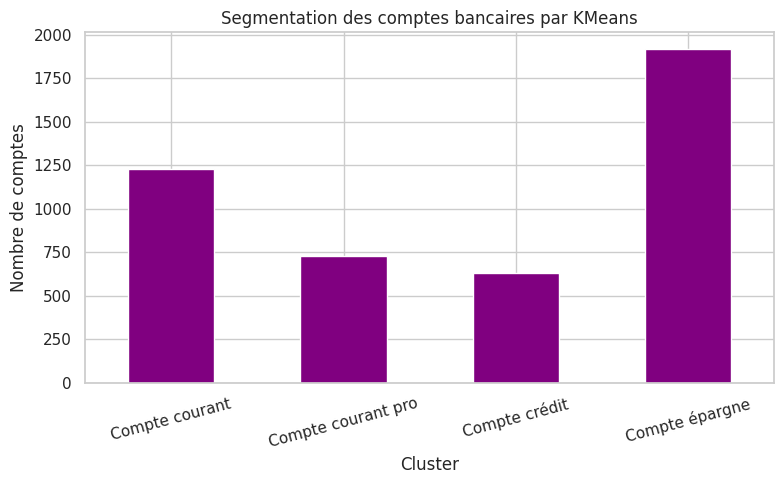

In [545]:
# Visualisation du résultat nb de comptes
plt.figure(figsize=(8, 5))
df_account_clean['type_compte_kmeans'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Segmentation des comptes bancaires par KMeans")
plt.xlabel("Cluster")
plt.ylabel("Nombre de comptes")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


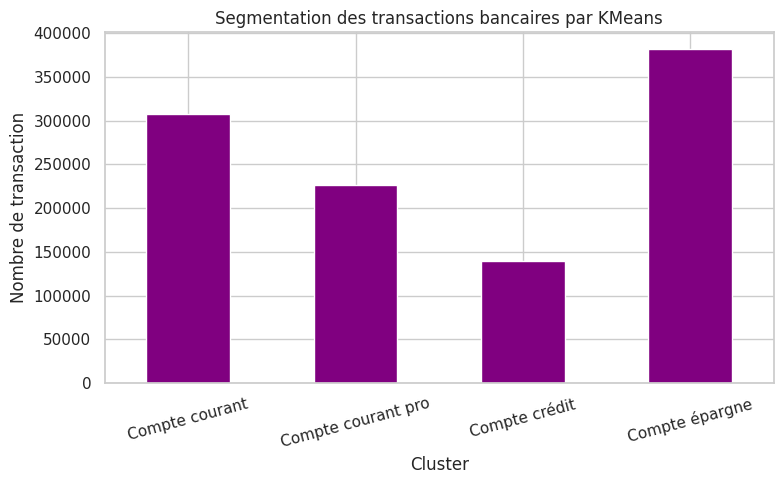

In [546]:
# Visualisation du résultat nb de transaction ===
plt.figure(figsize=(8, 5))
df_trans_clean['type_compte_kmeans'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Segmentation des transactions bancaires par KMeans")
plt.xlabel("Cluster")
plt.ylabel("Nombre de transaction")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [547]:
# Regrouper par ty compte
agg = df.groupby(['type_compte_kmeans','sending_frequency']).size().reset_index(name='nb_compte')
agg

type_compte_kmeans  sending_frequency  nb_compte
0       Compte courant  après transaction         29
1       Compte courant       hebdomadaire         78
2       Compte courant            mensuel       1119
3   Compte courant pro  après transaction         56
4   Compte courant pro       hebdomadaire        133
5   Compte courant pro            mensuel        538
6        Compte crédit  après transaction          5
7        Compte crédit       hebdomadaire         21
8        Compte crédit            mensuel        604
9       Compte épargne  après transaction          3
10      Compte épargne       hebdomadaire          8
11      Compte épargne            mensuel       1906

In [548]:
agg_df = df.groupby(['type_compte_kmeans', 'sending_frequency']).agg(
    {'nb_operations_trans': 'count','montant_total_trans': 'sum'}
    ).reset_index().round(2)

agg_df

type_compte_kmeans  sending_frequency  nb_operations_trans  \
0       Compte courant  après transaction                   29   
1       Compte courant       hebdomadaire                   78   
2       Compte courant            mensuel                 1119   
3   Compte courant pro  après transaction                   56   
4   Compte courant pro       hebdomadaire                  133   
5   Compte courant pro            mensuel                  538   
6        Compte crédit  après transaction                    5   
7        Compte crédit       hebdomadaire                   21   
8        Compte crédit            mensuel                  604   
9       Compte épargne  après transaction                    3   
10      Compte épargne       hebdomadaire                    8   
11      Compte épargne            mensuel                 1906   

    montant_total_trans  
0          5.242975e+07  
1          1.251300e+08  
2          1.655114e+09  
3          2.008094e+08  
4          5.043792e+08  
5          1.909526e+09  
6          6.599804e+06  
7          3.041674e+07  
8          8.657478e+08  
9          2.160418e+06  
10         5.254063e+06  
11         9.002263e+08

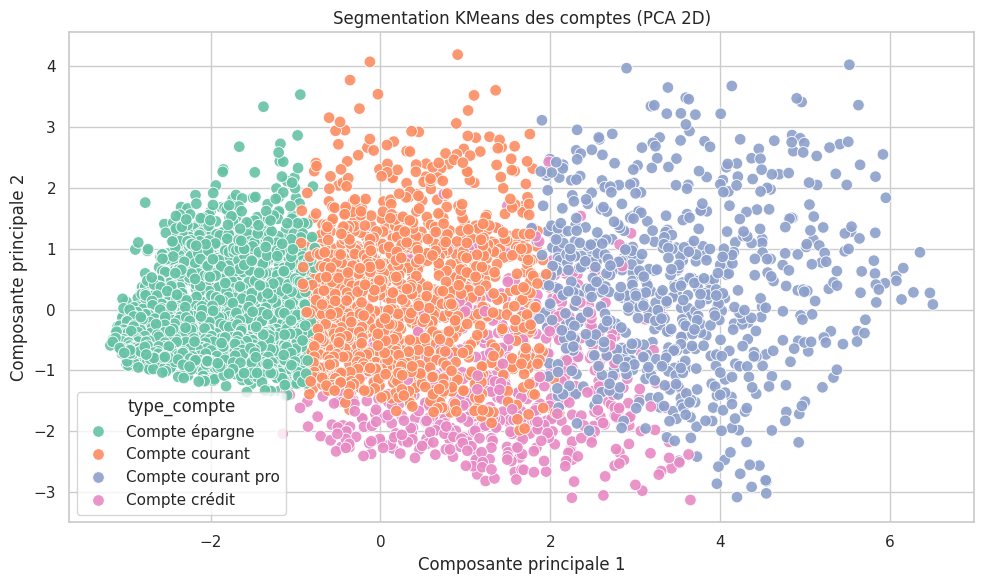

In [549]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Graphique
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='PC1', y='PC2', hue='type_compte_kmeans', palette='Set2', s=70, alpha=0.9)
plt.title("Segmentation KMeans des comptes (PCA 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='type_compte')
plt.tight_layout()
plt.show()


In [550]:
# Composante principale 1 (axe horizontal) :
# Probablement corrélée aux flux monétaires (montants d’opérations, soldes, etc.)
# Va de comptes à flux faibles (gauche) à très élevés (droite)

# Composante principale 2 (axe vertical) :
# Peut refléter la variabilité ou fréquence des opérations (ou une distinction actif/passif)
# Haut : comptes avec activité régulière
# Bas : comptes plus passifs ou déséquilibrés (comme crédit ou livret peu utilisé)


In [551]:
components = pca.fit_transform(X_scaled)
components


array([[-1.19359645,  0.93026444],
       [ 1.10440671,  2.08246682],
       [ 0.33490094,  1.84853478],
       ...,
       [ 3.46476599, -2.15681944],
       [-2.7584996 , -0.73854294],
       [-1.45400404, -1.04083475]])

## Check des tables

In [552]:
display(df_loan_clean.head()),
loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
display(df_order_clean.head()),
display(df_trans_clean.head()),
transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans


loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  
1          900.0    inconnu  inconnu       inconnu      Compte épargne  
2         1000.0    inconnu  inconnu       inconnu      Compte courant  
3          600.0    inconnu  inconnu       inconnu      Compte courant  
4          400.0    inconnu  inconnu       inconnu      Compte épargne

#**3 - PROBLÉMATIQUE 3 : le volume mensuel ou annuel des transactions ? Y a-t-il une saisonnalité dans les dépenses ?**

In [553]:
df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  
1          900.0    inconnu  inconnu       inconnu      Compte épargne  
2         1000.0    inconnu  inconnu       inconnu      Compte courant  
3          600.0    inconnu  inconnu       inconnu      Compte courant  
4          400.0    inconnu  inconnu       inconnu      Compte épargne

In [554]:
df_trans_clean['year'] = df_trans['trans_date'].dt.year
df_trans_clean['month'] = df_trans['trans_date'].dt.month
df_trans_clean['month'] = df_trans['trans_date'].dt.month
df_trans_clean['day'] = df_trans['trans_date'].dt.day
df_trans_clean['periode'] = df_trans['trans_date'].dt.to_period('M')

df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

In [555]:
# Nombre de transactions par mois
tx_count = df_trans_clean.groupby("periode")["trans_id"].count()

# Montant total des transactions par mois
tx_sum = df_trans_clean.groupby("periode")["trans_amount"].sum()

# Regroupement dans un DataFrame
monthly_stats = pd.DataFrame({
    "transactions_count": tx_count,
    "transactions_sum": tx_sum
}).reset_index()

monthly_stats["periode"] = monthly_stats["periode"].astype(str)
monthly_stats


periode  transactions_count  transactions_sum
0   1993-01                 177          702157.6
1   1993-02                 395         2726925.3
2   1993-03                 676         4730318.6
3   1993-04                 913         7378367.8
4   1993-05                1306        11680753.4
..      ...                 ...               ...
67  1998-08               25622       150639332.7
68  1998-09               25450       148297693.4
69  1998-10               25689       151889623.6
70  1998-11               25341       148842093.6
71  1998-12               23553       171697093.7

[72 rows x 3 columns]

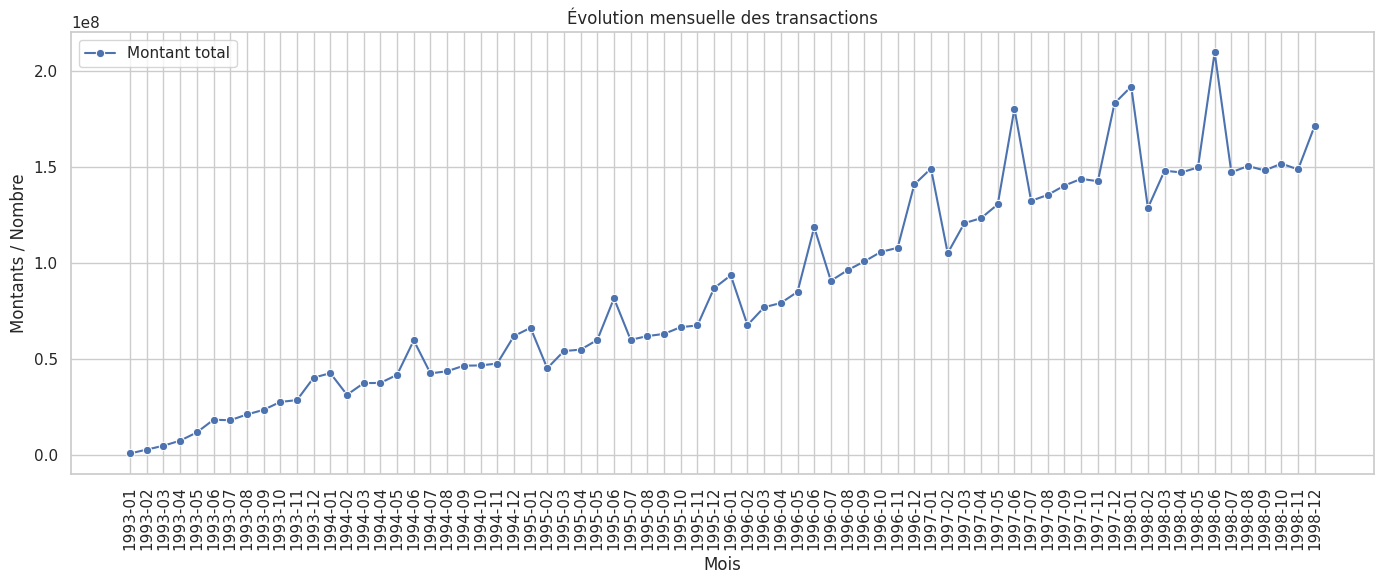

In [556]:
#Visualisation des tendances

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(x="periode", y="transactions_sum", data=monthly_stats, marker="o", label="Montant total")
#sns.lineplot(x="periode", y="transactions_count", data=monthly_stats, marker="o", label="Nb opérations")

plt.title("Évolution mensuelle des transactions")
plt.xlabel("Mois")
plt.ylabel("Montants / Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


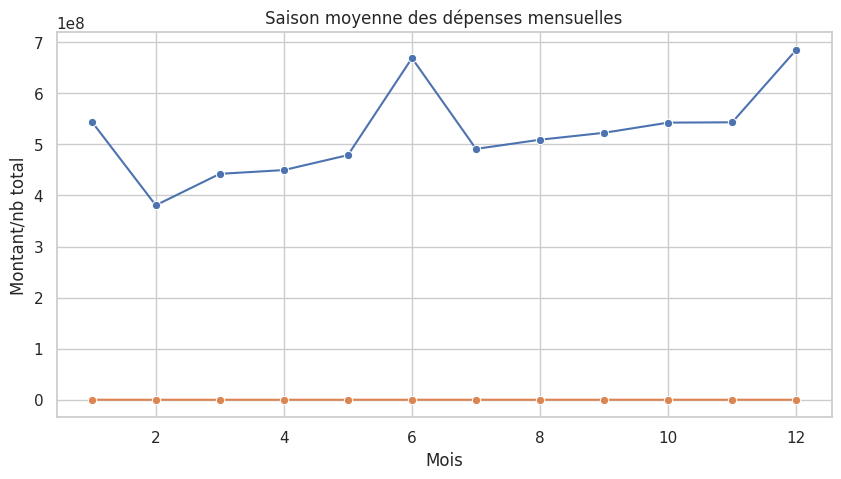

In [557]:
#Détection de la saisonnalité
# Moyenne mensuelle toutes années confondues
seasonal_avg = df_trans_clean.groupby("month")["trans_amount"].sum().reset_index()
seasonal_nb = df_trans_clean.groupby("month")["trans_id"].count().reset_index()

#seasonal_avg

plt.figure(figsize=(10, 5))
#sns.barplot(x="month", y="trans_amount", data=seasonal_avg)
sns.lineplot(x="month", y="trans_amount", data=seasonal_avg, marker="o")
sns.lineplot(x="month", y='trans_id', data=seasonal_nb, marker="o")

plt.title("Saison moyenne des dépenses mensuelles")
plt.xlabel("Mois")
plt.ylabel("Montant/nb total")
plt.show()


In [558]:
seasonal_nb

month  trans_id
0       1    122214
1       2     70382
2       3     75364
3       4     76954
4       5     79931
5       6     88276
6       7     83791
7       8     86204
8       9     87955
9      10     90839
10     11     91890
11     12    102520

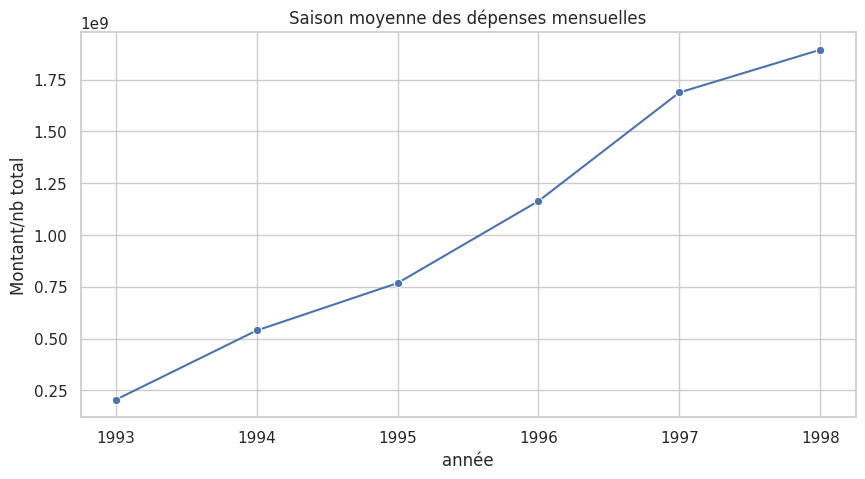

In [559]:
#Détection de la saisonnalité
# Moyenne mensuelle toutes années confondues
seasonal_avg = df_trans_clean.groupby("year")["trans_amount"].sum().reset_index()
seasonal_nb = df_trans_clean.groupby("year")["trans_id"].count().reset_index()

#seasonal_avg

plt.figure(figsize=(10, 5))
#sns.barplot(x="year", y="trans_amount", data=seasonal_avg)
sns.lineplot(x="year", y="trans_amount", data=seasonal_avg, marker="o")
#sns.lineplot(x="year", y='trans_id', data=seasonal_nb, marker="o")

plt.title("Saison moyenne des dépenses mensuelles")
plt.xlabel("année")
plt.ylabel("Montant/nb total")
plt.show()


#**time series**

In [560]:
df_time = df_trans_clean.copy()
df_time.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

In [561]:
df_time.set_index("trans_date", inplace=True)

# Option 1 : montant total mensuel
ts_montant = df_time["trans_amount"].resample("M").sum()

# Option 2 : nombre de transactions mensuel
#ts_count = df["amount"].resample("M").count()
print(ts_montant.head())


trans_date
1993-01-31      702157.6
1993-02-28     2726925.3
1993-03-31     4730318.6
1993-04-30     7378367.8
1993-05-31    11680753.4
Freq: ME, Name: trans_amount, dtype: float64


/tmp/ipython-input-561-1263909039.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



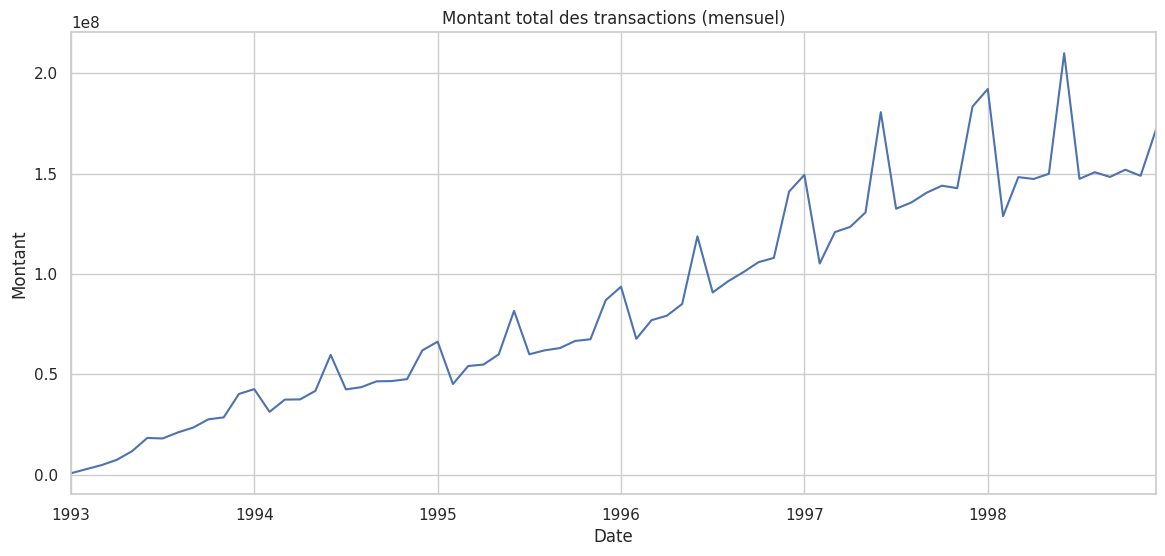

In [562]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
ts_montant.plot(title="Montant total des transactions (mensuel)")
plt.ylabel("Montant")
plt.xlabel("Date")
plt.grid(True)
plt.show()


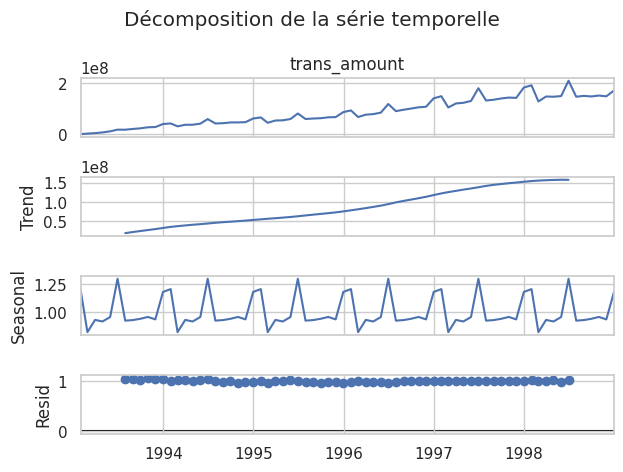

In [563]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_montant, model='multiplicative')  # multiplicative parce quevariance croissante

decomposition.plot()
plt.suptitle("Décomposition de la série temporelle")
plt.tight_layout()
plt.show()


In [564]:
# Tendance : Évolution globale sur le long terme
# Saison : Motifs récurrents chaque année (périodicité)
# Résidu : Événements irréguliers

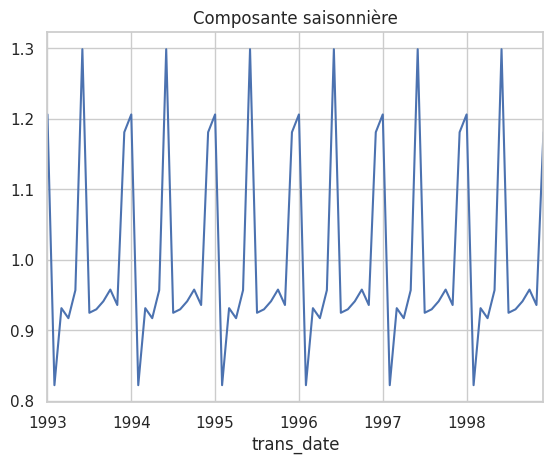

In [565]:
decomposition.seasonal.plot(title="Composante saisonnière")
plt.show()

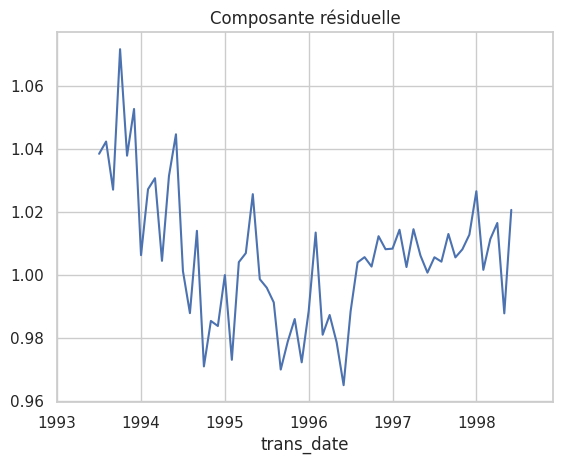

In [566]:
decomposition.resid.plot(title="Composante résiduelle")
plt.show()


In [567]:
# Amplitude modérée des variations
# Les résidus oscillent autour de la valeur 1.00, ce qui signifie que les écarts à la tendance + saison sont faibles (max ~1.06, min ~0.96).
# → Le modèle capte bien la structure globale de la série.

# Aucune tendance forte apparente
# Pas de dérive claire à la hausse ou à la baisse : les résidus sont stationnaires autour de 1.
# → Cela indique que la tendance et la saisonnalité ont été correctement extraites.

# Quelques pics irréguliers
# Des pics en 1993-1994, en 1995, et un peu en 1998.
# → Cela pourrait indiquer des anomalies ponctuelles, ou des événements exceptionnels (ex : opération massive, erreur, effet externe).

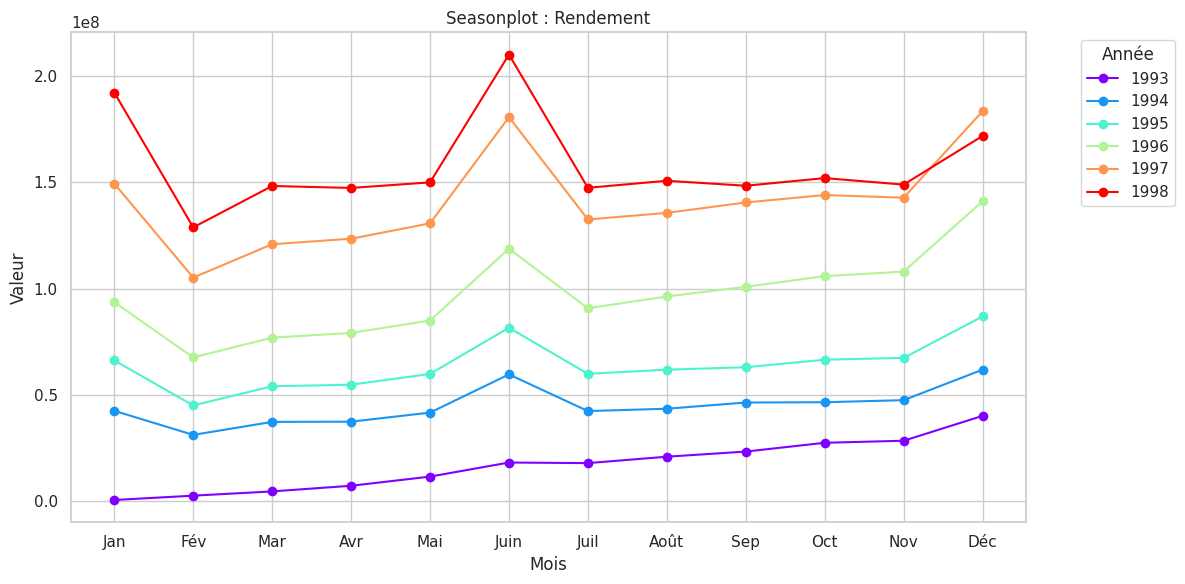

In [568]:
import matplotlib.cm as cm

df_season = ts_montant.to_frame(name='valeur')
df_season['année'] = df_season.index.year
df_season['mois'] = df_season.index.month

# Pivot pour lignes = mois, colonnes = années
df_pivot = df_season.pivot(index='mois', columns='année', values='valeur')

# Tracé
plt.figure(figsize=(12, 6))
colors = cm.rainbow(np.linspace(0, 1, df_pivot.shape[1]))

for i, col in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[col], label=str(col), color=colors[i], marker="o")

plt.title("Seasonplot : Rendement")
plt.xlabel("Mois")
plt.ylabel("Valeur")
plt.xticks(ticks=range(1,13), labels=[
    "Jan", "Fév", "Mar", "Avr", "Mai", "Juin",
    "Juil", "Août", "Sep", "Oct", "Nov", "Déc"
])
plt.legend(title="Année", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

/tmp/ipython-input-569-430048858.py:23: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



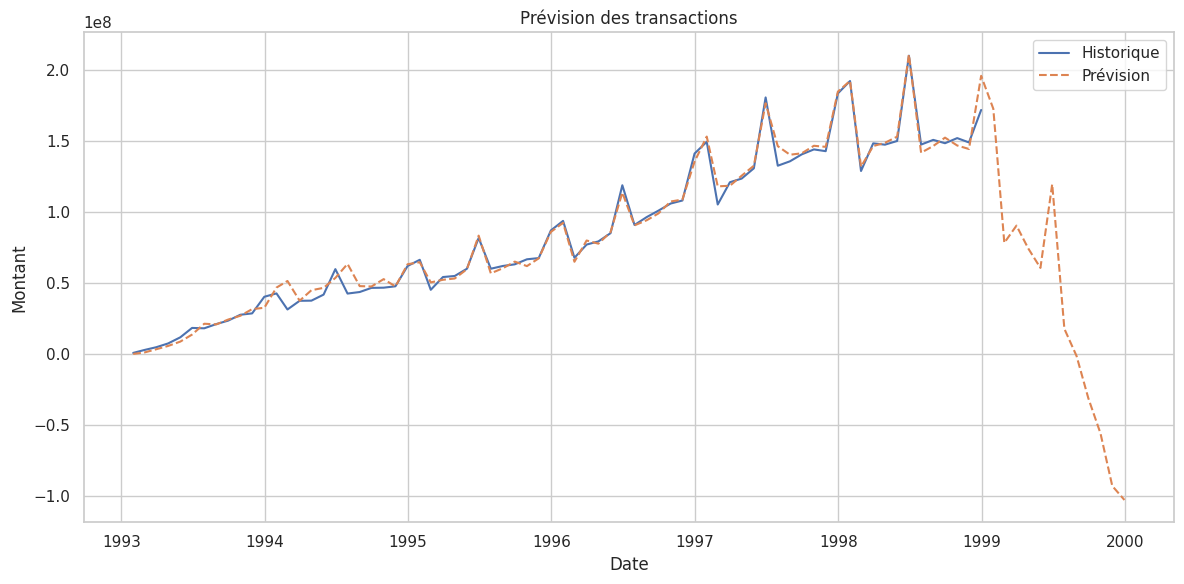

In [569]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Préparation des données (index datetime et colonnes 'ds' et 'y')
df_ts = ts_montant.reset_index()
df_ts.columns = ['ds', 'y']
df_ts['ds'] = pd.to_datetime(df_ts['ds'])  # S'assurer que ds est en datetime
df_ts.set_index('ds', inplace=True)

# Entraînement du modèle SARIMA
#model = auto_arima(df_ts['y'], seasonal=True, m=12, trace=True, error_action='ignore')
model = SARIMAX(df_ts['y'],  # <- endog ici !
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Prévision sur 36 mois à venir
# On étend l'index avec 36 dates supplémentaires
future_dates = pd.date_range(start=df_ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
df_forecast_index = df_ts.index.union(future_dates)

# Prédictions complètes
forecast = results.predict(start=0, end=len(df_forecast_index)-1)

# 4. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_ts.index, df_ts['y'], label='Historique')
plt.plot(df_forecast_index, forecast, label='Prévision', linestyle='--')
plt.title("Prévision des transactions")
plt.xlabel("Date")
plt.ylabel("Montant")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Check des tables

In [570]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
display(df_order_clean.head()),

display(df_trans_clean.head()),
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans


loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

(None,)

#**4 - PROBLÉMATIQUE 4 : Quel est le solde moyen par région ou par groupe d’âge ? Y a-t-il des différences significatives selon le sexe ou la zone géographique ?**

#**Jointure**

In [571]:
pd.set_option('display.max_columns', 500)

In [572]:
df_district_clean['region'].value_counts()

region
south Moravia      14
central Bohemia    12
east Bohemia       11
north Moravia      11
west Bohemia       10
north Bohemia      10
south Bohemia       8
Prague              1
Name: count, dtype: int64

In [573]:
# Fusion avec les comptes (account) pour récupérer les dates et district_id
client_dispo_account = pd.merge(client_dispo, df_account, on="account_id")

# Renommage pour éviter le conflit de colonnes
client_dispo_account = client_dispo_account.rename(columns={"district_id_y": "district_id"})
client_dispo_account = client_dispo_account.drop(columns=["district_id_x"])

# Fusion avec la table des districts (avec colonnes renommées)
client_account = pd.merge(client_dispo_account, df_district, on="district_id", how="left")
client_account.head()

client_id birth_date gender  age disp_id account_id  disp_role district_id  \
0         1 1970-12-13      F   28       1          1      OWNER          18   
1         2 1945-02-04      M   53       2          2      OWNER           1   
2         3 1940-10-09      F   58       3          2  DISPONENT           1   
3         4 1956-12-01      M   42       4          3      OWNER           5   
4         5 1960-07-03      F   38       5          3  DISPONENT           5   

  sending_frequency account_date district_name           region  \
0           mensuel   1995-03-24         Pisek    south Bohemia   
1           mensuel   1993-02-26   Hl.m. Praha           Prague   
2           mensuel   1993-02-26   Hl.m. Praha           Prague   
3           mensuel   1997-07-07         Kolin  central Bohemia   
4           mensuel   1997-07-07         Kolin  central Bohemia   

   nb_inhabitants  municipalities_lt_499  municipalities_500_1999  \
0           70699                     60                       13   
1         1204953                      0                        0   
2         1204953                      0                        0   
3           95616                     65                       30   
4           95616                     65                       30   

   municipalities_2000_9999  municipalities_gt_10000  nb_cities  urban_ratio  \
0                         2                        1          4         65.3   
1                         0                        1          1        100.0   
2                         0                        1          1        100.0   
3                         4                        1          6         51.4   
4                         4                        1          6         51.4   

   average_salary  unemployment_1995  unemployment_1996  \
0            8968               2.83               3.35   
1           12541               0.29               0.43   
2           12541               0.29               0.43   
3            9307               3.85               4.43   
4            9307               3.85               4.43   

   entrepreneurs_par_1000  crimes_1995  crimes_1996  
0                     131       1740.0       1910.0  
1                     167      85677.0      99107.0  
2                     167      85677.0      99107.0  
3                     118       2616.0       3040.0  
4                     118       2616.0       3040.0

In [574]:
# Création de tranches d'âge
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]
client_account["age_group"] = pd.cut(client_account["age"], bins=bins, labels=labels, right=False)

# Calcul du solde moyen par compte à partir des transactions
balance_mean = df_trans_clean.groupby("account_id")["trans_balance"].mean().reset_index(name="avg_balance")

# Fusion avec les données client-account
client_account = pd.merge(client_account, balance_mean, on="account_id", how="left")

# Agrégation du solde moyen par région, groupe d'âge et sexe
agg_result = client_account.groupby(["region", "age_group", "gender"])["avg_balance"].mean().reset_index()
agg_result.head(15)


/tmp/ipython-input-574-3112847851.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



region age_group gender   avg_balance
0            Prague       <25      F  37442.971270
1            Prague       <25      M  39820.591966
2            Prague     25-34      F  40727.472772
3            Prague     25-34      M  40394.286030
4            Prague     35-44      F  39299.947557
5            Prague     35-44      M  41415.711611
6            Prague     45-54      F  41677.964266
7            Prague     45-54      M  39314.252845
8            Prague     55-64      F  33849.725515
9            Prague     55-64      M  39589.627235
10           Prague       65+      F  22798.761134
11           Prague       65+      M  24966.828297
12  central Bohemia       <25      F  41646.544739
13  central Bohemia       <25      M  38709.603723
14  central Bohemia     25-34      F  39516.555737

In [575]:
import scipy.stats as stats


# Test t de Student : solde moyen homme vs femme
male_balances = client_account[client_account["gender"] == "M"]["avg_balance"].dropna()
female_balances = client_account[client_account["gender"] == "F"]["avg_balance"].dropna()
t_stat_sex, p_value_sex = stats.ttest_ind(male_balances, female_balances, equal_var=False)

# Test ANOVA : solde moyen par région
region_groups = client_account.dropna(subset=["avg_balance"]).groupby("region")["avg_balance"].apply(list)
f_stat_region, p_value_region = stats.f_oneway(*region_groups)

{
    "test_t_sex": {"t_stat": t_stat_sex, "p_value": p_value_sex},
    "anova_region": {"f_stat": f_stat_region, "p_value": p_value_region}
}


{'test_t_sex': {'t_stat': np.float64(1.507455511198689),
  'p_value': np.float64(0.1317528054506034)},
 'anova_region': {'f_stat': np.float64(0.6295032474923165),
  'p_value': np.float64(0.7319131349803727)}}

In [576]:
# Test entre hommes et femmes (t de Student)
# t-statistique = 1.51
# p-value = 0.13
# 👉 : pas de différence significative entre les sexes (car p > 0.05)

# Test entre régions (ANOVA)
# F-statistique = 0.63
# p-value = 0.73
# 👉 : pas de différence significative entre les régions non plus

# ✅ : Selon ces tests, le solde moyen ne varie pas significativement selon le sexe ou la zone géographique.

In [577]:
df_dispo_ownerr = df_disposition_clean[df_disposition_clean['disp_role'] == 'OWNER'].value_counts()
df_dispo_ownerr

disp_id  client_id  account_id  disp_role
9995     10303      8341        OWNER        1
1        1          1           OWNER        1
10       10         8           OWNER        1
100      100        84          OWNER        1
9890     10198      8260        OWNER        1
                                            ..
10047    10355      8381        OWNER        1
10042    10350      8377        OWNER        1
1004     1004       834         OWNER        1
1003     1003       833         OWNER        1
1002     1002       832         OWNER        1
Name: count, Length: 4500, dtype: int64

## check des tables

In [578]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
display(df_order_clean.head()),

display(df_trans_clean.head()),
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker


loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

(None,)

#**5 - PROBLÉMATIQUE 5 : Quels districts présentent les meilleures conditions économiques (faible chômage, salaire élevé, peu de criminalité) ?**

In [579]:
df_district_clean.head()

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  
0      99107.0  
1       2674.0  
2       2813.0  
3       5892.0  
4       3040.0

In [580]:
# Création d'un score économique combiné
df_district_clean['score'] = (
    df_district_clean['average_salary'] -
    df_district_clean[['unemployment_1995', 'unemployment_1996']].mean(axis=1)*1000 -
    df_district_clean[['crimes_1995', 'crimes_1996']].mean(axis=1)*100
)

# Top 10 des meilleurs districts selon ce score
top_districts = df_district_clean.sort_values(by='score', ascending=False)[[
    'region', 'district_name', 'average_salary', 'unemployment_1996', 'crimes_1996', 'score'
]].head(10)

top_districts

region   district_name  average_salary  unemployment_1996  \
28   west Bohemia        Rokycany            8843               3.60   
18  south Bohemia      Prachatice            8402               3.98   
26   west Bohemia     Plzen - jih            8561               1.29   
21   west Bohemia       Domazlice            8620               1.25   
16  south Bohemia       Pelhrimov            8114               2.62   
30   west Bohemia          Tachov            8930               4.20   
62  south Moravia          Vyskov            8288               4.52   
27   west Bohemia   Plzen - sever            8594               2.01   
19  south Bohemia      Strakonice            8547               3.64   
41   east Bohemia  Havlickuv Brod            8388               2.94   

    crimes_1996     score  
28        888.0  -79667.0  
18       1099.0 -100053.0  
26       1127.0 -100209.0  
21       1117.0 -102855.0  
16       1181.0 -103586.0  
30       1452.0 -133930.0  
62       1460.0 -146967.0  
27       1525.0 -148471.0  
19       1542.0 -149848.0  
41       1668.0 -160587.0

In [581]:
# des revenus élevés (donc on ajoute le salaire moyen),
# un faible taux de chômage (donc on soustrait le chômage),
# une faible criminalité (donc on soustrait le taux de crimes).

# #  Interprétation :
# # Plus le score est élevé (moins négatif), plus le district est favorable économiquement.
# # # Un district avec un salaire élevé, peu de chômage, et peu de crimes aura un score élevé.

 #Bien que Prague ou Brno soient les centres économiques évidents, mon analyse fait ressortir des districts moins urbanisés mais très stables comme Rokycany ou Domazlice, où la combinaison entre bas taux de chômage, salaires corrects et faible criminalité constitue un excellent indicateur de bien-être économique.

In [582]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sélectionner les colonnes pour l'analyse
features = ['unemployment_1996', 'average_salary', 'crimes_1996']
df_features = df_district_clean[features]
df_features
# Standardiser les données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_features

# Appliquer la PCA pour créer 1 seul "super-score"
pca = PCA(n_components=1)
df_district_clean['score_pca'] = pca.fit_transform(scaled_features)
df_district_clean['score_pca']


# Interpréter les poids (les "loadings")
# pca.components_ nous donne la "recette"
poids = pca.components_[0]

print("Poids calculés par la PCA pour chaque variable :")
for feature, weight in zip(features, poids):
    print(f"- {feature}: {weight:.2f}")

# Pour obtenir un classement, on doit s'assurer que le score va dans le bon sens.
# Ex: si 'average_salary' a un poids positif, un score élevé est bon.
# Si 'unemployment' a un poids négatif, un score élevé est bon.
# Ici, il faut peut-être inverser le signe du score pour que "petit = meilleur".
# On regarde les poids : si le poids du salaire est négatif, on inverse.
if poids[1] < 0:
    df_district_clean['score_pca'] = -df_district_clean['score_pca']


# Afficher le classement final basé sur la PCA
classement_pca = df_district_clean.sort_values('score_pca', ascending=False)
display(classement_pca[['district_name', 'score_pca']].head(10))

df_district_clean
df_district_clean = df_district_clean.drop(columns=["score"])

Poids calculés par la PCA pour chaque variable :
- unemployment_1996: -0.25
- average_salary: 0.68
- crimes_1996: 0.69


district_name  score_pca
0        Hl.m. Praha   9.279556
7     Mlada Boleslav   2.247154
73   Ostrava - mesto   2.020843
53      Brno - mesto   1.832148
25     Plzen - mesto   1.684336
9     Praha - vychod   1.328761
13  Ceske Budejovice   1.227932
6             Melnik   0.877188
10     Praha - zapad   0.839957
69           Karvina   0.778651

## check des tables

In [583]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker


loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**6 - PROBLÉMATIQUE 6 : Quelle proportion de clients a contracté un prêt ? Quels sont les montants et durées les plus fréquents ?**

#**Jointure**

In [584]:
# Fusion pour relier les prêts aux clients via disposition
df_loan_full = df_loan_clean.merge(df_disposition_clean, on="account_id", how="left")
df_loan_full = df_loan_full.merge(df_client_clean, on="client_id", how="left")

In [585]:
df_loan_clean.head()

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

In [586]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Calcul de la proportion de clients ayant un prêt
total_clients = df_client_clean['client_id'].nunique()
clients_with_loan = df_loan_full['client_id'].nunique()
loan_proportion = clients_with_loan / total_clients
loan_proportion
# 15,4 % des clients ont au moins un prêt actif.

0.1540324082696964

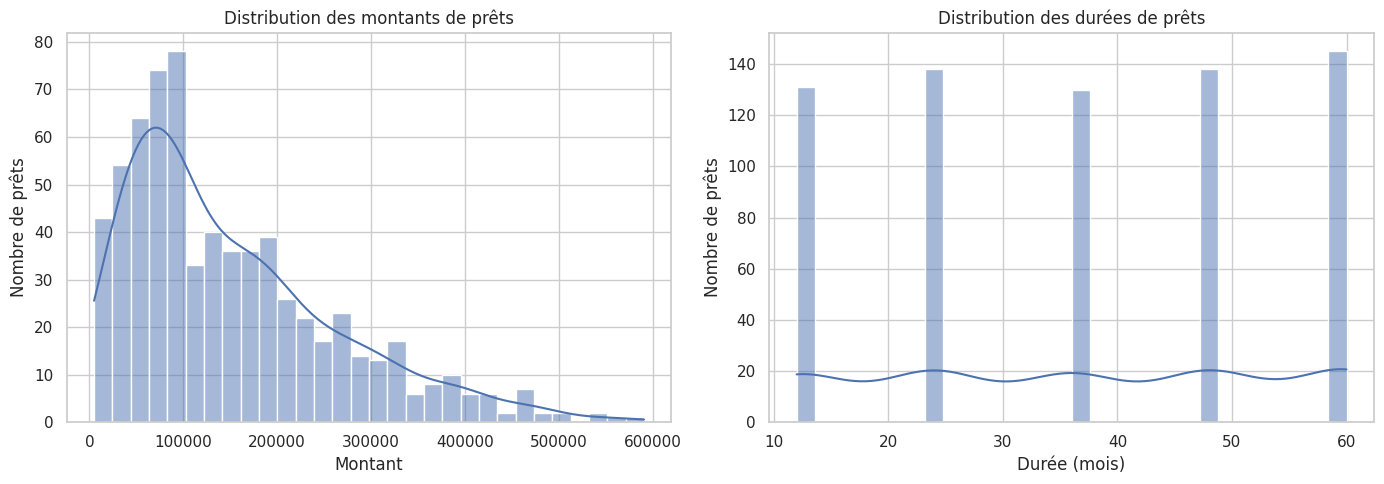

In [587]:
# Affichage graphique des montants et durées les plus fréquents
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des montants
sns.histplot(df_loan_clean['loan_amount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution des montants de prêts')
axes[0].set_xlabel('Montant')
axes[0].set_ylabel('Nombre de prêts')

# Histogramme des durées
sns.histplot(df_loan_clean['loan_duration'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution des durées de prêts')
axes[1].set_xlabel('Durée (mois)')
axes[1].set_ylabel('Nombre de prêts')

plt.tight_layout()
plt.show()

In [588]:
# Montants et durées les plus fréquents
top_loan_amounts = df_loan['loan_amount'].value_counts().head(5)
top_loan_durations = df_loan['loan_duration'].value_counts().head(5)
# Résultats chiffrés
top_loan_amounts, top_loan_durations


(loan_amount
 30276     4
 86184     3
 66696     2
 253200    2
 84288     2
 Name: count, dtype: int64,
 loan_duration
 60    145
 48    138
 24    138
 12    131
 36    130
 Name: count, dtype: int64)

## check des tables

In [589]:

display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**7 - Problematique 7 : Quels types d’opérations bancaires sont les plus fréquents (virements, retraits, paiements par carte...) ?**

In [590]:
df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

In [591]:
# Comptage des types d'opérations les plus fréquents
operation_counts = df_trans_clean['operation'].value_counts().reset_index()
operation_counts.columns = ['operation', 'count']

# Affichage des résultats
operation_counts.head(10)


operation   count
0  retrait en especes  434918
1    virement sortant  208283
2             inconnu  183114
3    depot en especes  156743
4    virement entrant   65226
5   retrait par carte    8036

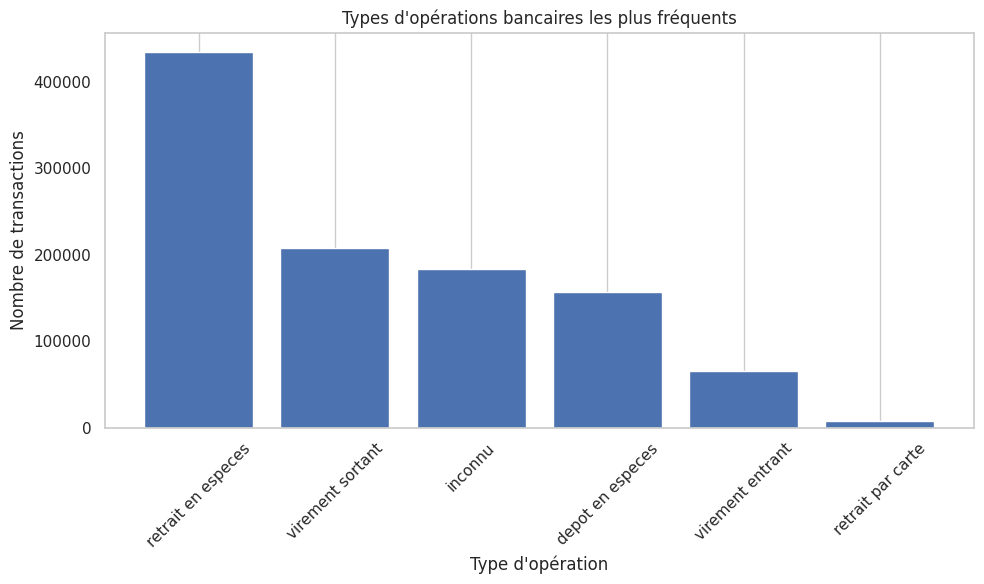

In [592]:
# Création d'un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(operation_counts['operation'], operation_counts['count'])
plt.title("Types d'opérations bancaires les plus fréquents")
plt.xlabel("Type d'opération")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# check des tables

In [593]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**8 - PROBLEMATIQUE 8 : À travers les prêts et les frais bancaires visibles dans les transactions, peut-on estimer la rentabilité par client ou par région**

#**Jointure**

In [594]:
df_trans_clean.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

In [595]:
# Lier clients aux comptes via la table des dispositions
df_dispo_owner = df_disposition_clean[df_disposition_clean['disp_role'] == 'OWNER']
df_clients_accounts = df_dispo_owner.merge(df_client_clean, on='client_id').merge(df_account_clean, on='account_id')
df_clients_accounts = df_clients_accounts.rename(columns={"district_id_y": "district_id"})
df_clients_accounts = df_clients_accounts.drop(columns=["district_id_x"])
# Ajout des infos sur les districts
df_clients_accounts = df_clients_accounts.merge(df_district_clean, on='district_id')
# Ajout des infos client sur les prêts
df_loan_clients = df_loan_clean.merge(df_account_clean[['account_id']], on='account_id')
df_loan_clients = df_loan_clients.merge(df_clients_accounts[['account_id', 'client_id', 'district_id', 'district_name']], on='account_id')
df_loan_clients.head()

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan client_id district_id district_name  
0      défaut         1      2166          30       Sokolov  
1       actif         1      2181          46        Nachod  
2       actif         1     11314          45         Jicin  
3       actif         1      2235          12       Pribram  
4       actif         1     13539           1   Hl.m. Praha

In [596]:
# Revenu = intérêts = (amount * interest_rate / 100) * (duration / 12)
df_loan_clients['revenu_pret'] = df_loan_clients['loan_payments'] * df_loan_clients['loan_duration'] - df_loan_clients['loan_amount']
df_loan_clients['revenu_pret'].sum()

np.float64(0.0)

In [597]:
# Revenus issus des frais bancaires (transactions)

# Sélection des frais dans les transactions (frais = "POPLATEK", intérêts crédit = "PRIJEM_UROKU")
df_frais = df_trans_clean[df_trans_clean['operation'].isin(['intérets penalite','interets crediteurs'])].reset_index()

# Join avec comptes et clients
df_frais = df_frais.merge(df_clients_accounts[['account_id', 'client_id', 'district_id', 'district_name']], on='account_id')

# Ajout d'une colonne 'revenu_frais' (positif si revenu pour la banque)
#df_frais['revenu_frais'] = df_frais['tans_amount'].abs()
df_frais.head()

Empty DataFrame
Columns: [index, trans_id, account_id, trans_date, trans_type, operation, trans_amount, trans_balance, order_type, bank_to, order_account, type_compte_kmeans, year, month, day, periode, client_id, district_id, district_name]
Index: []

## Check des tables

In [598]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**1 - Comptes**

##**jointure**

In [599]:
# === Jointure client + disposition ===
client_dispo = pd.merge(df_client_clean, df_disposition_clean, on="client_id", how="inner")
client_account = pd.merge(client_dispo, df_account_clean, on="account_id", how="inner")

In [600]:

# Renommage pour éviter le conflit de colonnes
client_account = client_account.rename(columns={"district_id_y": "district_id"})
client_account = client_account.drop(columns=["district_id_x"])

In [601]:

client_account_district = pd.merge(df_district_clean, client_account, on='district_id', how='left')

In [602]:
client_account_district_trans = pd.merge(df_trans_clean, client_account_district, on='account_id', how='left')

##**1 - account fidèle**

In [603]:
client_account_district_trans.head()

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   171812        576 1993-01-01     credit  depot en especes         900.0   
3   207264        704 1993-01-01     credit  depot en especes        1000.0   
4   207264        704 1993-01-01     credit  depot en especes        1000.0   

   trans_balance order_type  bank_to order_account type_compte_kmeans_x  year  \
0          700.0    inconnu  inconnu       inconnu   Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu       Compte épargne  1993   
2          900.0    inconnu  inconnu       inconnu       Compte épargne  1993   
3         1000.0    inconnu  inconnu       inconnu       Compte courant  1993   
4         1000.0    inconnu  inconnu       inconnu       Compte courant  1993   

   month  day  periode district_id      district_name         region  \
0      1    1  1993-01          16  Jindrichuv Hradec  south Bohemia   
1      1    1  1993-01          55      Brno - venkov  south Moravia   
2      1    1  1993-01          55      Brno - venkov  south Moravia   
3      1    1  1993-01          55      Brno - venkov  south Moravia   
4      1    1  1993-01          55      Brno - venkov  south Moravia   

   nb_inhabitants  municipalities_lt_499  municipalities_500_1999  \
0           93931                     74                       21   
1          157042                     49                       70   
2          157042                     49                       70   
3          157042                     49                       70   
4          157042                     49                       70   

   municipalities_2000_9999  municipalities_gt_10000  nb_cities  urban_ratio  \
0                        10                        1          8         56.9   
1                        18                        0          9         33.9   
2                        18                        0          9         33.9   
3                        18                        0          9         33.9   
4                        18                        0          9         33.9   

   average_salary  unemployment_1995  unemployment_1996  \
0            8427               1.12               1.54   
1            8743               1.88               2.43   
2            8743               1.88               2.43   
3            8743               1.88               2.43   
4            8743               1.88               2.43   

   entrepreneurs_par_1000  crimes_1995  crimes_1996  score_pca client_id  \
0                     107       1874.0       1913.0  -0.417612      2873   
1                     111       3659.0       3894.0  -0.140090       692   
2                     111       3659.0       3894.0  -0.140090       693   
3                     111       3659.0       3894.0  -0.140090       844   
4                     111       3659.0       3894.0  -0.140090       845   

  birth_date gender  age tranche_age disp_id  disp_role sending_frequency  \
0 1975-03-24      F   23       18-30    2873      OWNER           mensuel   
1 1936-01-11      F   62         60+     692      OWNER           mensuel   
2 1935-03-17      M   63         60+     693  DISPONENT           mensuel   
3 1945-01-14      M   53       46-60     844      OWNER           mensuel   
4 1953-01-30      F   45       31-45     845  DISPONENT           mensuel   

  account_date type_compte_kmeans_y  
0   1993-01-01   Compte courant pro  
1   1993-01-01       Compte épargne  
2   1993-01-01       Compte épargne  
3   1993-01-01       Compte courant  
4   1993-01-01       Compte courant

In [604]:
# Recalcul de la date maximale pour mesurer l'ancienneté
max_trans = df_trans_clean['trans_date'].max()

In [605]:
max_trans

Timestamp('1998-12-31 00:00:00')

In [606]:
# # Calcul de l'ancienneté en années
df_account_clean['anciennete_annees'] = (max_trans - df_account_clean['account_date']).dt.days / 365.25
anciennete_stats = df_account_clean['anciennete_annees'].describe()
anciennete_stats

count    4500.000000
mean        3.397485
std         1.510852
min         1.004791
25%         2.162902
50%         2.995209
75%         5.010267
max         5.995893
Name: anciennete_annees, dtype: float64

##**2 - repartion par sexe**

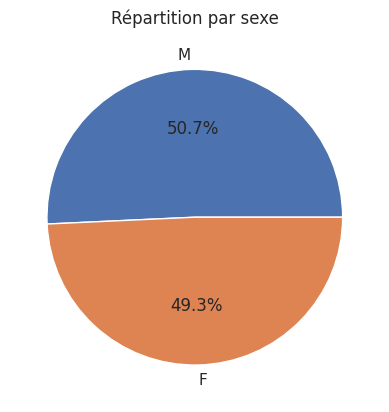

In [607]:
# Compter les sexes
sex_counts = client_account['gender'].value_counts()

# Affichage
sex_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par sexe")
plt.ylabel('')
plt.show()

##**3 - repartion des comptes par tranche d'age**

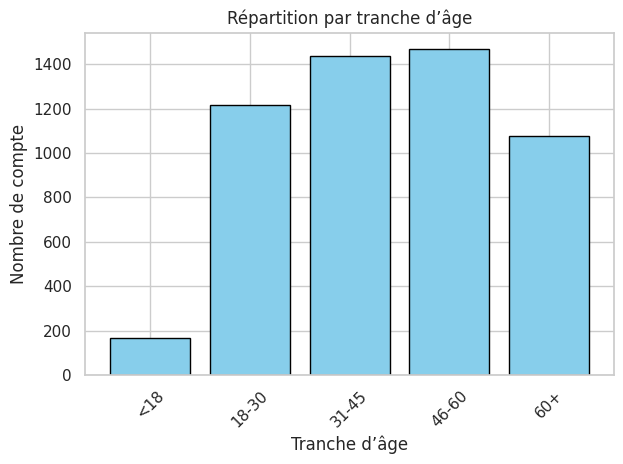

In [608]:
# Compter et afficher
client_account['tranche_age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', width=0.8
, title="Répartition par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de compte")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**4 - repartion des comptes par type**

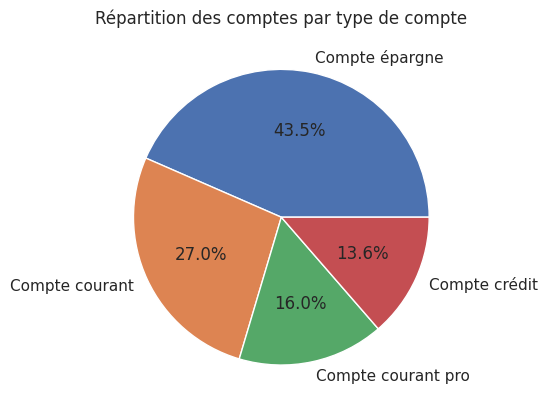

In [609]:
# repartition des comptes par type de compte
client_account_district['type_compte_kmeans'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Répartition des comptes par type de compte")
plt.ylabel('')
plt.show()

##**5 - Analyse temporelle**

###**Par nombre de compte crée par mois**

In [610]:
client_account_district['year'] = client_account_district['account_date'].dt.year
client_account_district['month'] = client_account_district['account_date'].dt.month
client_account_district['month'] = client_account_district['account_date'].dt.month
client_account_district['day'] = client_account_district['account_date'].dt.day
client_account_district['periode'] = client_account_district['account_date'].dt.to_period('M')

client_account_district.head()

district_id district_name  region  nb_inhabitants  municipalities_lt_499  \
0           1   Hl.m. Praha  Prague         1204953                      0   
1           1   Hl.m. Praha  Prague         1204953                      0   
2           1   Hl.m. Praha  Prague         1204953                      0   
3           1   Hl.m. Praha  Prague         1204953                      0   
4           1   Hl.m. Praha  Prague         1204953                      0   

   municipalities_500_1999  municipalities_2000_9999  municipalities_gt_10000  \
0                        0                         0                        1   
1                        0                         0                        1   
2                        0                         0                        1   
3                        0                         0                        1   
4                        0                         0                        1   

   nb_cities  urban_ratio  average_salary  unemployment_1995  \
0          1        100.0           12541               0.29   
1          1        100.0           12541               0.29   
2          1        100.0           12541               0.29   
3          1        100.0           12541               0.29   
4          1        100.0           12541               0.29   

   unemployment_1996  entrepreneurs_par_1000  crimes_1995  crimes_1996  \
0               0.43                     167      85677.0      99107.0   
1               0.43                     167      85677.0      99107.0   
2               0.43                     167      85677.0      99107.0   
3               0.43                     167      85677.0      99107.0   
4               0.43                     167      85677.0      99107.0   

   score_pca client_id birth_date gender  age tranche_age disp_id account_id  \
0   9.279556         2 1945-02-04      M   53       46-60       2          2   
1   9.279556         3 1940-10-09      F   58       46-60       3          2   
2   9.279556        22 1969-10-11      F   29       18-30      22         17   
3   9.279556        23 1973-05-29      M   25       18-30      23         17   
4   9.279556        28 1945-09-29      M   53       46-60      28         22   

   disp_role sending_frequency account_date type_compte_kmeans  year  month  \
0      OWNER           mensuel   1993-02-26     Compte courant  1993      2   
1  DISPONENT           mensuel   1993-02-26     Compte courant  1993      2   
2      OWNER           mensuel   1997-01-08     Compte courant  1997      1   
3  DISPONENT           mensuel   1997-01-08     Compte courant  1997      1   
4      OWNER           mensuel   1994-03-23     Compte courant  1994      3   

   day  periode  
0   26  1993-02  
1   26  1993-02  
2    8  1997-01  
3    8  1997-01  
4   23  1994-03

In [611]:
# Nombre de compte crée par mois
tx_count = client_account_district.groupby("periode")["account_id"].count()



# Regroupement dans un DataFrame
monthly_stats = pd.DataFrame({
    "compte_cree": tx_count,
    "balance_total": tx_sum

}).reset_index()

monthly_stats["periode"] = monthly_stats["periode"].astype(str)
monthly_stats


periode  compte_cree  balance_total
0   1993-01        115.0       702157.6
1   1993-02        118.0      2726925.3
2   1993-03        134.0      4730318.6
3   1993-04         95.0      7378367.8
4   1993-05        113.0     11680753.4
..      ...          ...            ...
67  1998-08          NaN    150639332.7
68  1998-09          NaN    148297693.4
69  1998-10          NaN    151889623.6
70  1998-11          NaN    148842093.6
71  1998-12          NaN    171697093.7

[72 rows x 3 columns]

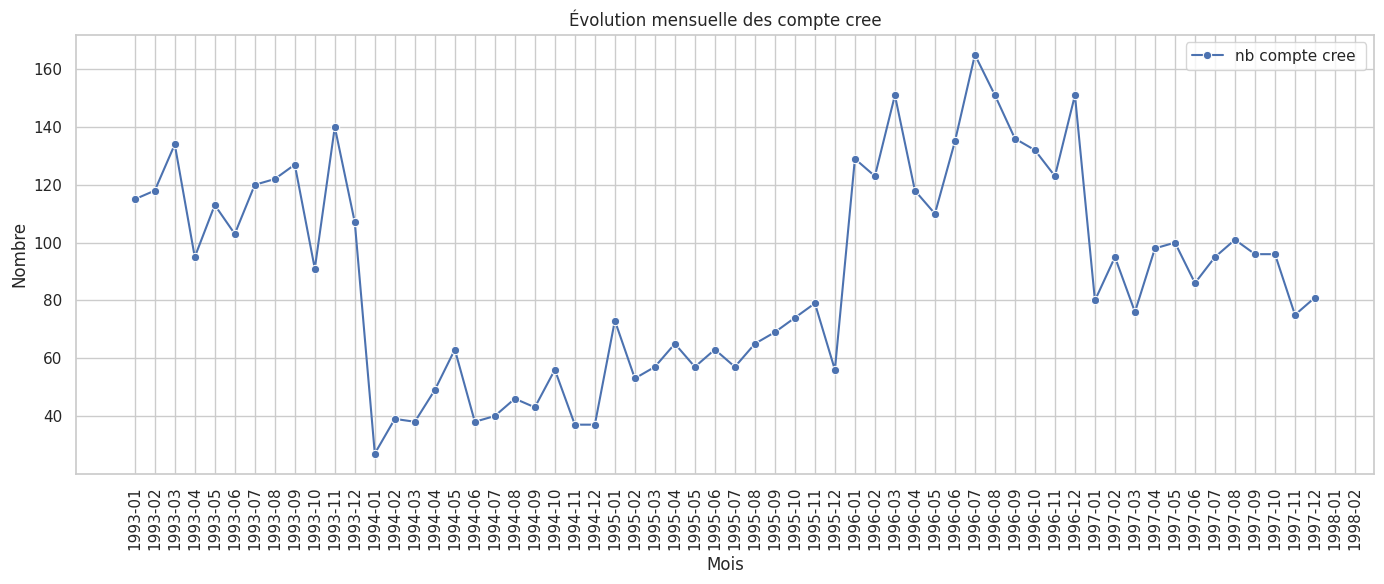

In [612]:
#Visualisation des tendances

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(x="periode", y="compte_cree", data=monthly_stats, marker="o", label="nb compte cree ")
#sns.lineplot(x="periode", y="balance_total", data=monthly_stats, marker="o", label="balance total")

plt.title("Évolution mensuelle des compte cree")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


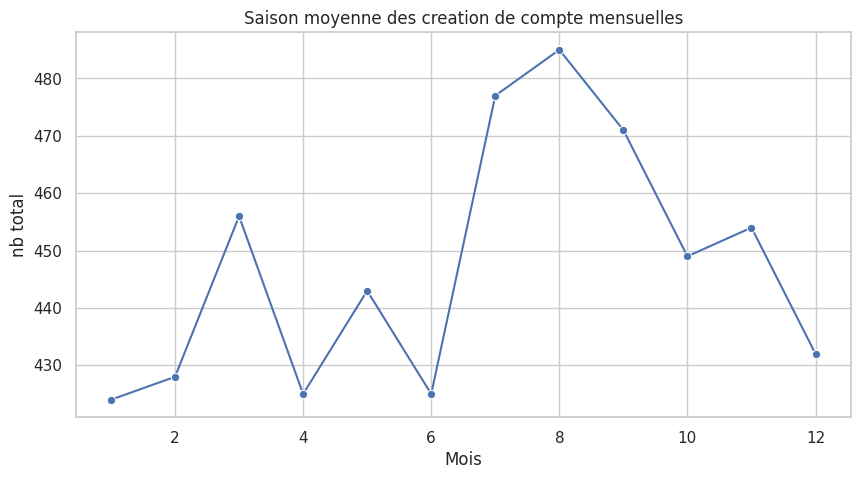

In [613]:
#Détection de la saisonnalité
# Moyenne mensuelle toutes années confondues
#seasonal_avg = df_trans_clean.groupby("month")["trans_amount"].sum().reset_index()
seasonal_nb = client_account_district.groupby("month")["account_id"].count().reset_index()

#seasonal_avg

plt.figure(figsize=(10, 5))
#sns.barplot(x="month", y="trans_amount", data=seasonal_avg)
#sns.lineplot(x="month", y="trans_amount", data=seasonal_avg, marker="o")
sns.lineplot(x="month", y='account_id', data=seasonal_nb, marker="o")

plt.title("Saison moyenne des creation de compte mensuelles")
plt.xlabel("Mois")
plt.ylabel("nb total")
plt.show()



# attention a l'échelle

###**Par solde des compte**

In [614]:
client_account_district_trans.sort_values(by=['account_id', 'trans_date']).head(100)

trans_id account_id trans_date trans_type           operation  \
180616        1          1 1995-03-24     credit    depot en especes   
190274        5          1 1995-04-13     credit    virement entrant   
191974      199          1 1995-04-23     credit    depot en especes   
196590  3530438          1 1995-04-30     credit             inconnu   
201969        6          1 1995-05-13     credit    virement entrant   
...         ...        ...        ...        ...                 ...   
470770  3530455          1 1996-09-30     credit             inconnu   
472549       71          1 1996-10-05      debit    virement sortant   
480140      135          1 1996-10-13      debit  retrait en especes   
480142       23          1 1996-10-13     credit    virement entrant   
481072      217          1 1996-10-14      debit  retrait en especes   

        trans_amount  trans_balance           order_type  bank_to  \
180616        1000.0         1000.0              inconnu  inconnu   
190274        3679.0         4679.0              inconnu       AB   
191974       12600.0        17279.0              inconnu  inconnu   
196590          19.2        17298.2  interets crediteurs  inconnu   
201969        3679.0        20977.2              inconnu       AB   
...              ...            ...                  ...      ...   
470770          78.8        18782.4  interets crediteurs  inconnu   
472549        2452.0        16315.8      paiement groupe       YZ   
480140         270.0        19724.8              inconnu  inconnu   
480142        3679.0        19994.8              inconnu       AB   
481072        3000.0        16724.8              inconnu  inconnu   

       order_account type_compte_kmeans_x  year  month  day  periode  \
180616       inconnu       Compte épargne  1995      3   24  1995-03   
190274    41403269.0       Compte épargne  1995      4   13  1995-04   
191974       inconnu       Compte épargne  1995      4   23  1995-04   
196590       inconnu       Compte épargne  1995      4   30  1995-04   
201969    41403269.0       Compte épargne  1995      5   13  1995-05   
...              ...                  ...   ...    ...  ...      ...   
470770       inconnu       Compte épargne  1996      9   30  1996-09   
472549    87144583.0       Compte épargne  1996     10    5  1996-10   
480140       inconnu       Compte épargne  1996     10   13  1996-10   
480142    41403269.0       Compte épargne  1996     10   13  1996-10   
481072       inconnu       Compte épargne  1996     10   14  1996-10   

       district_id district_name         region  nb_inhabitants  \
180616          18         Pisek  south Bohemia           70699   
190274          18         Pisek  south Bohemia           70699   
191974          18         Pisek  south Bohemia           70699   
196590          18         Pisek  south Bohemia           70699   
201969          18         Pisek  south Bohemia           70699   
...            ...           ...            ...             ...   
470770          18         Pisek  south Bohemia           70699   
472549          18         Pisek  south Bohemia           70699   
480140          18         Pisek  south Bohemia           70699   
480142          18         Pisek  south Bohemia           70699   
481072          18         Pisek  south Bohemia           70699   

        municipalities_lt_499  municipalities_500_1999  \
180616                     60                       13   
190274                     60                       13   
191974                     60                       13   
196590                     60                       13   
201969                     60                       13   
...                       ...                      ...   
470770                     60                       13   
472549                     60                       13   
480140                     60                       13   
480142                     60                       13   
48107

####**Par année**

In [615]:
# Trier les données
client_account_district_trans_year = client_account_district_trans.sort_values(by=['account_id', 'year', 'trans_date'])

# Garder la dernière transaction de chaque mois pour chaque compte
df_last_trans_per_year = client_account_district_trans_year.groupby(['account_id', 'year']).tail(1)

# Garder uniquement les colonnes utiles
result_year = df_last_trans_per_year[['account_id', 'year', 'trans_date', 'trans_balance']].reset_index(drop=True)


In [616]:
result_year.head(10)

account_id  year trans_date  trans_balance
0          1  1995 1995-12-31        18187.6
1          1  1996 1996-12-31        12674.5
2          1  1997 1997-12-31        14810.3
3          1  1998 1998-12-31        13466.5
4         10  1996 1996-12-31        48008.1
5         10  1997 1997-12-31        47576.6
6         10  1998 1998-12-31        59295.2
7        100  1993 1993-12-28          600.0
8        100  1994 1994-12-31        30459.4
9        100  1995 1995-12-31        37613.2

In [617]:
result_year.groupby('year')['trans_balance'].sum().reset_index()

year  trans_balance
0  1993     36895806.3
1  1994     55186890.3
2  1995     79736914.5
3  1996    129826221.3
4  1997    170785052.5
5  1998    197061264.8

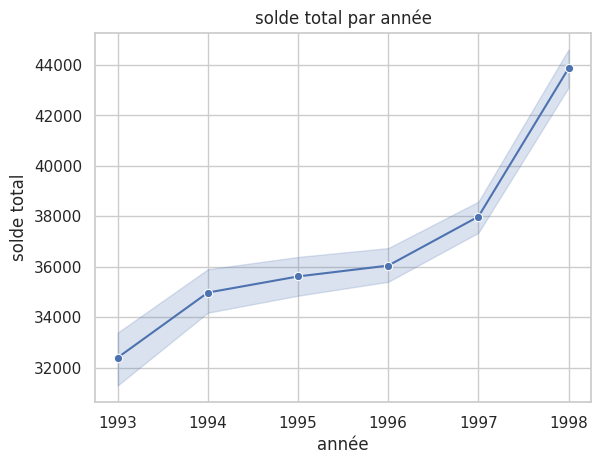

In [618]:
sns.lineplot(x="year", y='trans_balance', data=result_year, marker="o")

plt.title("solde total par année")
plt.xlabel("année")
plt.ylabel("solde total")
plt.show()

####**Par mois**

In [619]:
# 3. Trier les données
client_account_district_trans_month = client_account_district_trans.sort_values(by=['account_id', 'periode', 'trans_date'])

# 4. Garder la dernière transaction de chaque mois pour chaque compte
df_last_trans_per_month = client_account_district_trans_month.groupby(['account_id', 'periode']).tail(1)

# 5. (Optionnel) Garder uniquement les colonnes utiles
result_month = df_last_trans_per_month[['account_id', 'month','year','periode', 'trans_date', 'trans_balance']].reset_index(drop=True)


In [620]:
result_month

account_id  month  year  periode trans_date  trans_balance
0               1      3  1995  1995-03 1995-03-24         1000.0
1               1      4  1995  1995-04 1995-04-30        17298.2
2               1      5  1995  1995-05 1995-05-31        23156.2
3               1      6  1995  1995-06 1995-06-30        26735.8
4               1      7  1995  1995-07 1995-07-31        25223.7
...           ...    ...   ...      ...        ...            ...
185052        998      8  1998  1998-08 1998-08-31        33492.9
185053        998      9  1998  1998-09 1998-09-30        50626.6
185054        998     10  1998  1998-10 1998-10-31        67832.2
185055        998     11  1998  1998-11 1998-11-30        80297.9
185056        998     12  1998  1998-12 1998-12-31        22380.5

[185057 rows x 6 columns]

In [621]:
result_month.groupby('month')['trans_balance'].sum()

month
1     378593729.5
2     445899909.1
3     479276465.3
4     506165073.8
5     524064164.3
6     501175162.3
7     536905087.1
8     560663249.5
9     586442010.9
10    604389845.5
11    624139596.8
12    667685396.1
Name: trans_balance, dtype: float64

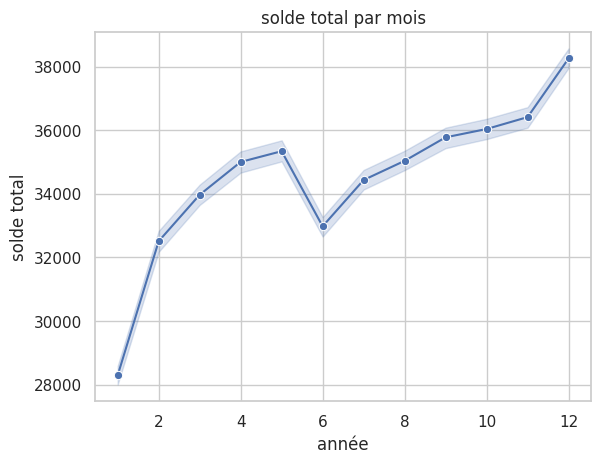

In [622]:
sns.lineplot(x="month", y='trans_balance', data=result_month, marker="o")

plt.title("solde total par mois")
plt.xlabel("année")
plt.ylabel("solde total")
plt.show()

##**6 - Stat des soldes des comptes**

In [623]:
result_year.describe()

year                     trans_date  trans_balance
count  17546.000000                          17546   17546.000000
mean    1996.266044  1997-04-05 16:36:09.930468480   38156.397452
min     1993.000000            1993-11-05 00:00:00  -25821.200000
25%     1995.000000            1995-12-31 00:00:00   22500.350000
50%     1997.000000            1997-12-31 00:00:00   33171.800000
75%     1998.000000            1998-12-08 00:00:00   49970.525000
max     1998.000000            1998-12-31 00:00:00  138317.200000
std        1.510373                            NaN   21679.533809

In [624]:
result_month.describe()

month           year                     trans_date  \
count  185057.000000  185057.000000                         185057   
mean        6.791286    1996.422605  1996-12-25 01:39:36.571542912   
min         1.000000    1993.000000            1993-01-03 00:00:00   
25%         4.000000    1995.000000            1995-12-31 00:00:00   
50%         7.000000    1997.000000            1997-03-31 00:00:00   
75%        10.000000    1998.000000            1998-02-28 00:00:00   
max        12.000000    1998.000000            1998-12-31 00:00:00   
std         3.440278       1.443972                            NaN   

       trans_balance  
count  185057.000000  
mean    34667.154932  
min    -41125.700000  
25%     20443.500000  
50%     30095.100000  
75%     44709.500000  
max    158959.200000  
std     20068.746383

##**7 - volume des comptes par région**

In [625]:
result_month

account_id  month  year  periode trans_date  trans_balance
0               1      3  1995  1995-03 1995-03-24         1000.0
1               1      4  1995  1995-04 1995-04-30        17298.2
2               1      5  1995  1995-05 1995-05-31        23156.2
3               1      6  1995  1995-06 1995-06-30        26735.8
4               1      7  1995  1995-07 1995-07-31        25223.7
...           ...    ...   ...      ...        ...            ...
185052        998      8  1998  1998-08 1998-08-31        33492.9
185053        998      9  1998  1998-09 1998-09-30        50626.6
185054        998     10  1998  1998-10 1998-10-31        67832.2
185055        998     11  1998  1998-11 1998-11-30        80297.9
185056        998     12  1998  1998-12 1998-12-31        22380.5

[185057 rows x 6 columns]

In [626]:
df_month = pd.merge(result_month, client_account_district, on='account_id', how='left')
df_month_bis = df_month.groupby('region')['trans_balance'].sum().reset_index()
df_month_bis.head()

region  trans_balance
0           Prague   9.677303e+08
1  central Bohemia   9.522358e+08
2     east Bohemia   8.852024e+08
3    north Bohemia   7.900034e+08
4    north Moravia   1.391371e+09

## check des tables

In [627]:
df_account_clean = df_account_clean.drop(columns='anciennete_annees')

In [628]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI
#pbt compte : table compte, on ne garde pas ancienneté (droppper)

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**2- loan**

##**Jointures**

In [629]:
client_account_loan = pd.merge(df_loan_clean, client_account, on='account_id', how='left')

In [630]:
client_account_loan.head()

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan client_id birth_date gender  age tranche_age disp_id  \
0      défaut         1      2166 1947-07-22      F   51       46-60    2166   
1       actif         1      2181 1968-07-22      M   30       18-30    2181   
2       actif         1     11314 1936-06-02      M   62         60+   11006   
3       actif         1      2235 1940-04-20      F   58       46-60    2235   
4       actif         1     13539 1978-09-07      M   20       18-30   13231   

  disp_role district_id sending_frequency account_date  type_compte_kmeans  
0     OWNER          30      hebdomadaire   1993-03-22  Compte courant pro  
1     OWNER          46           mensuel   1993-02-13  Compte courant pro  
2     OWNER          45           mensuel   1993-02-08      Compte courant  
3     OWNER          12           mensuel   1993-01-30       Compte crédit  
4     OWNER           1      hebdomadaire   1993-02-14  Compte courant pro

##**1- repartition par tranche d'age**


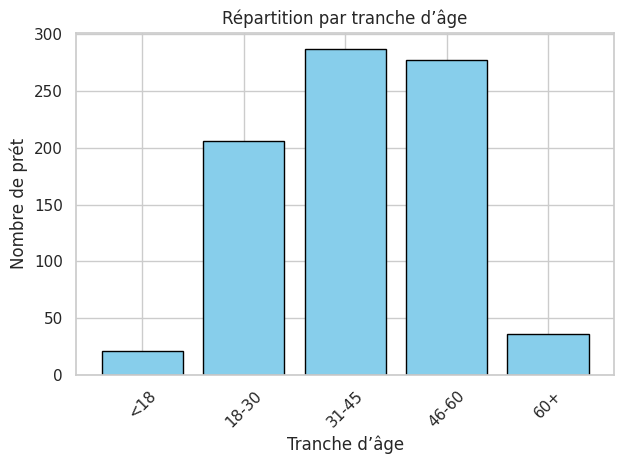

In [631]:
# Compter et afficher
client_account_loan['tranche_age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', width=0.8
, title="Répartition par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de prét")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**2 - repartion par sexe**

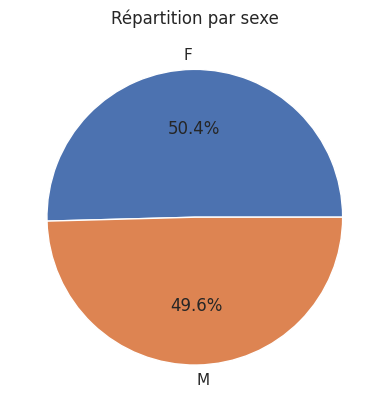

In [632]:
# Compter les sexes
sex_counts = client_account_loan['gender'].value_counts()

# Affichage
sex_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par sexe")
plt.ylabel('')
plt.show()

##**3 - repartition par statuts**

In [633]:
df_loan_clean.head()

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

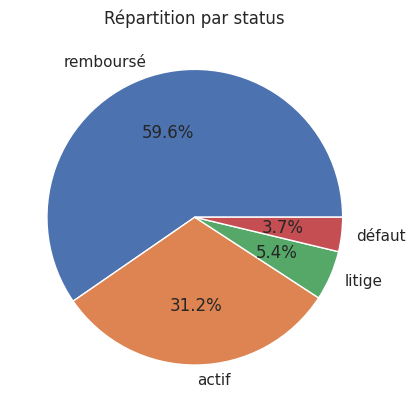

In [634]:
# Compter les sexes
status_counts = client_account_loan['loan_status'].value_counts()

# Affichage
status_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par status")
plt.ylabel('')
plt.show()

##**4 - repartition par duréé**

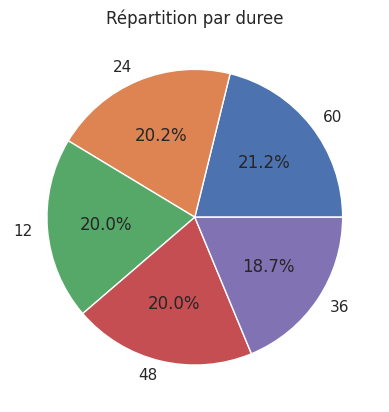

In [635]:
duree_counts = client_account_loan['loan_duration'].value_counts()
# Affichage
duree_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par duree")
plt.ylabel('')
plt.show()

In [636]:
# amount_counts = client_account_loan['loan_amount'].value_counts().head(10)
# # Affichage
# amount_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par amount")
# plt.ylabel('')
# plt.show()

##**5 - Analyse temporelle**

In [637]:
client_account_loan['year'] = client_account_loan['loan_date'].dt.year
client_account_loan['month'] = client_account_loan['loan_date'].dt.month
client_account_loan['month'] = client_account_loan['loan_date'].dt.month
client_account_loan['day'] = client_account_loan['loan_date'].dt.day
client_account_loan['periode'] = client_account_loan['loan_date'].dt.to_period('M')

client_account_loan

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0      5314       1787 1993-07-05        96396             12         8033.0   
1      5316       1801 1993-07-11       165960             36         4610.0   
2      6863       9188 1993-07-28       127080             60         2118.0   
3      5325       1843 1993-08-03       105804             36         2939.0   
4      7240      11013 1993-09-06       274740             60         4579.0   
..      ...        ...        ...          ...            ...            ...   
822    4989        105 1998-12-05       352704             48         7348.0   
823    5221       1284 1998-12-05        52512             12         4376.0   
824    6402       6922 1998-12-06       139488             24         5812.0   
825    5346       1928 1998-12-06        55632             24         2318.0   
826    6748       8645 1998-12-08       240900             60         4015.0   

    loan_status  has_loan client_id birth_date gender  age tranche_age  \
0        défaut         1      2166 1947-07-22      F   51       46-60   
1         actif         1      2181 1968-07-22      M   30       18-30   
2         actif         1     11314 1936-06-02      M   62         60+   
3         actif         1      2235 1940-04-20      F   58       46-60   
4         actif         1     13539 1978-09-07      M   20       18-30   
..          ...       ...       ...        ...    ...  ...         ...   
822   remboursé         1       127 1950-12-27      F   48       46-60   
823   remboursé         1      1554 1944-12-15      M   54       46-60   
824   remboursé         1      8356 1969-09-04      M   29       18-30   
825   remboursé         1      2342 1948-12-18      M   50       46-60   
826   remboursé         1     10662 1949-08-25      F   49       46-60   

    disp_id disp_role district_id sending_frequency account_date  \
0      2166     OWNER          30      hebdomadaire   1993-03-22   
1      2181     OWNER          46           mensuel   1993-02-13   
2     11006     OWNER          45           mensuel   1993-02-08   
3      2235     OWNER          12           mensuel   1993-01-30   
4     13231     OWNER           1      hebdomadaire   1993-02-14   
..      ...       ...         ...               ...          ...   
822     127     OWNER          21           mensuel   1997-07-10   
823    1554     OWNER          55           mensuel   1997-07-02   
824    8356     OWNER           3      hebdomadaire   1997-05-12   
825    2342     OWNER          70           mensuel   1997-03-02   
826   10354     OWNER          60           mensuel   1997-06-23   

     type_compte_kmeans  year  month  day  periode  
0    Compte courant pro  1993      7    5  1993-07  
1    Compte courant pro  1993      7   11  1993-07  
2        Compte courant  1993      7   28  1993-07  
3         Compte crédit  1993      8    3  1993-08  
4    Compte courant pro  1993      9    6  1993-09  
..                  ...   ...    ...  ...      ...  
822       Compte crédit  1998     12    5  1998-12  
823  Compte courant pro  1998     12    5  1998-12  
824  Compte courant pro  1998     12    6  1998-12  
825      Compte courant  1998     12    6  1998-12  
826      Compte courant  1998     12    8  1998-12  

[827 rows x 23 columns]

In [638]:
# Nombre de prét accordé par mois
nb_loan = client_account_loan.groupby("periode")["loan_id"].count()
volume_loan = client_account_loan.groupby("periode")["loan_amount"].sum()



# Regroupement dans un DataFrame
monthly_stats_loan = pd.DataFrame({
    "nb_loan": nb_loan,
    "montant_total": volume_loan

}).reset_index()

monthly_stats_loan["periode"] = monthly_stats_loan["periode"].astype(str)
monthly_stats_loan


periode  nb_loan  montant_total
0   1993-07        3         389436
1   1993-08        1         105804
2   1993-09        5         677952
3   1993-10        1         154416
4   1993-11        4         240480
..      ...      ...            ...
61  1998-08        5        1176876
62  1998-09       18        3129348
63  1998-10       10        1415112
64  1998-11       10        1152600
65  1998-12        8        1395708

[66 rows x 3 columns]

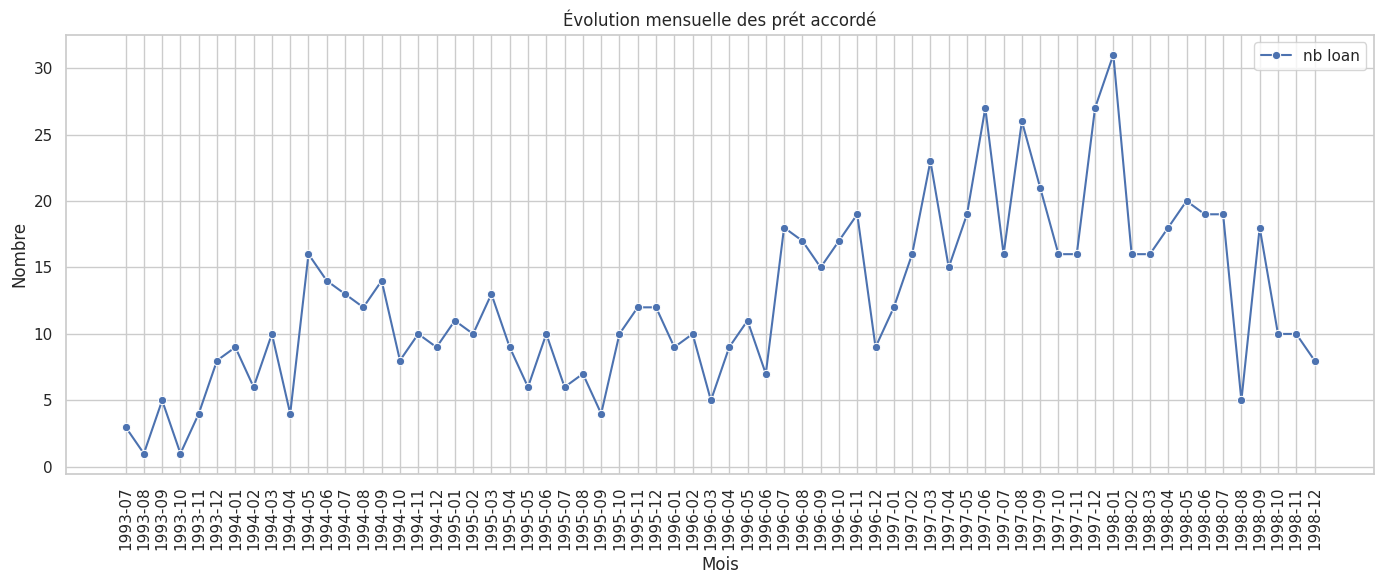

In [639]:
plt.figure(figsize=(14, 6))
sns.lineplot(x="periode", y="nb_loan", data=monthly_stats_loan, marker="o", label="nb loan")
#sns.lineplot(x="periode", y="balance_total", data=monthly_stats, marker="o", label="balance total")

plt.title("Évolution mensuelle des prét accordé")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

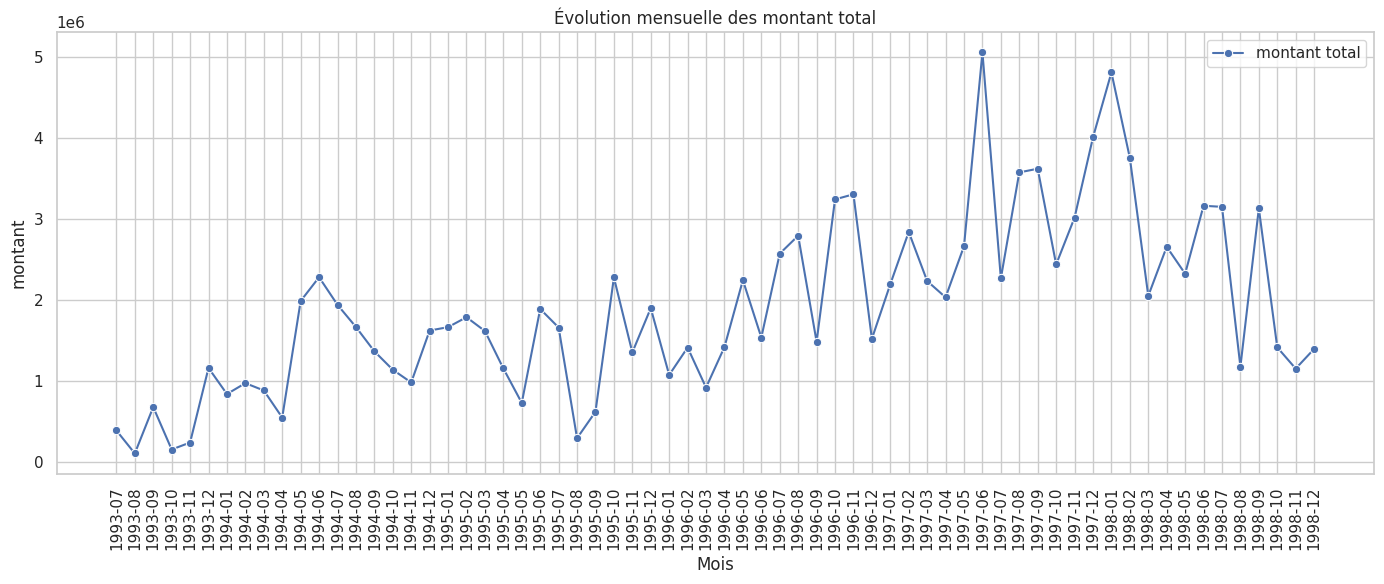

In [640]:
plt.figure(figsize=(14, 6))
sns.lineplot(x="periode", y="montant_total", data=monthly_stats_loan, marker="o", label="montant total")


plt.title("Évolution mensuelle des montant total")
plt.xlabel("Mois")
plt.ylabel("montant")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

##**6 - Analyse des loan a risque**

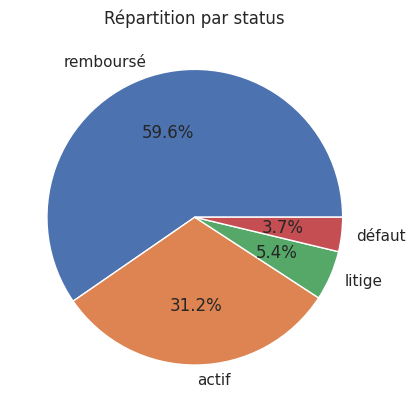

In [641]:
# Compter les sexes
status_counts = client_account_loan['loan_status'].value_counts()

# Affichage
status_counts.plot(kind='pie', autopct='%1.1f%%', title="Répartition par status")
plt.ylabel('')
plt.show()

In [642]:
df_defaut_litige = client_account_loan[client_account_loan['loan_status'].isin(['défaut', 'litige'])]
df_defaut_litige

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0      5314       1787 1993-07-05        96396             12         8033.0   
8      6111       5428 1993-09-24       174744             24         7281.0   
14     6228       6034 1993-12-01       464520             60         7742.0   
21     7097      10266 1993-12-23        75624             24         3151.0   
33     6650       8073 1994-02-17        49320             12         4110.0   
..      ...        ...        ...          ...            ...            ...   
631    5976       4794 1997-12-27       465504             48         9698.0   
641    6237       6075 1998-01-06       407952             48         8499.0   
698    6682       8225 1998-03-30        36204             12         3017.0   
774    5991       4858 1998-07-27       335184             48         6983.0   
806    4967         37 1998-10-14       318480             60         5308.0   

    loan_status  has_loan client_id birth_date gender  age tranche_age  \
0        défaut         1      2166 1947-07-22      F   51       46-60   
8        défaut         1      6551 1948-08-12      F   50       46-60   
14       défaut         1      7291 1940-12-02      F   58       46-60   
21       défaut         1     12625 1958-12-07      M   40       31-45   
33       défaut         1      9973 1945-10-03      F   53       46-60   
..          ...       ...       ...        ...    ...  ...         ...   
631      litige         1      5788 1962-05-04      M   36       31-45   
641      litige         1      7339 1974-02-28      F   24       18-30   
698      litige         1     10159 1938-01-06      M   60       46-60   
774      litige         1      5866 1978-04-03      F   20       18-30   
806      litige         1        45 1952-08-26      M   46       46-60   

    disp_id disp_role district_id  sending_frequency account_date  \
0      2166     OWNER          30       hebdomadaire   1993-03-22   
8      6551     OWNER          24            mensuel   1993-04-14   
14     7291     OWNER           6       hebdomadaire   1993-03-19   
21    12317     OWNER          54            mensuel   1993-06-10   
33     9665     OWNER          24  après transaction   1993-09-03   
..      ...       ...         ...                ...          ...   
631    5788     OWNER          72            mensuel   1996-12-18   
641    7339     OWNER          19            mensuel   1996-09-15   
698    9851     OWNER          50            mensuel   1996-12-07   
774    5866     OWNER          67            mensuel   1997-06-21   
806      45     OWNER          20            mensuel   1997-08-18   

     type_compte_kmeans  year  month  day  periode  
0    Compte courant pro  1993      7    5  1993-07  
8    Compte courant pro  1993      9   24  1993-09  
14   Compte courant pro  1993     12    1  1993-12  
21   Compte courant pro  1993     12   23  1993-12  
33   Compte courant pro  1994      2   17  1994-02  
..                  ...   ...    ...  ...      ...  
631      Compte épargne  1997     12   27  1997-12  
641      Compte épargne  1998      1    6  1998-01  
698      Compte courant  1998      3   30  1998-03  
774      Compte courant  1998      7   27  1998-07  
806      Compte courant  1998     10   14  1998-10  

[76 rows x 23 columns]

In [643]:
print(df_defaut_litige['periode'].dtype)
print(df_defaut_litige['periode'].head())


period[M]
0     1993-07
8     1993-09
14    1993-12
21    1993-12
33    1994-02
Name: periode, dtype: period[M]


In [644]:
loan_defaut_litige_groupe = df_defaut_litige.groupby("periode")["loan_id"].count().reset_index()
loan_defaut_litige_groupe

periode  loan_id
0   1993-07        1
1   1993-09        1
2   1993-12        2
3   1994-02        1
4   1994-05        2
5   1994-06        2
6   1994-07        4
7   1994-09        2
8   1994-11        2
9   1994-12        1
10  1995-01        3
11  1995-02        2
12  1995-03        3
13  1995-04        1
14  1995-05        1
15  1995-11        2
16  1996-02        4
17  1996-03        1
18  1996-04        5
19  1996-05        1
20  1996-08        2
21  1996-09        2
22  1996-12        1
23  1997-01        1
24  1997-02        2
25  1997-03        2
26  1997-04        2
27  1997-05        1
28  1997-06        2
29  1997-07        2
30  1997-08        3
31  1997-09        3
32  1997-10        1
33  1997-11        5
34  1997-12        2
35  1998-01        1
36  1998-03        1
37  1998-07        1
38  1998-10        1

In [645]:
df_defaut_litige['type_compte_kmeans'].value_counts()

type_compte_kmeans
Compte courant pro    35
Compte courant        30
Compte épargne        11
Name: count, dtype: int64

In [646]:
df_defaut_litige['tranche_age'].value_counts()

tranche_age
46-60    28
31-45    24
18-30    20
60+       3
<18       1
Name: count, dtype: int64

## check des tables

In [647]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans

display(df_card_clean.head()),
display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI
#pbt compte : table compte, on ne garde pas ancienneté (droppper)
#pbt loan : RAS

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**3 - Card**

In [648]:
df_card_clean.head()

card_id disp_id card_type  card_date
0    1005    9285   classic 1993-11-07
1     104     588   classic 1994-01-19
2     747    4915   classic 1994-02-05
3      70     439   classic 1994-02-08
4     577    3687   classic 1994-02-15

##**Jointure**

In [649]:
# relier CARD → DISP  (clé primaire : disp_id)
card_disp = df_card_clean.merge(df_disposition_clean[['disp_id','account_id','disp_role']], on='disp_id', how='left')

# garder une seule ligne par carte et par compte – préférence OWNER
card_disp = (card_disp
             .sort_values('disp_role')
             .drop_duplicates('card_id'))

# joindre à ACCOUNT + cluster
card_account_cluster = card_disp.merge(
        df_account_clean[['account_id','type_compte_kmeans']],
        on='account_id',
        how='left')
card_account_cluster = card_account_cluster.drop_duplicates('card_id')


In [650]:
card_account_cluster['type_compte_kmeans'].value_counts()


type_compte_kmeans
Compte crédit         630
Compte courant pro    260
Compte épargne          2
Name: count, dtype: int64

In [651]:
card_disp = pd.merge(df_card_clean, df_disposition_clean, on='disp_id', how='left')
card_account = pd.merge(card_disp, df_account_clean, on='account_id', how='left')
card_account_client = pd.merge(card_account, df_client_clean, on='client_id', how='left')

In [652]:
card_account_client.head()

card_id disp_id card_type  card_date client_id account_id disp_role  \
0    1005    9285   classic 1993-11-07      9593       7753     OWNER   
1     104     588   classic 1994-01-19       588        489     OWNER   
2     747    4915   classic 1994-02-05      4915       4078     OWNER   
3      70     439   classic 1994-02-08       439        361     OWNER   
4     577    3687   classic 1994-02-15      3687       3050     OWNER   

  district_id_x sending_frequency account_date  type_compte_kmeans  \
0            74           mensuel   1993-02-08  Compte courant pro   
1            16           mensuel   1993-05-17       Compte crédit   
2            40           mensuel   1993-01-30  Compte courant pro   
3            51           mensuel   1993-02-27       Compte crédit   
4            60           mensuel   1993-05-08  Compte courant pro   

  district_id_y birth_date gender  age tranche_age  
0            74 1968-01-28      F   30       18-30  
1            61 1960-10-20      F   38       31-45  
2            40 1963-07-19      M   35       31-45  
3            51 1968-09-12      F   30       18-30  
4            49 1972-02-06      M   26       18-30

In [653]:
card_account_client.describe()

card_date                   account_date  \
count                            892                            892   
mean   1997-09-19 05:19:38.475336320  1995-08-03 20:20:26.905829632   
min              1993-11-07 00:00:00            1993-01-03 00:00:00   
25%              1997-01-25 12:00:00            1994-02-20 00:00:00   
50%              1998-01-06 00:00:00            1995-12-13 00:00:00   
75%              1998-08-05 06:00:00            1996-10-19 00:00:00   
max              1998-12-29 00:00:00            1997-12-27 00:00:00   
std                              NaN                            NaN   

                          birth_date         age  
count                            892  892.000000  
mean   1959-06-07 08:01:04.573991040   39.057175  
min              1918-02-16 00:00:00   16.000000  
25%              1946-11-16 00:00:00   26.000000  
50%              1959-07-27 00:00:00   39.000000  
75%              1972-05-10 12:00:00   52.000000  
max              1982-09-07 00:00:00   80.000000  
std                              NaN   14.454235

In [654]:
card_account_client['card_type'].value_counts()

card_type
classic    659
junior     145
gold        88
Name: count, dtype: int64

In [655]:
card_account_client['type_compte_kmeans'].value_counts()

type_compte_kmeans
Compte crédit         630
Compte courant pro    260
Compte épargne          2
Name: count, dtype: int64

In [656]:
card_account_client['gender'].value_counts()

gender
M    469
F    423
Name: count, dtype: int64

In [657]:

card_account_client['tranche_age'].value_counts()

tranche_age
46-60    297
18-30    251
31-45    247
<18       52
60+       45
Name: count, dtype: int64

In [658]:
card_account_client['year'] = card_account_client['card_date'].dt.year
card_account_client['month'] = card_account_client['card_date'].dt.month
card_account_client['month'] = card_account_client['card_date'].dt.month
card_account_client['day'] = card_account_client['card_date'].dt.day
card_account_client['periode'] = card_account_client['card_date'].dt.to_period('M')

card_account_client.head()

card_id disp_id card_type  card_date client_id account_id disp_role  \
0    1005    9285   classic 1993-11-07      9593       7753     OWNER   
1     104     588   classic 1994-01-19       588        489     OWNER   
2     747    4915   classic 1994-02-05      4915       4078     OWNER   
3      70     439   classic 1994-02-08       439        361     OWNER   
4     577    3687   classic 1994-02-15      3687       3050     OWNER   

  district_id_x sending_frequency account_date  type_compte_kmeans  \
0            74           mensuel   1993-02-08  Compte courant pro   
1            16           mensuel   1993-05-17       Compte crédit   
2            40           mensuel   1993-01-30  Compte courant pro   
3            51           mensuel   1993-02-27       Compte crédit   
4            60           mensuel   1993-05-08  Compte courant pro   

  district_id_y birth_date gender  age tranche_age  year  month  day  periode  
0            74 1968-01-28      F   30       18-30  1993     11    7  1993-11  
1            61 1960-10-20      F   38       31-45  1994      1   19  1994-01  
2            40 1963-07-19      M   35       31-45  1994      2    5  1994-02  
3            51 1968-09-12      F   30       18-30  1994      2    8  1994-02  
4            49 1972-02-06      M   26       18-30  1994      2   15  1994-02

In [659]:
# Nombre de prét accordé par mois
nb_card = card_account_client.groupby("periode")["card_id"].count()
#volume_card = card_account_client.groupby("periode")["loan_amount"].sum()



# Regroupement dans un DataFrame
monthly_stats_card = pd.DataFrame({
    "nb_card": nb_card

}).reset_index()

monthly_stats_card["periode"] = monthly_stats_card["periode"].astype(str)
monthly_stats_card

periode  nb_card
0   1993-11        1
1   1994-01        1
2   1994-02        3
3   1994-03        1
4   1994-04        1
5   1994-06        3
6   1994-07        1
7   1994-08        1
8   1994-09        2
9   1994-10        2
10  1994-11        3
11  1994-12        3
12  1995-01        6
13  1995-02        3
14  1995-03        5
15  1995-04        5
16  1995-05        6
17  1995-06        7
18  1995-07        7
19  1995-08        3
20  1995-09        7
21  1995-10        2
22  1995-11        7
23  1995-12        5
24  1996-01        6
25  1996-02        7
26  1996-03        7
27  1996-04        8
28  1996-05        9
29  1996-06        6
30  1996-07        7
31  1996-08       14
32  1996-09        9
33  1996-10       17
34  1996-11       12
35  1996-12       14
36  1997-01       25
37  1997-02        9
38  1997-03        8
39  1997-04        9
40  1997-05       23
41  1997-06       27
42  1997-07       20
43  1997-08       21
44  1997-09       23
45  1997-10       25
46  1997-11       23
47  1997-12       29
48  1998-01       26
49  1998-02       25
50  1998-03       28
51  1998-04       31
52  1998-05       30
53  1998-06       31
54  1998-07       47
55  1998-08       40
56  1998-09       49
57  1998-10       47
58  1998-11       49
59  1998-12       46

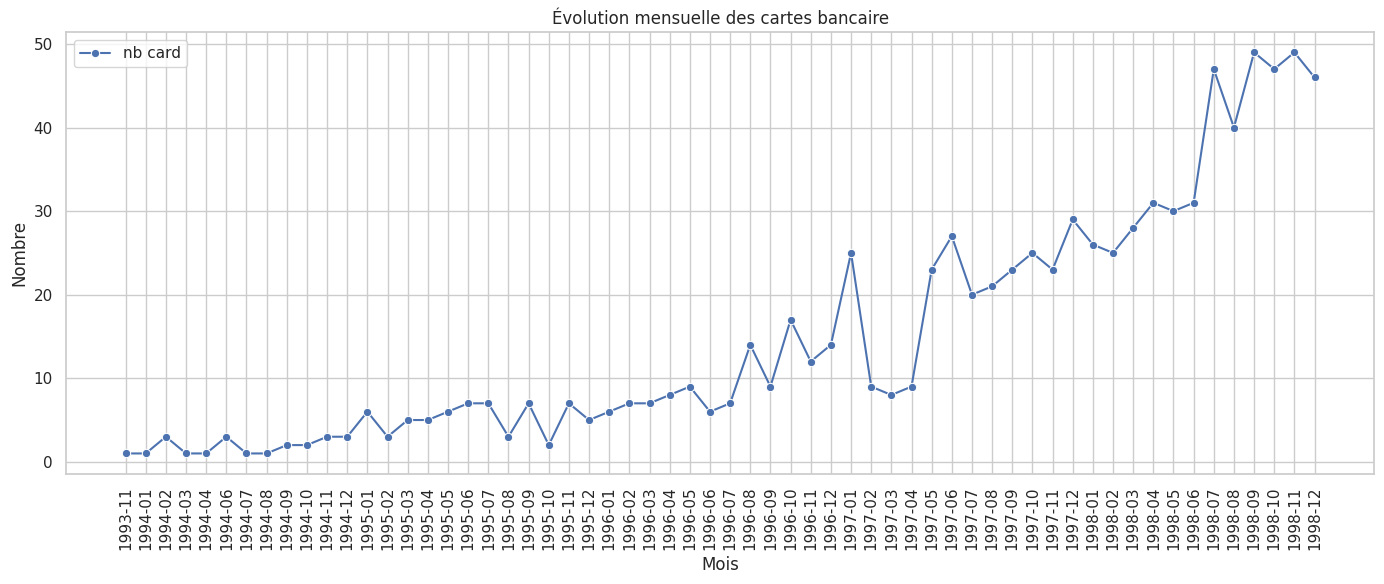

In [660]:
plt.figure(figsize=(14, 6))
sns.lineplot(x="periode", y="nb_card", data=monthly_stats_card, marker="o", label="nb card")
#sns.lineplot(x="periode", y="balance_total", data=monthly_stats, marker="o", label="balance total")

plt.title("Évolution mensuelle des cartes bancaire")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [661]:
# Nombre de prét accordé par mois
nb_card = card_account_client.groupby("year")["card_id"].count()
#volume_card = card_account_client.groupby("periode")["loan_amount"].sum()



# Regroupement dans un DataFrame
year_stats_card = pd.DataFrame({
    "nb_card": nb_card

}).reset_index()
year_stats_card["year"] = year_stats_card["year"].astype(str)
year_stats_card

year  nb_card
0  1993        1
1  1994       21
2  1995       63
3  1996      116
4  1997      242
5  1998      449

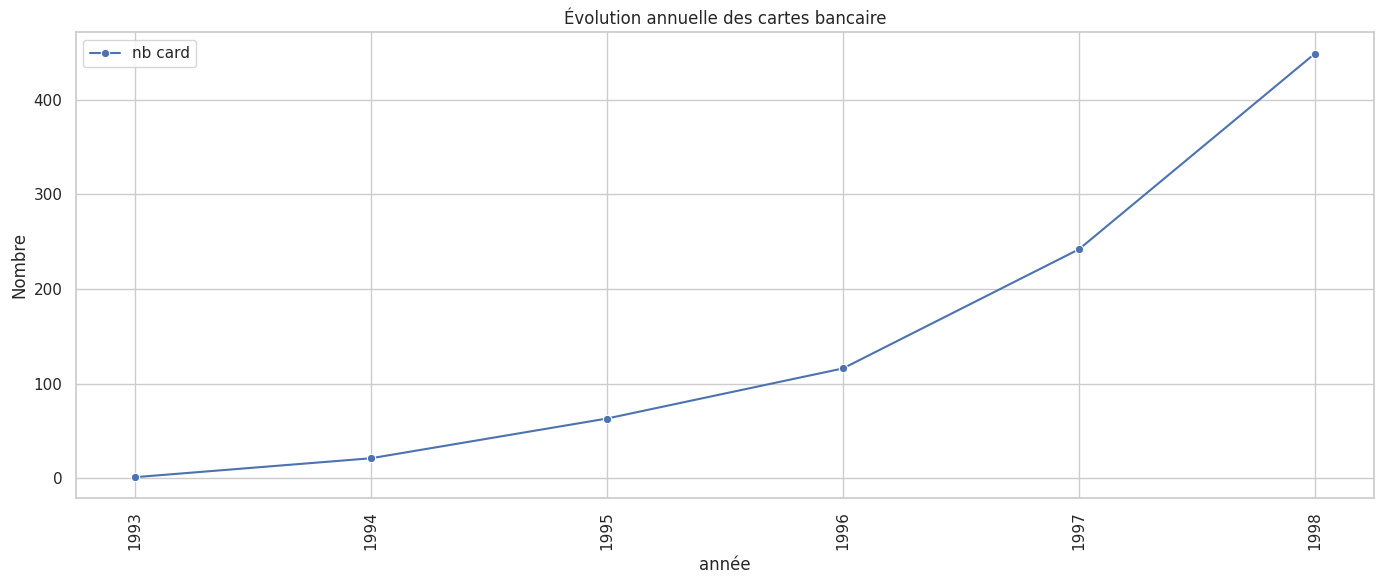

In [662]:
plt.figure(figsize=(14, 6))
sns.lineplot(x="year", y="nb_card", data=year_stats_card, marker="o", label="nb card")
#sns.lineplot(x="periode", y="balance_total", data=monthly_stats, marker="o", label="balance total")

plt.title("Évolution annuelle des cartes bancaire")
plt.xlabel("année")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

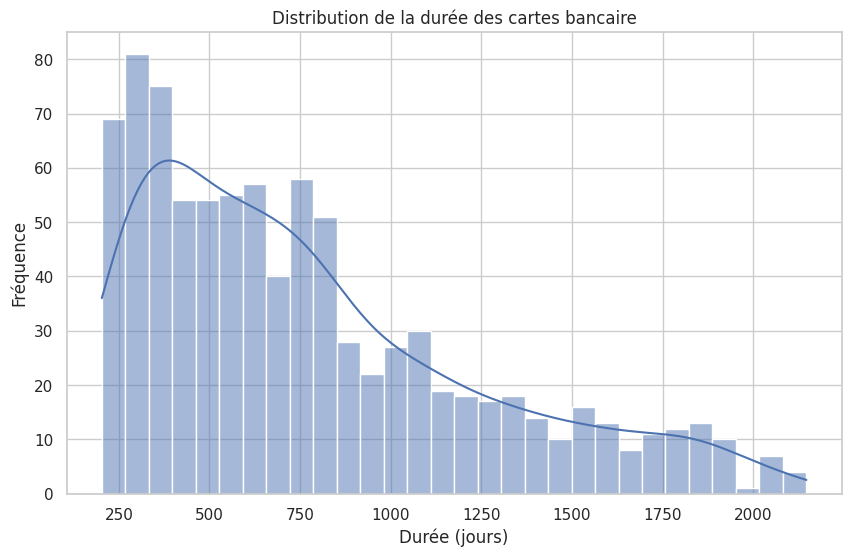

In [663]:
card_account_client['durree_compte_carte'] = card_account_client['card_date'] - card_account_client['account_date']
card_account_client['durree_compte_carte'] = card_account_client['durree_compte_carte'].dt.days
# ploter le resultat
plt.figure(figsize=(10, 6))
sns.histplot(card_account_client['durree_compte_carte'], bins=30, kde=True)
plt.title('Distribution de la durée des cartes bancaire')
plt.xlabel('Durée (jours)')
plt.ylabel('Fréquence')
plt.show()

In [664]:
card_account_client.head()

card_id disp_id card_type  card_date client_id account_id disp_role  \
0    1005    9285   classic 1993-11-07      9593       7753     OWNER   
1     104     588   classic 1994-01-19       588        489     OWNER   
2     747    4915   classic 1994-02-05      4915       4078     OWNER   
3      70     439   classic 1994-02-08       439        361     OWNER   
4     577    3687   classic 1994-02-15      3687       3050     OWNER   

  district_id_x sending_frequency account_date  type_compte_kmeans  \
0            74           mensuel   1993-02-08  Compte courant pro   
1            16           mensuel   1993-05-17       Compte crédit   
2            40           mensuel   1993-01-30  Compte courant pro   
3            51           mensuel   1993-02-27       Compte crédit   
4            60           mensuel   1993-05-08  Compte courant pro   

  district_id_y birth_date gender  age tranche_age  year  month  day  periode  \
0            74 1968-01-28      F   30       18-30  1993     11    7  1993-11   
1            61 1960-10-20      F   38       31-45  1994      1   19  1994-01   
2            40 1963-07-19      M   35       31-45  1994      2    5  1994-02   
3            51 1968-09-12      F   30       18-30  1994      2    8  1994-02   
4            49 1972-02-06      M   26       18-30  1994      2   15  1994-02   

   durree_compte_carte  
0                  272  
1                  247  
2                  371  
3                  346  
4                  283

In [665]:
#proportion de client avec ou sans carte
card_account_client['card_id'].value_counts()

card_id
635     1
1005    1
104     1
747     1
70      1
       ..
369     1
563     1
478     1
309     1
384     1
Name: count, Length: 892, dtype: int64

In [666]:
import pandas as pd



# Associer chaque carte à un client
cards_clients = (
    df_card_clean[['card_id', 'disp_id']]
    .merge(df_disposition_clean[['disp_id', 'client_id']],
           on='disp_id', how='left')
    .dropna(subset=['client_id'])
)

# Obtenir la liste unique des clients qui possèdent ≥1 carte
clients_with_card = cards_clients['client_id'].unique()

# Compter les clients et calculer les proportions
total_clients        = df_client_clean['client_id'].nunique()
nb_clients_with_card = len(clients_with_card)
nb_clients_no_card   = total_clients - nb_clients_with_card

prop_with_card = nb_clients_with_card / total_clients
prop_no_card   = nb_clients_no_card   / total_clients

print(f"Total clients          : {total_clients:,}")
print(f"Clients avec carte     : {nb_clients_with_card:,}  ({prop_with_card:.2%})")
print(f"Clients sans carte     : {nb_clients_no_card:,}   ({prop_no_card:.2%})")


Total clients          : 5,369
Clients avec carte     : 892  (16.61%)
Clients sans carte     : 4,477   (83.39%)


##**Card**

In [667]:
df_card_clean['year'] = df_card_clean['card_date'].dt.year
df_card_clean['month'] = df_card_clean['card_date'].dt.month
df_card_clean['day'] = df_card_clean['card_date'].dt.day
df_card_clean['periode'] = df_card_clean['card_date'].dt.to_period('M')

df_card_clean

card_id disp_id card_type  card_date  year  month  day  periode
0      1005    9285   classic 1993-11-07  1993     11    7  1993-11
1       104     588   classic 1994-01-19  1994      1   19  1994-01
2       747    4915   classic 1994-02-05  1994      2    5  1994-02
3        70     439   classic 1994-02-08  1994      2    8  1994-02
4       577    3687   classic 1994-02-15  1994      2   15  1994-02
..      ...     ...       ...        ...   ...    ...  ...      ...
887     125     694      gold 1998-12-26  1998     12   26  1998-12
888     674    4360   classic 1998-12-28  1998     12   28  1998-12
889     322    2063   classic 1998-12-28  1998     12   28  1998-12
890     685    4467   classic 1998-12-29  1998     12   29  1998-12
891     635    4083   classic 1998-12-29  1998     12   29  1998-12

[892 rows x 8 columns]

In [668]:
# Nombre de carte émise par mois
nb_card_emise = df_card_clean.groupby("periode")["card_id"].count().reset_index()

nb_card_emise = nb_card_emise.rename(columns={"card_id": "nb_card_emission"})


In [669]:
nb_card_emise.describe()

nb_card_emission
count         60.000000
mean          14.866667
std           14.106696
min            1.000000
25%            4.500000
50%            8.000000
75%           25.000000
max           49.000000

<Axes: xlabel='periode', ylabel='nb_card_emission'>

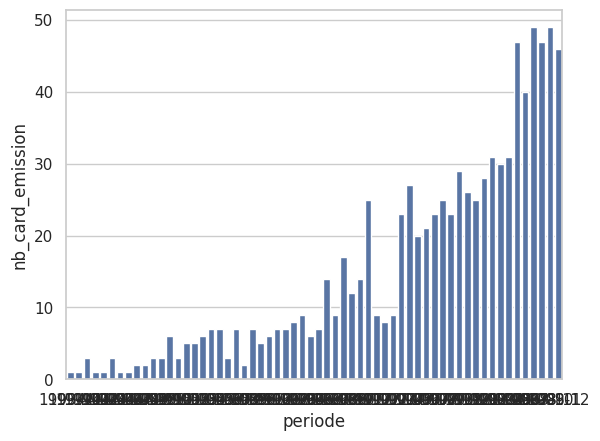

In [670]:
sns.barplot(data = nb_card_emise, x="periode", y = "nb_card_emission")#, kde = True)

In [671]:
client_disp = pd.merge(df_client_clean, df_disposition, how = 'left', on ='client_id')
client_card = pd.merge(client_disp, df_card_clean, how = 'left', on ='disp_id')

In [672]:
client_card.isna().sum()

client_id         0
district_id       0
birth_date        0
gender            0
age               0
tranche_age       0
disp_id           0
account_id        0
disp_role         0
card_id        4477
card_type      4477
card_date      4477
year           4477
month          4477
day            4477
periode        4477
dtype: int64

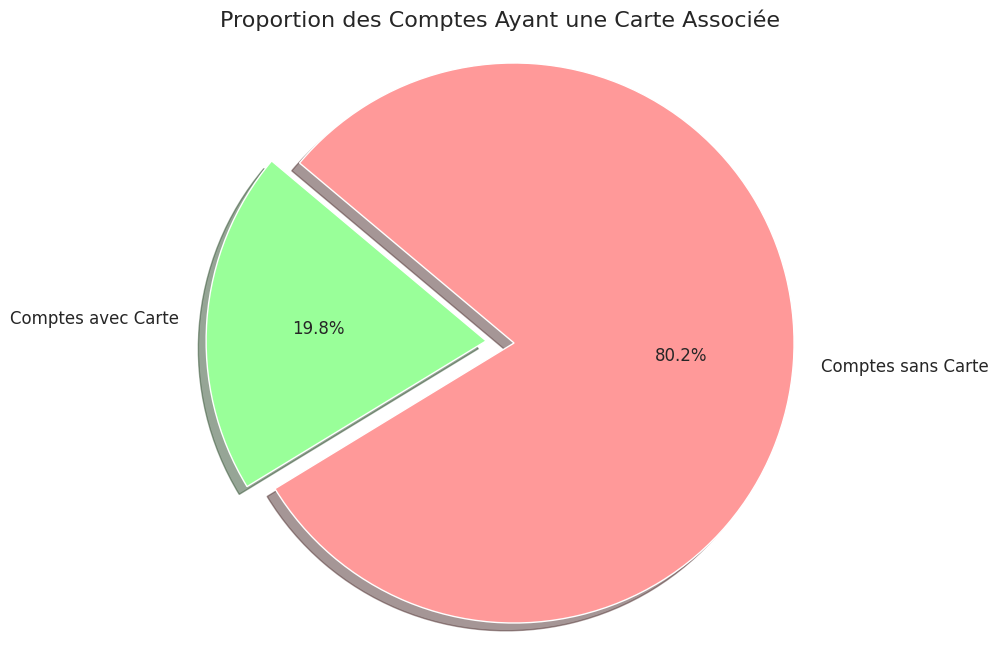

Nombre de comptes avec carte : 892
Nombre de comptes sans carte : 3608
Nombre total de comptes : 4500


In [673]:
import pandas as pd
import matplotlib.pyplot as plt

# --- ÉTAPE 0 : CHARGEMENT DES DONNÉES NÉCESSAIRES ---
# Adaptez les chemins si vos fichiers ne sont pas dans le même dossier
df_account =  df_account_clean.copy()
df_card = df_card_clean.copy()
df_disp = df_disposition_clean.copy()


# --- ÉTAPE 1 : CALCULER LE NOMBRE DE COMPTES AVEC CARTE ---

# On fusionne les tables 'card' et 'disp' pour lier les cartes aux comptes
df_card_disp = pd.merge(df_card, df_disp, on='disp_id')

# On récupère la liste des 'account_id' uniques qui ont une carte
accounts_with_card_ids = df_card_disp['account_id'].unique()
nombre_comptes_avec_carte = len(accounts_with_card_ids)


# --- ÉTAPE 2 : CALCULER LE NOMBRE TOTAL DE COMPTES ET CEUX SANS CARTE ---

# On compte le nombre total de comptes uniques dans la table 'account'
total_comptes = df_account['account_id'].nunique()

# On calcule le nombre de comptes sans carte par soustraction
nombre_comptes_sans_carte = total_comptes - nombre_comptes_avec_carte


# --- ÉTAPE 3 : CRÉER LE GRAPHIQUE EN SECTEURS (PIE CHART) ---

# Préparer les données pour le graphique
labels = 'Comptes avec Carte', 'Comptes sans Carte'
sizes = [nombre_comptes_avec_carte, nombre_comptes_sans_carte]
explode = (0.1, 0)  # pour faire ressortir la tranche "Avec Carte"
colors = ['#99ff99', '#ff9999'] # Vert et Rouge

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 8))

# Créer le diagramme
ax.pie(sizes,
       explode=explode,
       labels=labels,
       colors=colors,
       autopct='%1.1f%%',  # Affiche les pourcentages avec une décimale
       shadow=True,
       startangle=140,      # Pivoter un peu le graphique pour une meilleure lisibilité
       textprops={'fontsize': 12})

# Assurer que le graphique est un cercle
ax.axis('equal')

# Ajouter un titre
plt.title("Proportion des Comptes Ayant une Carte Associée", fontsize=16)

# Sauvegarder et afficher le graphique
#plt.savefig('proportion_comptes_avec_carte.png')
#plt.show()

# Afficher les chiffres exacts pour référence
print(f"Nombre de comptes avec carte : {nombre_comptes_avec_carte}")
print(f"Nombre de comptes sans carte : {nombre_comptes_sans_carte}")
print(f"Nombre total de comptes : {total_comptes}")

--- Analyse des Problèmes de Données ---
Nombre de lignes avec un délai non calculable (NaN) : 0
Nombre de cartes émises AVANT la création du compte : 0

--- Création du graphique sur les données logiques ---


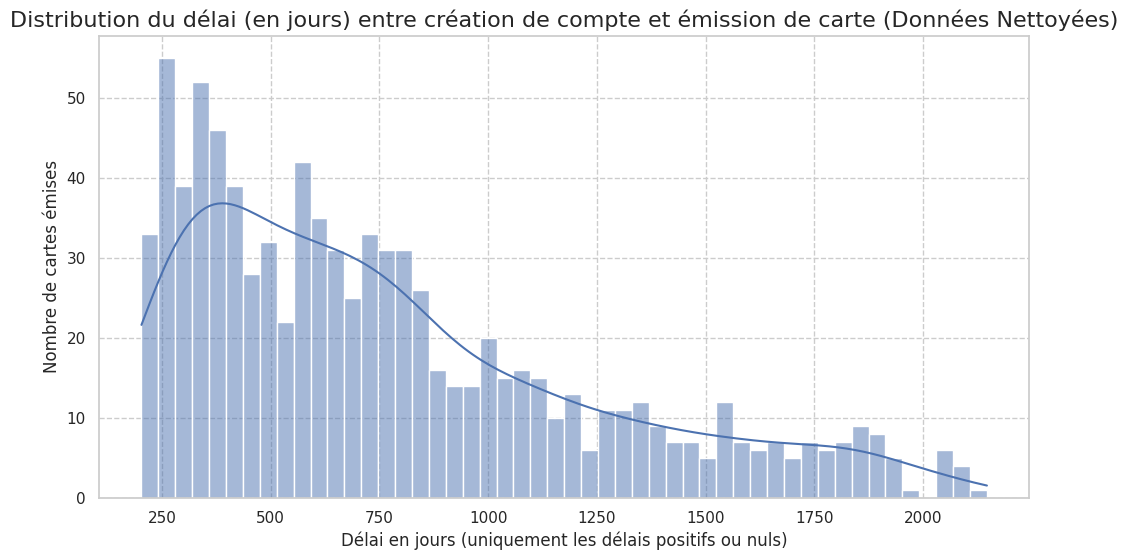

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On suppose que les DataFrames df_account_clean, df_card_clean, et df_disposition_clean sont chargés.
# La fusion et le calcul du délai restent les mêmes.
df_account_clean['date_creation_compte'] = pd.to_datetime(df_account_clean['account_date'], format='%y%m%d', errors='coerce')
df_card_clean['date_emission_carte'] = pd.to_datetime(df_card_clean['card_date'], format='%y%m%d', errors='coerce')
df_merged = pd.merge(df_card_clean, df_disposition_clean, on='disp_id', how='inner')
df_final = pd.merge(df_merged, df_account_clean, on='account_id', how='inner')
df_final['delai_emission_jours'] = (df_final['date_emission_carte'] - df_final['date_creation_compte']).dt.days


# --- ÉTAPE 3: DIAGNOSTIC DES PROBLÈMES DE DONNÉES ---
print("--- Analyse des Problèmes de Données ---")

# Compter les délais NaN (problème de conversion de date)
delais_nan = df_final['delai_emission_jours'].isna().sum()
print(f"Nombre de lignes avec un délai non calculable (NaN) : {delais_nan}")

# Isoler et compter les délais négatifs illogiques
delais_negatifs = df_final[df_final['delai_emission_jours'] < 0]
print(f"Nombre de cartes émises AVANT la création du compte : {len(delais_negatifs)}")
if not delais_negatifs.empty:
    print("Exemples de ces délais négatifs :")
    display(delais_negatifs[['account_id', 'card_id', 'date_creation_compte', 'date_emission_carte', 'delai_emission_jours']].head())


# --- ÉTAPE 4: VISUALISATION SUR LES DONNÉES NETTOYÉES ---
print("\n--- Création du graphique sur les données logiques ---")

# On crée une série de données "propres" pour le graphique
# 1. On enlève les NaN avec .dropna()
# 2. On ne garde que les délais positifs ou nuls (>= 0)
delais_propres = df_final['delai_emission_jours'].dropna()
delais_propres = delais_propres[delais_propres >= 0]


# Créer l'histogramme avec les données nettoyées
if not delais_propres.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(delais_propres, bins=50, kde=True)
    plt.title('Distribution du délai (en jours) entre création de compte et émission de carte (Données Nettoyées)', fontsize=16)
    plt.xlabel('Délai en jours (uniquement les délais positifs ou nuls)', fontsize=12)
    plt.ylabel('Nombre de cartes émises', fontsize=12)
    plt.grid(True, linestyle='--')
    #plt.savefig('delai_emission_carte_nettoye.png')
    plt.show()
else:
    print("Aucune donnée valide à afficher après le nettoyage.")

In [675]:
# On suppose que vos DataFrames df_account_clean et df_card_clean sont chargés

print("--- Inspection du format de date dans df_account_clean ---")
print(df_account_clean[['account_id', 'account_date']].head())
print("\nType de la colonne 'account_date':", df_account_clean['account_date'].dtype)

print("\n" + "="*50 + "\n")

print("--- Inspection du format de date dans df_card_clean ---")
print(df_card_clean[['card_id', 'card_date']].head())
print("\nType de la colonne 'card_date':", df_card_clean['card_date'].dtype)

--- Inspection du format de date dans df_account_clean ---
  account_id account_date
0        576   1993-01-01
1       3818   1993-01-01
2        704   1993-01-01
3       2378   1993-01-01
4       2632   1993-01-02

Type de la colonne 'account_date': datetime64[ns]


--- Inspection du format de date dans df_card_clean ---
  card_id  card_date
0    1005 1993-11-07
1     104 1994-01-19
2     747 1994-02-05
3      70 1994-02-08
4     577 1994-02-15

Type de la colonne 'card_date': datetime64[ns]


1. Conversion des colonnes de date (détection automatique)...
   -> Dates converties avec succès.
2. Fusion des tables...
   -> Fusion terminée.
3. Calcul du délai d'émission...
   -> Calcul terminé.

Quelques statistiques sur ce délai (en jours) :


count     892.000000
mean      777.374439
std       464.567606
min       203.000000
25%       394.500000
50%       658.500000
75%      1040.000000
max      2147.000000
Name: delai_emission_jours, dtype: float64


4. Création du graphique de distribution...


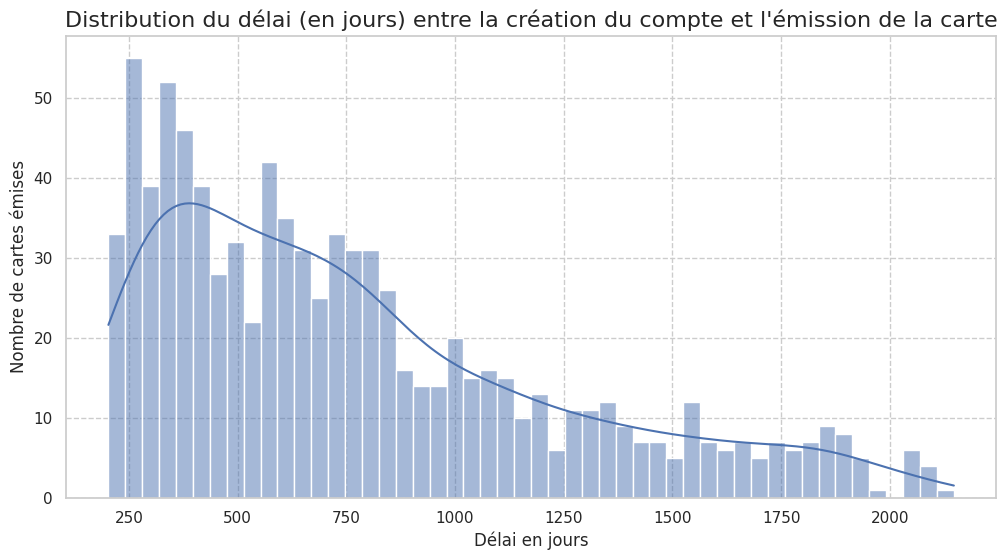

In [676]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On suppose que les DataFrames df_account_clean, df_card_clean, et df_disposition_clean sont chargés

# --- ÉTAPE 1 : CONVERSION DES DATES (LA CORRECTION EST ICI) ---
print("1. Conversion des colonnes de date (détection automatique)...")

# On laisse pandas deviner le format, car 'AAAA-MM-JJ' est un standard qu'il connaît.
df_account_clean['date_creation_compte'] = pd.to_datetime(df_account_clean['account_date'], errors='coerce')
df_card_clean['date_emission_carte'] = pd.to_datetime(df_card_clean['card_date'], errors='coerce')
print("   -> Dates converties avec succès.")


# --- ÉTAPE 2 : FUSIONNER LES TABLES (inchangé) ---
print("2. Fusion des tables...")
df_merged = pd.merge(df_card_clean, df_disposition_clean, on='disp_id', how='inner')
df_final = pd.merge(df_merged, df_account_clean, on='account_id', how='inner')
print("   -> Fusion terminée.")


# --- ÉTAPE 3 : CALCULER L'ÉCART DE TEMPS (inchangé) ---
print("3. Calcul du délai d'émission...")
df_final['delai_emission_jours'] = (df_final['date_emission_carte'] - df_final['date_creation_compte']).dt.days
print("   -> Calcul terminé.")


# --- ÉTAPE 4 : AFFICHER LES RÉSULTATS ---
print("\nQuelques statistiques sur ce délai (en jours) :")
display(df_final['delai_emission_jours'].describe())


# --- ÉTAPE 5 : VISUALISATION ---
print("\n4. Création du graphique de distribution...")
# On s'assure de ne tracer que les données valides en enlevant les potentiels NaNs restants
delais_a_tracer = df_final['delai_emission_jours'].dropna()

if not delais_a_tracer.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(delais_a_tracer, bins=50, kde=True)
    plt.title('Distribution du délai (en jours) entre la création du compte et l\'émission de la carte', fontsize=16)
    plt.xlabel('Délai en jours', fontsize=12)
    plt.ylabel('Nombre de cartes émises', fontsize=12)
    plt.grid(True, linestyle='--')
    #plt.savefig('delai_emission_carte_final.png')
    plt.show()
else:
    print("Aucune donnée de délai valide à afficher.")


--- Visualisation : Délai d'émission vs Date de Création du compte ---


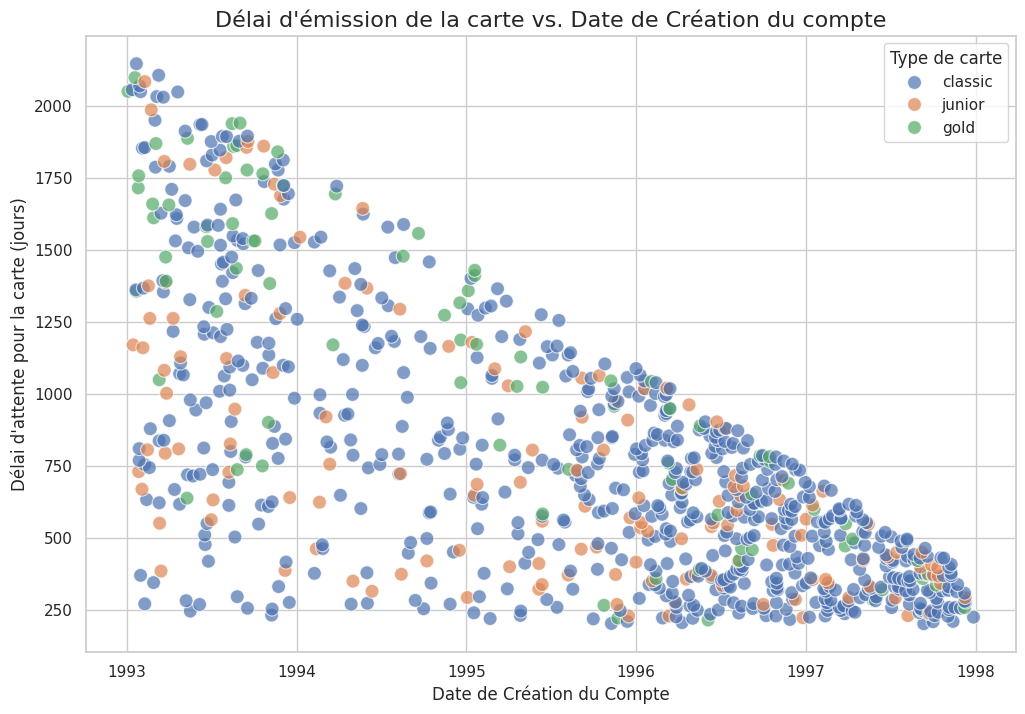

In [677]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- ÉTAPE 1 : CHARGEMENT ET PRÉPARATION DES DONNÉES (inchangé) ---
# On suppose que les fichiers clean sont chargés
#df_account_clean = pd.read_csv('account_clean.csv')
#df_card_clean = pd.read_csv('card_clean.csv')
#df_disposition_clean = pd.read_csv('disposition_clean.csv')

# Conversion des colonnes de date
df_account_clean['account_date_dt'] = pd.to_datetime(df_account_clean['account_date'])
df_card_clean['card_date_dt'] = pd.to_datetime(df_card_clean['card_date'])

# Fusion des tables
df_merged = pd.merge(df_card_clean, df_disposition_clean, on='disp_id', how='inner')
df_final = pd.merge(df_merged, df_account_clean, on='account_id', how='inner')

# Calcul du délai
df_final['delai_emission_jours'] = (df_final['card_date_dt'] - df_final['account_date_dt']).dt.days

# Sélection des colonnes pour l'analyse
result_table = df_final[['account_id', 'card_type', 'account_date_dt', 'delai_emission_jours']]


# --- ÉTAPE 2 : VISUALISATION MODIFIÉE ---
print("\n--- Visualisation : Délai d'émission vs Date de Création du compte ---")
plt.figure(figsize=(12, 8))

# LA MODIFICATION EST ICI : on utilise x='account_date_dt'
sns.scatterplot(
    data=result_table,
    x='account_date_dt',
    y='delai_emission_jours',
    hue='card_type',
    alpha=0.7,
    s=100
)

plt.title("Délai d'émission de la carte vs. Date de Création du compte", fontsize=16)
plt.xlabel("Date de Création du Compte", fontsize=12) # On met à jour le label de l'axe
plt.ylabel("Délai d'attente pour la carte (jours)", fontsize=12)
plt.grid(True)
plt.legend(title='Type de carte')
#plt.savefig('delai_vs_date_creation_carte.png')
plt.show()

1. Calcul du nombre de transactions par compte...
2. Identification du type de carte par compte...
3. Fusion des données...
   -> Données prêtes pour l'analyse.

4. Création du graphique de comparaison...


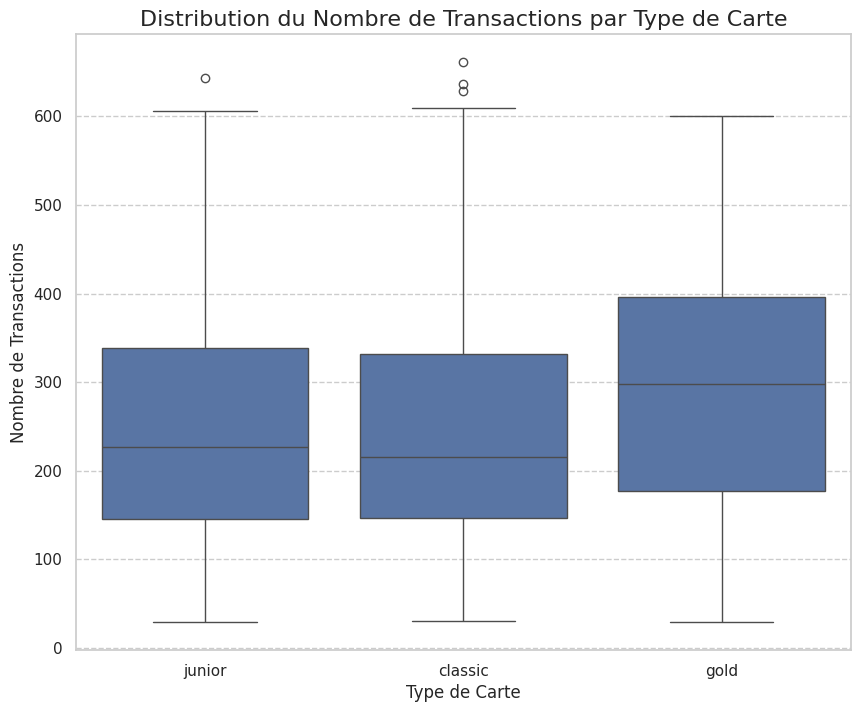


5. Exécution du test statistique pour confirmer...

--- Test de Kruskal-Wallis ---
Statistique H = 11.44
P-value = 0.003271558686847103
Conclusion : Il existe une différence statistiquement significative dans le nombre de transactions entre les différents types de cartes.


In [678]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# --- ÉTAPE 1: CHARGEMENT DES DONNÉES ---
# try:
#     # Utilisons les noms de vos fichiers "clean" qui ont les bonnes colonnes
#     #df_trans_clean = pd.read_csv('df_trans_clean.csv')
#     #df_card_clean = pd.read_csv('card_clean.csv')
#     #df_disposition_clean = pd.read_csv('disposition_clean.csv')
#     print("Fichiers 'clean' chargés avec succès.")
# except FileNotFoundError as e:
#     print(f"Erreur de chargement : {e}. Assurez-vous que les fichiers clean sont disponibles.")
#     # On arrête si les fichiers ne sont pas trouvés.


# --- ÉTAPE 2: PRÉPARATION DES DONNÉES (AVEC CORRECTION ROBUSTE) ---

# 1. Calculer le nombre de transactions par compte
print("1. Calcul du nombre de transactions par compte...")
trans_counts = df_trans_clean.groupby('account_id').size().reset_index(name='nb_transactions')

# 2. Identifier le type de carte pour chaque compte
print("2. Identification du type de carte par compte...")
card_disp = pd.merge(df_card_clean, df_disposition_clean, on='disp_id')

# LA CORRECTION EST ICI : On utilise directement 'card_type' car c'est le bon nom dans vos fichiers clean
card_info = card_disp[['account_id', 'card_type']]
# S'il y a plusieurs cartes pour un même compte, on garde la première trouvée
card_info = card_info.drop_duplicates(subset='account_id', keep='first')


# 3. Harmonisation des types et fusion
print("3. Fusion des données...")
trans_counts['account_id'] = trans_counts['account_id'].astype(int)
card_info['account_id'] = card_info['account_id'].astype(int)
df_analysis = pd.merge(trans_counts, card_info, on='account_id', how='inner')
print("   -> Données prêtes pour l'analyse.")


# --- ÉTAPE 3: VISUALISATION ---
# (Le reste du code est inchangé et devrait maintenant fonctionner)
print("\n4. Création du graphique de comparaison...")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_analysis, x='card_type', y='nb_transactions', order=['junior', 'classic', 'gold'])
plt.title('Distribution du Nombre de Transactions par Type de Carte', fontsize=16)
plt.xlabel('Type de Carte', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--')
#plt.savefig('transactions_par_type_carte.png')
plt.show()


# --- ÉTAPE 5: TEST STATISTIQUE (KRUSKAL-WALLIS) ---
print("\n5. Exécution du test statistique pour confirmer...")
try:
    # Préparer les données pour le test
    gold_trans = df_analysis[df_analysis['card_type'] == 'gold']['nb_transactions']
    classic_trans = df_analysis[df_analysis['card_type'] == 'classic']['nb_transactions']
    junior_trans = df_analysis[df_analysis['card_type'] == 'junior']['nb_transactions']

    # Exécuter le test
    stat, p_value = kruskal(gold_trans, classic_trans, junior_trans)

    print("\n--- Test de Kruskal-Wallis ---")
    print(f"Statistique H = {stat:.2f}")
    print(f"P-value = {p_value}")

    if p_value < 0.05:
        print("Conclusion : Il existe une différence statistiquement significative dans le nombre de transactions entre les différents types de cartes.")
    else:
        print("Conclusion : Il n'y a pas de différence statistiquement significative dans le nombre de transactions entre les différents types de cartes.")
except ValueError:
    print("Un ou plusieurs types de cartes n'ont pas de données de transaction, le test statistique ne peut être effectué.")

#check des tables

In [679]:
df_account_clean = df_account_clean.drop(columns=['account_date_dt'])
df_card_clean = df_card_clean.drop(columns=['card_date_dt'])

#date_creation_compte =  df_trans_clean.drop(columns=['year',	'month'	,'day',	'periode'])

In [680]:
df_account_clean = df_account_clean.drop(columns=['date_creation_compte'])
df_card_clean = df_card_clean.drop(columns=['date_emission_carte'])

In [681]:
df_card_clean['has_card'] = 1

In [682]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy(), #pbt2:  ajout de type_compte_kmeans
account = df_account_clean.copy(), #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_card_clean.head()),
card = df_card_clean.copy(),  #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI
#pbt compte : table compte, on ne garde pas ancienneté (droppper)
#pbt loan : RAS
#pbt card : drop de colonnes ajouter par Gemini et des dates sur transaction

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date  year  month  day  periode  has_card
0    1005    9285   classic 1993-11-07  1993     11    7  1993-11         1
1     104     588   classic 1994-01-19  1994      1   19  1994-01         1
2     747    4915   classic 1994-02-05  1994      2    5  1994-02         1
3      70     439   classic 1994-02-08  1994      2    8  1994-02         1
4     577    3687   classic 1994-02-15  1994      2   15  1994-02         1

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type         operation  trans_amount  \
0   695247       2378 1993-01-01     credit  depot en especes         700.0   
1   171812        576 1993-01-01     credit  depot en especes         900.0   
2   207264        704 1993-01-01     credit  depot en especes        1000.0   
3  1117247       3818 1993-01-01     credit  depot en especes         600.0   
4   579373       1972 1993-01-02     credit  depot en especes         400.0   

   trans_balance order_type  bank_to order_account  type_compte_kmeans  year  \
0          700.0    inconnu  inconnu       inconnu  Compte courant pro  1993   
1          900.0    inconnu  inconnu       inconnu      Compte épargne  1993   
2         1000.0    inconnu  inconnu       inconnu      Compte courant  1993   
3          600.0    inconnu  inconnu       inconnu      Compte courant  1993   
4          400.0    inconnu  inconnu       inconnu      Compte épargne  1993   

   month  day  periode  
0      1    1  1993-01  
1      1    1  1993-01  
2      1    1  1993-01  
3      1    1  1993-01  
4      1    2  1993-01

#**4 - Transaction**

##**interpolation**

In [683]:
from sklearn.preprocessing import LabelEncoder

# Copie du dataframe
df_interpolation = df_trans_clean.copy()


# df_interpolation['date'] = pd.to_datetime(df_['date'])
df_interpolation = df_interpolation.sort_values(by=['account_id', 'trans_date'])


df_interpolation['operation_clean'] = df_interpolation['operation'].replace("inconnu", pd.NA)


le = LabelEncoder()
known_ops = df_interpolation['operation_clean'].dropna()
le.fit(known_ops)


def encode_or_nan(val):
    if pd.isna(val):
        return np.nan
    return le.transform([val])[0]

df_interpolation['operation_encoded'] = df_interpolation['operation_clean'].apply(encode_or_nan)

# Interpolation
df_interpolation['operation_encoded_interp'] = (df_interpolation.groupby('account_id', group_keys=False)['operation_encoded']
                                                .apply(lambda x: x.interpolate(method='linear', limit_direction='both'))
)


df_interpolation['operation_interpolated'] = df_interpolation['operation_encoded_interp'].round().apply(lambda x: le.inverse_transform([int(x)])[0] if pd.notna(x) else "inconnu")


In [684]:
# Vérification
df_interpolation[['account_id', 'trans_date', 'operation', 'operation_interpolated']].head(10)

account_id trans_date           operation operation_interpolated
149431          1 1995-03-24    depot en especes       depot en especes
157403          1 1995-04-13    virement entrant       virement entrant
158831          1 1995-04-23    depot en especes       depot en especes
162680          1 1995-04-30             inconnu      retrait par carte
167082          1 1995-05-13    virement entrant       virement entrant
168562          1 1995-05-23    depot en especes       depot en especes
172578          1 1995-05-31             inconnu      retrait par carte
177507          1 1995-06-13    virement entrant       virement entrant
179167          1 1995-06-22  retrait en especes     retrait en especes
183499          1 1995-06-30             inconnu      retrait par carte

In [685]:
df_interpolation.value_counts('operation_interpolated')

operation_interpolated
retrait en especes    514018
virement sortant      208972
depot en especes      200618
virement entrant       67099
retrait par carte      65613
Name: count, dtype: int64

In [686]:
# Affichage des résultats
operation_counts.head(6)

operation   count
0  retrait en especes  434918
1    virement sortant  208283
2             inconnu  183114
3    depot en especes  156743
4    virement entrant   65226
5   retrait par carte    8036

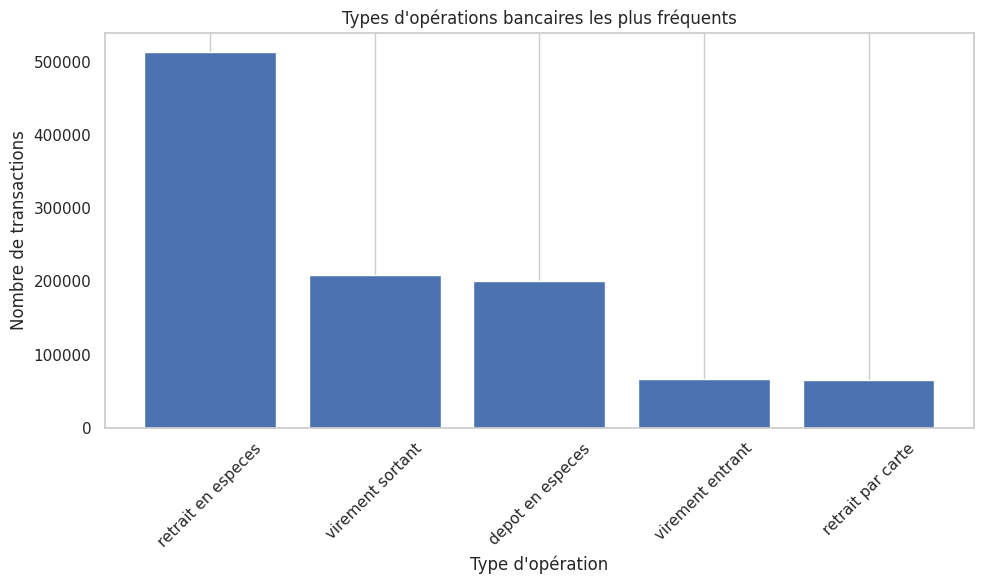

In [687]:
# Création d'un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(df_interpolation['operation_interpolated'].value_counts().index, df_interpolation['operation_interpolated'].value_counts().values)
plt.title("Types d'opérations bancaires les plus fréquents")
plt.xlabel("Type d'opération")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [688]:
df_interpolation.head()

trans_id account_id trans_date trans_type         operation  \
149431        1          1 1995-03-24     credit  depot en especes   
157403        5          1 1995-04-13     credit  virement entrant   
158831      199          1 1995-04-23     credit  depot en especes   
162680  3530438          1 1995-04-30     credit           inconnu   
167082        6          1 1995-05-13     credit  virement entrant   

        trans_amount  trans_balance           order_type  bank_to  \
149431        1000.0         1000.0              inconnu  inconnu   
157403        3679.0         4679.0              inconnu       AB   
158831       12600.0        17279.0              inconnu  inconnu   
162680          19.2        17298.2  interets crediteurs  inconnu   
167082        3679.0        20977.2              inconnu       AB   

       order_account type_compte_kmeans  year  month  day  periode  \
149431       inconnu     Compte épargne  1995      3   24  1995-03   
157403    41403269.0     Compte épargne  1995      4   13  1995-04   
158831       inconnu     Compte épargne  1995      4   23  1995-04   
162680       inconnu     Compte épargne  1995      4   30  1995-04   
167082    41403269.0     Compte épargne  1995      5   13  1995-05   

         operation_clean  operation_encoded  operation_encoded_interp  \
149431  depot en especes                0.0                       0.0   
157403  virement entrant                3.0                       3.0   
158831  depot en especes                0.0                       0.0   
162680              <NA>                NaN                       1.5   
167082  virement entrant                3.0                       3.0   

       operation_interpolated  
149431       depot en especes  
157403       virement entrant  
158831       depot en especes  
162680      retrait par carte  
167082       virement entrant

In [689]:
df_trans_clean.shape

(1056320, 15)

In [690]:

#Transformer df_interpolation en df_trans_clean propre
df_inter = df_interpolation[['trans_id', 'account_id', 'trans_date', 'trans_type',
       'trans_amount', 'trans_balance', 'order_type', 'bank_to',
       'order_account', 'type_compte_kmeans', 'year', 'month', 'day',
       'periode', 'operation_interpolated']]

df_inter = df_inter[['trans_id', 'account_id', 'trans_date', 'trans_type','operation_interpolated',
       'trans_amount', 'trans_balance', 'order_type', 'bank_to',
       'order_account', 'type_compte_kmeans', 'year', 'month', 'day',
       'periode']]

df_inter['operation'] = df_inter['operation_interpolated']

df_inter = df_inter[['trans_id', 'account_id', 'trans_date', 'trans_type','operation',
       'trans_amount', 'trans_balance', 'order_type', 'bank_to',
       'order_account', 'type_compte_kmeans', 'year', 'month', 'day',
       'periode']]
df_trans_clean = df_inter.copy()

/tmp/ipython-input-690-1242778754.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [691]:
df_trans_clean.head()

trans_id account_id trans_date trans_type          operation  \
149431        1          1 1995-03-24     credit   depot en especes   
157403        5          1 1995-04-13     credit   virement entrant   
158831      199          1 1995-04-23     credit   depot en especes   
162680  3530438          1 1995-04-30     credit  retrait par carte   
167082        6          1 1995-05-13     credit   virement entrant   

        trans_amount  trans_balance           order_type  bank_to  \
149431        1000.0         1000.0              inconnu  inconnu   
157403        3679.0         4679.0              inconnu       AB   
158831       12600.0        17279.0              inconnu  inconnu   
162680          19.2        17298.2  interets crediteurs  inconnu   
167082        3679.0        20977.2              inconnu       AB   

       order_account type_compte_kmeans  year  month  day  periode  
149431       inconnu     Compte épargne  1995      3   24  1995-03  
157403    41403269.0     Compte épargne  1995      4   13  1995-04  
158831       inconnu     Compte épargne  1995      4   23  1995-04  
162680       inconnu     Compte épargne  1995      4   30  1995-04  
167082    41403269.0     Compte épargne  1995      5   13  1995-05

##**Jointure**

In [692]:
client_account_district_trans_KP = pd.merge(df_trans_clean, client_account_district, on='account_id', how='left')

##**1 - Répartition par type de transaction**

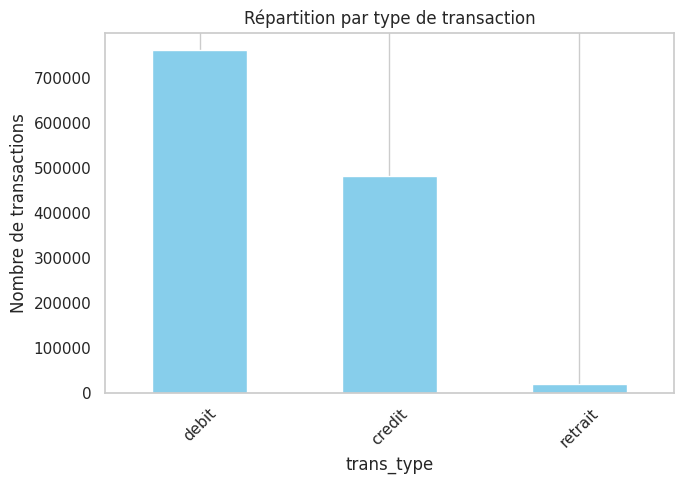

In [693]:
import matplotlib.pyplot as plt

# Vérifie que la colonne 'type' existe
if 'trans_type' in client_account_district_trans_KP.columns:
    plt.figure(figsize=(7,5))
    client_account_district_trans_KP['trans_type'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Répartition par type de transaction")
    plt.xlabel("trans_type")
    plt.ylabel("Nombre de transactions")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Colonne 'type' non trouvée.")


##**2 - Répartition par type d'opération**

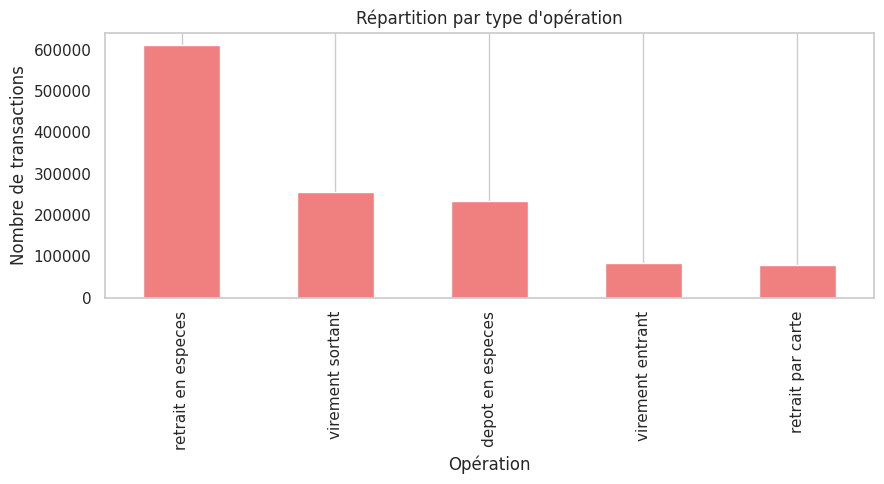

In [694]:
# Vérifie que la colonne 'operation' existe
if 'operation' in client_account_district_trans_KP.columns:
    plt.figure(figsize=(9,5))
    client_account_district_trans_KP['operation'].value_counts(dropna=False).plot(kind='bar', color='lightcoral')
    plt.title("Répartition par type d'opération")
    plt.xlabel("Opération")
    plt.ylabel("Nombre de transactions")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Colonne 'operation' non trouvée.")


##**3 - Volume total des montants par compte et type d'opération / Moyenne des montants par compte et type d'opération**
      

In [695]:
# On s'assure que les colonnes nécessaires existent
required_cols = ['account_id', 'operation', 'trans_amount']
if all(col in client_account_district_trans_KP.columns for col in required_cols):

    # 1. Volume total des montants par compte et type d'opération
    volume_total = client_account_district_trans_KP.groupby(['account_id', 'operation'])['trans_amount'].sum().reset_index()
    volume_total.rename(columns={'trans_amount': 'total_amount'}, inplace=True)

    # 2. Moyenne des montants par compte et type d'opération
    moyenne_montant = client_account_district_trans_KP.groupby(['account_id', 'operation'])['trans_amount'].mean().reset_index()
    moyenne_montant.rename(columns={'trans_amount': 'mean_amount'}, inplace=True)

    # Fusion des deux tableaux
    resume_trans = pd.merge(volume_total, moyenne_montant, on=['account_id', 'operation'])

    # Affichage classique
    resume_trans.head()  # ou .to_csv("resume_trans.csv") pour sauvegarder

else:
    print("Colonnes nécessaires manquantes :", [col for col in required_cols if col not in client_account_district_trans_KP.columns])


In [696]:
resume_trans  # ou .to_csv("resume_trans.csv") pour sauvegarder


account_id           operation  total_amount   mean_amount
0              1    depot en especes       25700.0   2141.666667
1              1  retrait en especes       83197.2    807.739806
2              1   retrait par carte        2589.7     68.150000
3              1    virement entrant      165607.6   3600.165217
4              1    virement sortant       98080.0   2452.000000
...          ...                 ...           ...           ...
17591        997    virement sortant       37050.0    617.500000
17592        998    depot en especes     1666302.7  19152.904598
17593        998  retrait en especes     1184045.8   6844.195376
17594        998   retrait par carte       37473.2   1561.383333
17595        998    virement sortant      435537.0   7641.000000

[17596 rows x 4 columns]

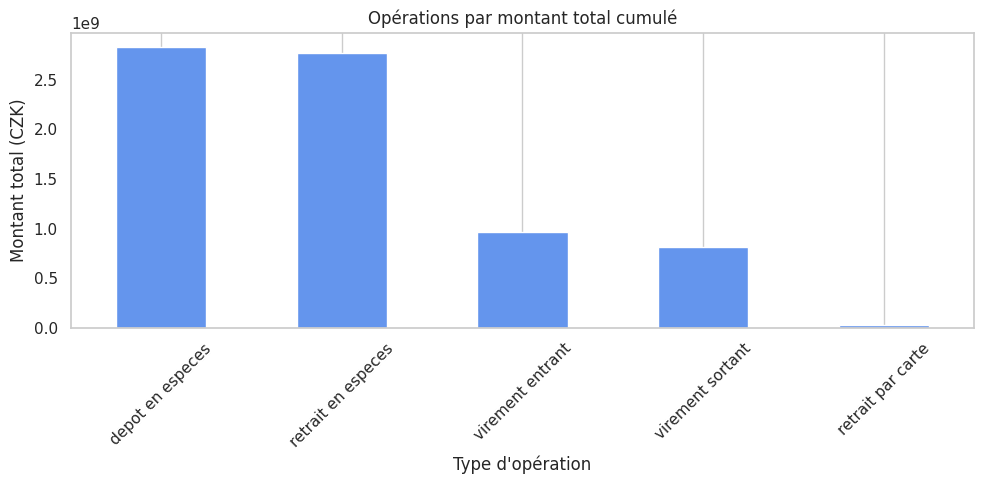

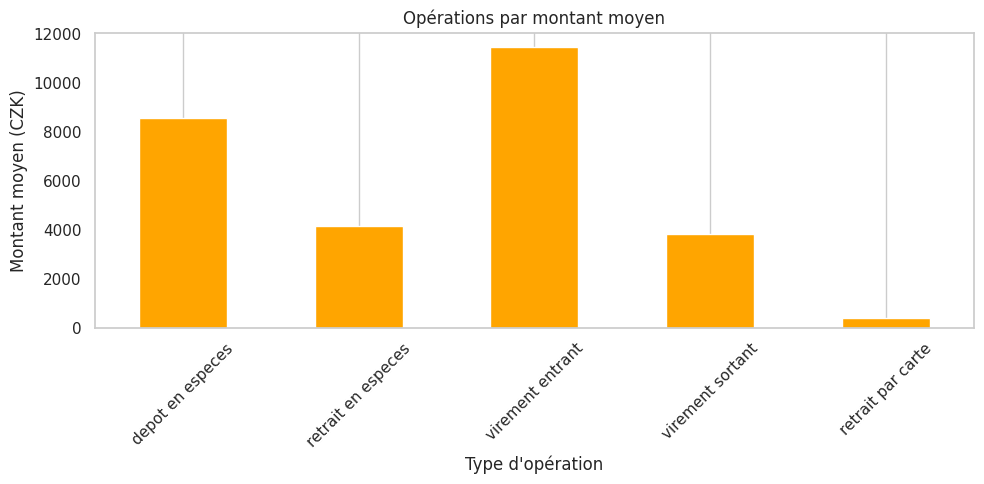

In [697]:
import matplotlib.pyplot as plt

# On agrège les données globalement par type d'opération (tous comptes confondus)
agg_by_operation = resume_trans.groupby('operation').agg({
    'total_amount': 'sum',
    'mean_amount': 'mean'
}).sort_values(by='total_amount', ascending=False)

# Sélection des 10 opérations les plus significatives
top_ops = agg_by_operation#.head(10)

# Tracé du volume total cumulé
plt.figure(figsize=(10, 5))
top_ops['total_amount'].plot(kind='bar', color='cornflowerblue')
plt.title("Opérations par montant total cumulé")
plt.xlabel("Type d'opération")
plt.ylabel("Montant total (CZK)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tracé du montant moyen
plt.figure(figsize=(10, 5))
top_ops['mean_amount'].plot(kind='bar', color='orange')
plt.title("Opérations par montant moyen")
plt.xlabel("Type d'opération")
plt.ylabel("Montant moyen (CZK)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##**4 - Volume total par compte et type d'opération**

/tmp/ipython-input-698-712824291.py:22: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



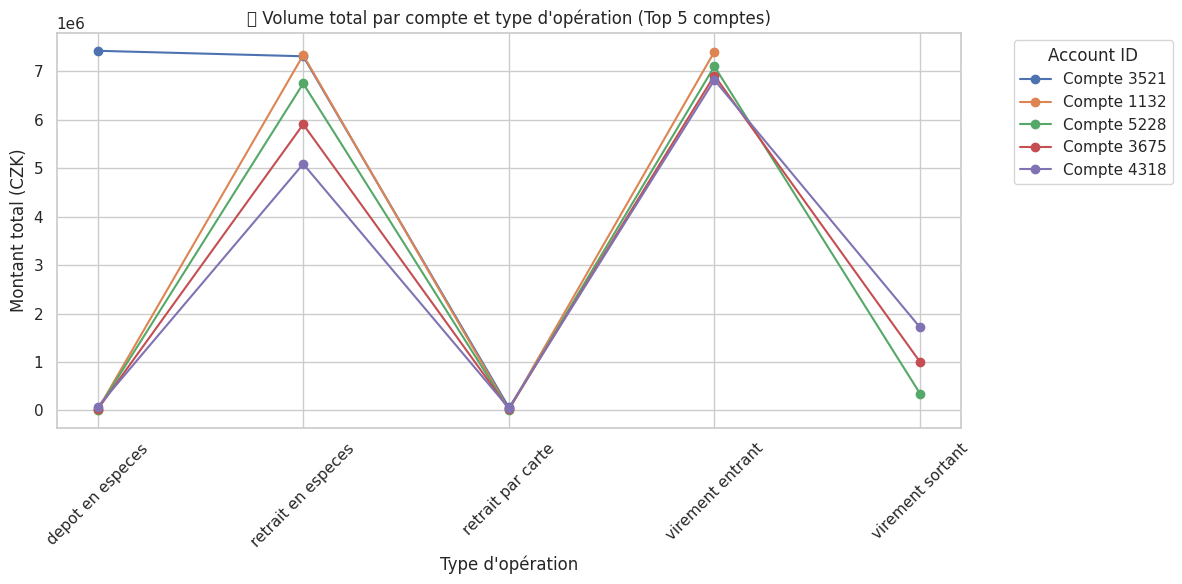

In [698]:
# 📊 1. Volume total par compte et type d'opération

import matplotlib.pyplot as plt

# On prend les 10 comptes les plus actifs par volume total (somme) toutes opérations confondues
top_comptes_volume = resume_trans.groupby('account_id')['total_amount'].sum().nlargest(5).index

# On filtre les lignes concernées
volume_top_accounts = resume_trans[resume_trans['account_id'].isin(top_comptes_volume)]

# Graphe
plt.figure(figsize=(12,6))
for compte in top_comptes_volume:
    subset = volume_top_accounts[volume_top_accounts['account_id'] == compte]
    plt.plot(subset['operation'], subset['total_amount'], marker='o', label=f'Compte {compte}')

plt.title("📊 Volume total par compte et type d'opération (Top 5 comptes)")
plt.xlabel("Type d'opération")
plt.ylabel("Montant total (CZK)")
plt.xticks(rotation=45)
plt.legend(title="Account ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


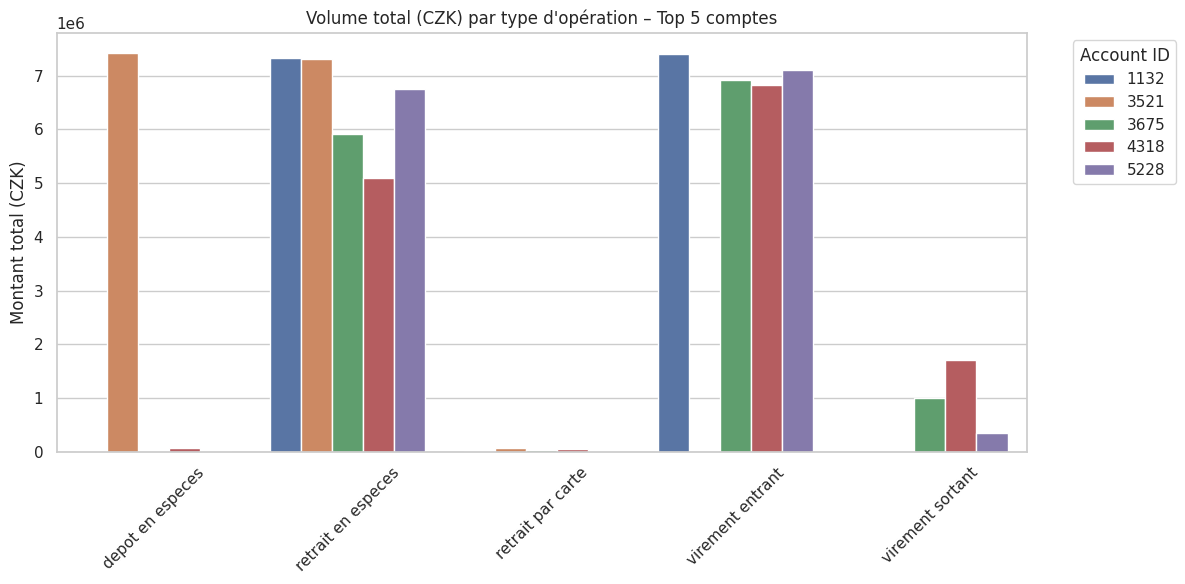

In [699]:
import seaborn as sns
import matplotlib.pyplot as plt

# ordre des colonnes pour qu’elles soient toujours dans le même sens
ordre_ops = ['depot en especes',
             'retrait en especes',
             'retrait par carte',
             'virement entrant',
             'virement sortant']

plt.figure(figsize=(12,6))
sns.barplot(data=volume_top_accounts,
            x='operation',
            y='total_amount',
            hue='account_id',
            order=ordre_ops)

plt.title("Volume total (CZK) par type d'opération – Top 5 comptes")
plt.xlabel("")
plt.ylabel("Montant total (CZK)")
plt.xticks(rotation=45)
plt.legend(title="Account ID", bbox_to_anchor=(1.04,1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-700-3374687281.py:20: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



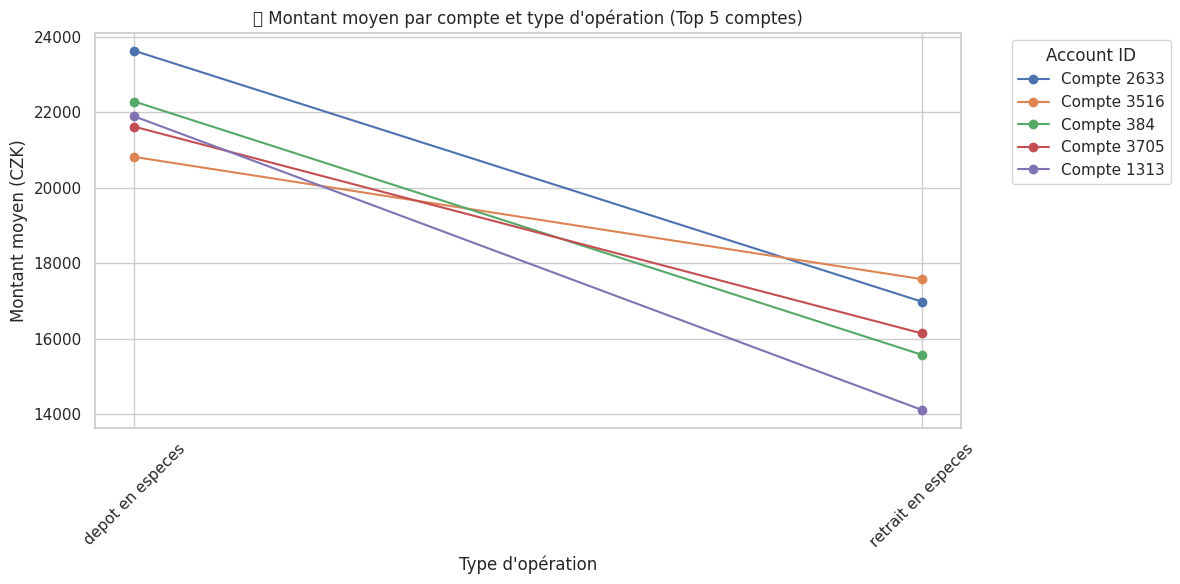

In [700]:
# 📈 2. Montant moyen par compte et type d'opération

# On prend les 10 comptes ayant les plus gros montants moyens cumulés (sur toutes opérations)
top_comptes_moyenne = resume_trans.groupby('account_id')['mean_amount'].mean().nlargest(5).index

# On filtre
mean_top_accounts = resume_trans[resume_trans['account_id'].isin(top_comptes_moyenne)]

# Graphe
plt.figure(figsize=(12,6))
for compte in top_comptes_moyenne:
    subset = mean_top_accounts[mean_top_accounts['account_id'] == compte]
    plt.plot(subset['operation'], subset['mean_amount'], marker='o', label=f'Compte {compte}')

plt.title("📈 Montant moyen par compte et type d'opération (Top 5 comptes)")
plt.xlabel("Type d'opération")
plt.ylabel("Montant moyen (CZK)")
plt.xticks(rotation=45)
plt.legend(title="Account ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


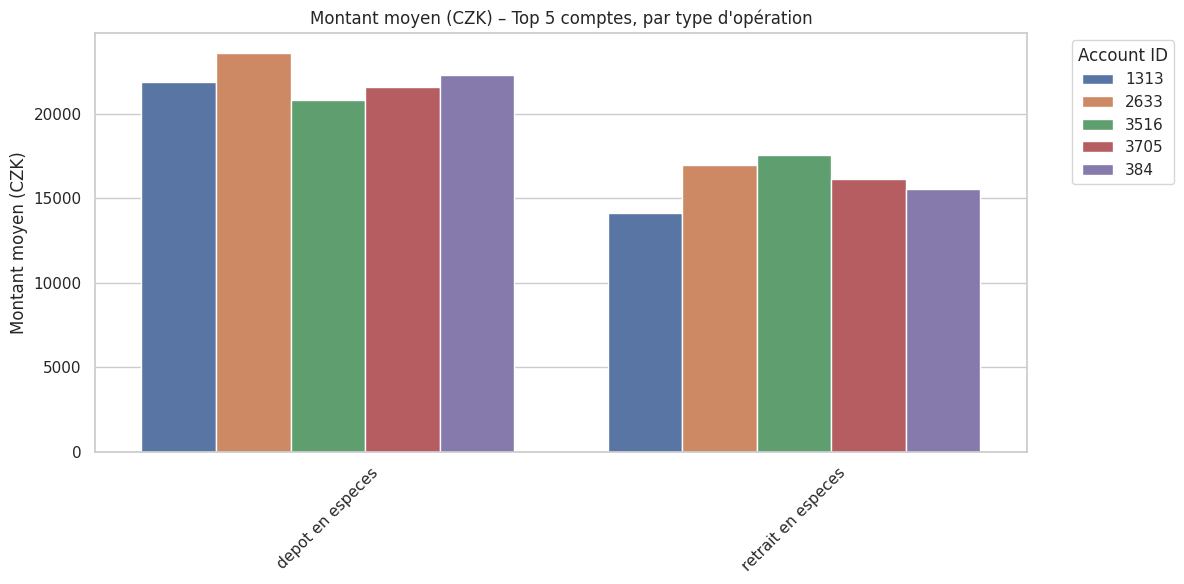

In [701]:
plt.figure(figsize=(12,6))
sns.barplot(data=mean_top_accounts,
            x='operation',
            y='mean_amount',
            hue='account_id')

plt.title("Montant moyen (CZK) – Top 5 comptes, par type d'opération")
plt.xlabel("")
plt.ylabel("Montant moyen (CZK)")
plt.xticks(rotation=45)
plt.legend(title="Account ID", bbox_to_anchor=(1.04,1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-702-578007354.py:27: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



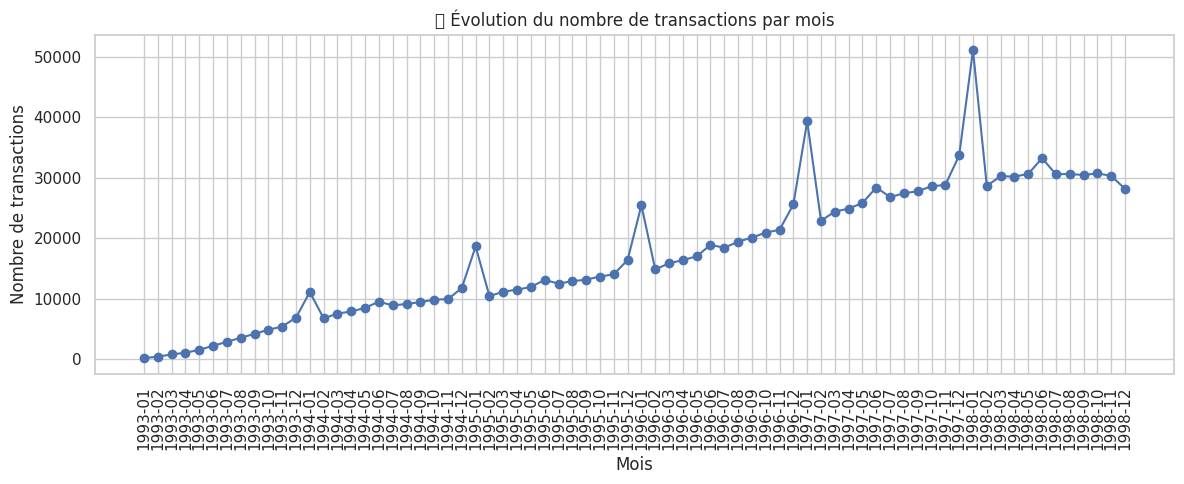

/tmp/ipython-input-702-578007354.py:37: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



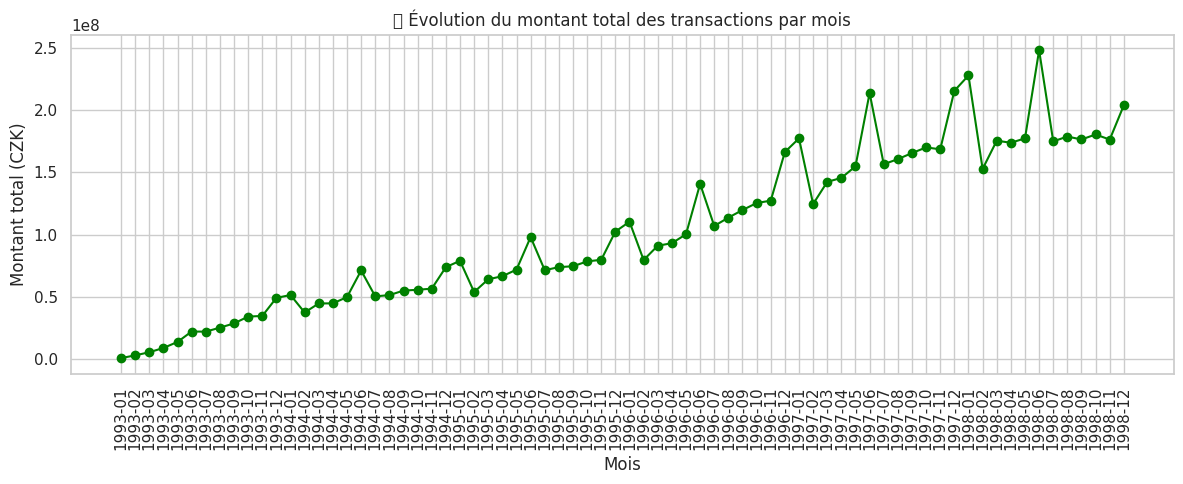

In [702]:
import pandas as pd
import matplotlib.pyplot as plt

# Vérifie et convertit la colonne date si besoin
if 'trans_date' not in client_account_district_trans_KP.columns and 'date' in client_account_district_trans_KP.columns:
    client_account_district_trans_KP.rename(columns={'date': 'trans_date'}, inplace=True)

client_account_district_trans_KP['trans_date'] = pd.to_datetime(client_account_district_trans_KP['trans_date'], errors='coerce')

# Regroupement mensuel
client_account_district_trans_KP['month_x'] = client_account_district_trans_KP['trans_date'].dt.to_period('M').astype(str)

monthly_stats = client_account_district_trans_KP.groupby('month_x').agg({
    'trans_amount': ['count', 'sum']
}).reset_index()

monthly_stats.columns = ['month_x', 'transaction_count', 'transaction_sum']

# Visualisation
plt.figure(figsize=(12,5))
plt.plot(monthly_stats['month_x'], monthly_stats['transaction_count'], marker='o', label='Nombre de transactions')
plt.title("📈 Évolution du nombre de transactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly_stats['month_x'], monthly_stats['transaction_sum'], marker='o', color='green', label='Montant total')
plt.title("💰 Évolution du montant total des transactions par mois")
plt.xlabel("Mois")
plt.ylabel("Montant total (CZK)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-703-1151427548.py:27: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



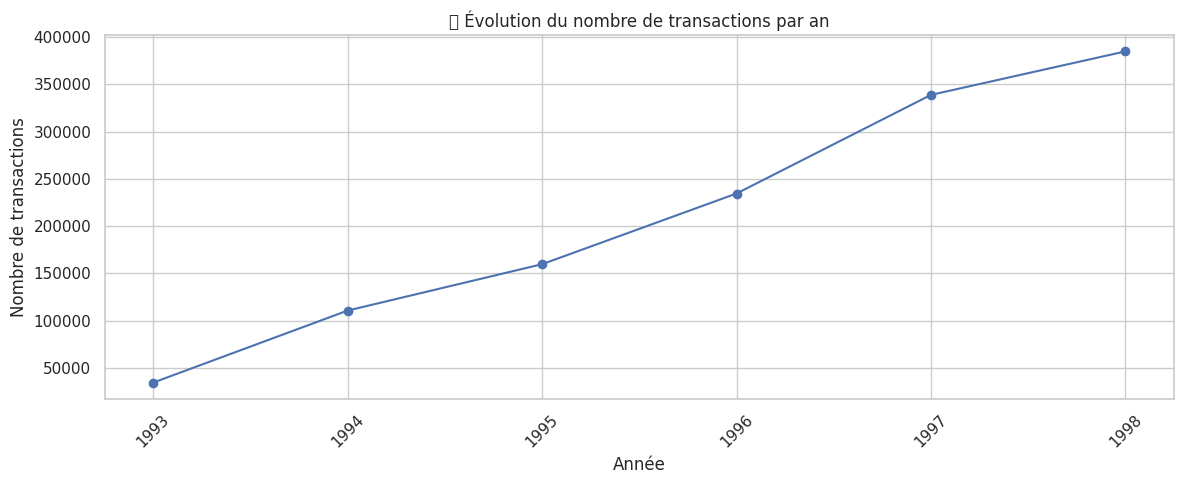

/tmp/ipython-input-703-1151427548.py:37: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



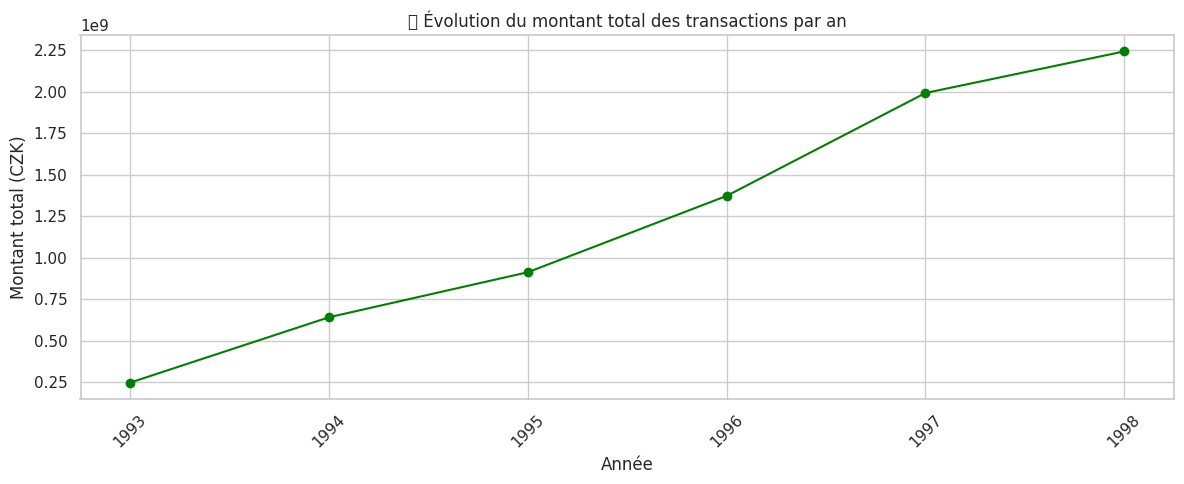

In [703]:
import pandas as pd
import matplotlib.pyplot as plt

# Vérifie et convertit la colonne date si besoin
if 'trans_date' not in client_account_district_trans_KP.columns and 'date' in client_account_district_trans_KP.columns:
    client_account_district_trans_KP.rename(columns={'date': 'trans_date'}, inplace=True)

client_account_district_trans_KP['trans_date'] = pd.to_datetime(client_account_district_trans_KP['trans_date'], errors='coerce')

# Regroupement mensuel
client_account_district_trans_KP['year_x'] = client_account_district_trans_KP['trans_date'].dt.to_period('Y').astype(str)

monthly_stats = client_account_district_trans_KP.groupby('year_x').agg({
    'trans_amount': ['count', 'sum']
}).reset_index()

monthly_stats.columns = ['year_x', 'transaction_count', 'transaction_sum']

# Visualisation
plt.figure(figsize=(12,5))
plt.plot(monthly_stats['year_x'], monthly_stats['transaction_count'], marker='o', label='Nombre de transactions')
plt.title("📈 Évolution du nombre de transactions par an")
plt.xlabel("Année")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly_stats['year_x'], monthly_stats['transaction_sum'], marker='o', color='green', label='Montant total')
plt.title("💰 Évolution du montant total des transactions par an")
plt.xlabel("Année")
plt.ylabel("Montant total (CZK)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##**5 - Évolution des types d'opérations bancaires (jusqu'à 1999)**

/tmp/ipython-input-704-345452604.py:28: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



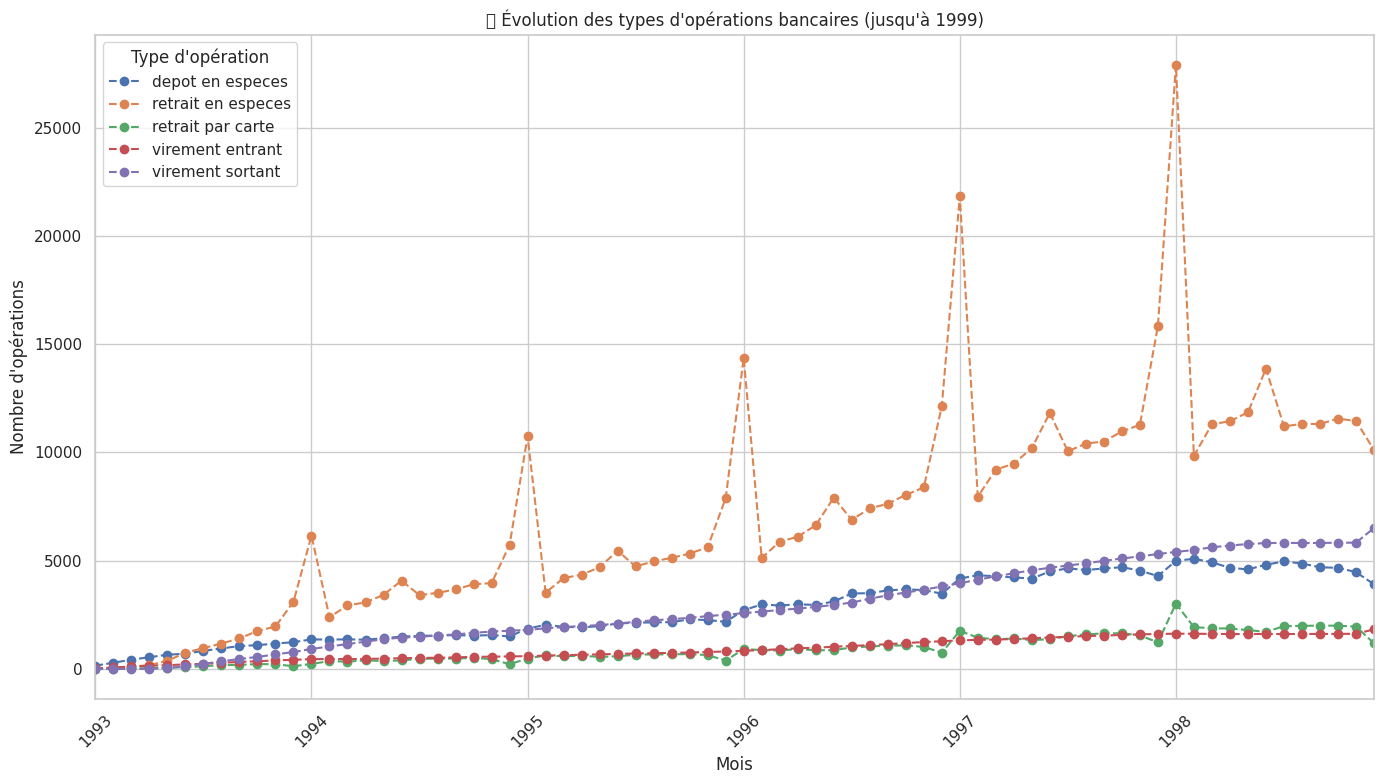

In [704]:
import pandas as pd
import matplotlib.pyplot as plt


# Vérifie si la colonne 'type' existe
if 'trans_type' not in df_trans_clean.columns:
    print("❌ Erreur : colonne 'type' absente du fichier.")
else:
    # Groupe par mois et type
    grouped = df_trans_clean.groupby(['periode', 'operation']).size().reset_index(name='count')

    # Tableau pivot pour les courbes
    pivoted = grouped.pivot(index='periode', columns='operation', values='count').fillna(0)

    # Tracé
    pivoted.plot(
    figsize=(14, 8),  #<-- LA CORRECTION EST ICI (ex: 18 de large, 8 de haut)
    marker='o',
    linestyle='--'
    )
    #plt.figure(figsize=(14, 6))
    #pivoted.plot(marker='o')
    plt.title("📈 Évolution des types d'opérations bancaires (jusqu'à 1999)")
    plt.xlabel("Mois")
    plt.ylabel("Nombre d'opérations")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Type d'opération")
    plt.show()


#check des tables

In [705]:
display(df_loan_clean.head()),
#loan = df_loan_clean.copy(), #pbt2: ajout de has_loan

display(df_client_clean.head()),
#client = df_client_clean.copy() # pbt1 ajout des tranches d'age

display(df_account_clean.head()),
#account = df_account_clean.copy(), #pbt2:  ajout de type_compte_kmeans
#account = df_account_clean.copy(), #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_card_clean.head()),
#card = df_card_clean.copy(),  #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_disposition_clean.head()),
display(df_district_clean.head()),
#district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head()),

display(df_trans_clean.head())
#transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans
#transaction = df_trans_clean.copy() #pbt transaction: remplacer les inconnus par des valeurs sur la colonne Operation

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI
#pbt compte : table compte, on ne garde pas ancienneté (droppper)
#pbt loan : RAS
#pbt card : drop de colonnes ajouter par Gemini et des dates sur transaction

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age
0         1          18 1970-12-13      F   28       18-30
1         2           1 1945-02-04      M   53       46-60
2         3           1 1940-10-09      F   58       46-60
3         4           5 1956-12-01      M   42       31-45
4         5           5 1960-07-03      F   38       31-45

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date  year  month  day  periode  has_card
0    1005    9285   classic 1993-11-07  1993     11    7  1993-11         1
1     104     588   classic 1994-01-19  1994      1   19  1994-01         1
2     747    4915   classic 1994-02-05  1994      2    5  1994-02         1
3      70     439   classic 1994-02-08  1994      2    8  1994-02         1
4     577    3687   classic 1994-02-15  1994      2   15  1994-02         1

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type          operation  \
149431        1          1 1995-03-24     credit   depot en especes   
157403        5          1 1995-04-13     credit   virement entrant   
158831      199          1 1995-04-23     credit   depot en especes   
162680  3530438          1 1995-04-30     credit  retrait par carte   
167082        6          1 1995-05-13     credit   virement entrant   

        trans_amount  trans_balance           order_type  bank_to  \
149431        1000.0         1000.0              inconnu  inconnu   
157403        3679.0         4679.0              inconnu       AB   
158831       12600.0        17279.0              inconnu  inconnu   
162680          19.2        17298.2  interets crediteurs  inconnu   
167082        3679.0        20977.2              inconnu       AB   

       order_account type_compte_kmeans  year  month  day  periode  
149431       inconnu     Compte épargne  1995      3   24  1995-03  
157403    41403269.0     Compte épargne  1995      4   13  1995-04  
158831       inconnu     Compte épargne  1995      4   23  1995-04  
162680       inconnu     Compte épargne  1995      4   30  1995-04  
167082    41403269.0     Compte épargne  1995      5   13  1995-05

In [706]:
#vérification
#df_trans_clean['operation'].value_counts(dropna = False)

#**5 - Client Solvabilité**

###**Jointure**

In [707]:
df_client_disp = pd.merge(df_client_clean, df_disposition_clean, on='client_id', how='left')
df_client_account = pd.merge(df_client_disp, df_account_clean, on='account_id', how='left')
df_client_loan = pd.merge(df_client_account, df_loan_clean, on='account_id', how='left')
df_full = pd.merge(df_client_loan, df_district_clean, left_on='district_id_x', right_on='district_id', how='left')

In [708]:
import pandas as pd
from datetime import date
# MAPPING : client  →  account
df_client_disp = (df_disposition_clean
                  .merge(df_client_clean, on='client_id', how='left'))

df_client_account = (df_client_disp
                     .merge(df_account_clean, on='account_id', how='left'))

# PRÊTS  (1 max par compte)

df_loan_flag = df_loan_clean.rename(columns={'amount': 'loan_amount',
                                             'duration': 'loan_duration',
                                             'payments': 'loan_pmt'})
df_client_loan = df_client_account.merge(df_loan_flag,
                                         on='account_id', how='left')

# AGRÉGATS TRANSACTIONS

# solde moyen
trans = df_trans_clean.copy()
trans['trans_balance'] = trans['trans_balance'].astype(float)
avg_bal = (trans.groupby('account_id')['trans_balance']
                 .mean().reset_index(name='avg_balance'))

# « incidents » de trésorerie : retraits, paiements, découverts
mask_inc = trans['operation'].str.contains(
              'withdraw|collect|remit|credit card',
              case=False, na=False)

incidents = (trans[mask_inc]
             .groupby('account_id')
             .size()
             .reset_index(name='nb_incidents'))
for df in [df_client_loan, avg_bal, incidents]:
    df['account_id'] = df['account_id'].astype(str)


# fusion agrégats
df_client_tx = (df_client_loan
                .merge(avg_bal, on='account_id', how='left')
                .merge(incidents, on='account_id', how='left'))

df_client_tx['avg_balance'].fillna(0, inplace=True)
df_client_tx['nb_incidents'].fillna(0, inplace=True)


# 4.  VARIABLES DE SOLVABILITÉ

# flags prêts / cartes
df_client_tx['has_loan'] = df_client_tx['loan_amount'].notna().astype(int)

# ratio mensualité / solde moyen (évite division par 0)
df_client_tx['loan_monthly_ratio'] = (
    df_client_tx['loan_payments'] /
    df_client_tx['avg_balance'].replace(0, pd.NA)
).fillna(0)

# seuils data-driven (percentiles)
ratio_p75     = df_client_tx['loan_monthly_ratio'].quantile(0.75)
incident_p75  = df_client_tx['nb_incidents'].quantile(0.75)

df_client_tx['solvable'] = (
      (df_client_tx['loan_monthly_ratio'] < ratio_p75)
    & (df_client_tx['nb_incidents']       < incident_p75)
).astype(int)

#  AGRÉGATION PAR CLIENT
df_solv = (df_client_tx
           .groupby('client_id')
           .agg(has_loan          = ('has_loan', 'max'),
                loan_amount_sum  = ('loan_amount', 'sum'),
                loan_monthly_ratio= ('loan_monthly_ratio', 'mean'),
                avg_balance       = ('avg_balance', 'mean'),
                nb_incidents      = ('nb_incidents', 'sum'),
                solvable          = ('solvable', 'max'))
           .reset_index())



# Calculer le 75e percentile SANS les zéros
ratio_p75 = (df_solv['loan_monthly_ratio']
             .loc[lambda s: s > 0]
             .quantile(0.75))

# Si tout est à 0 → on force un epsilon, ex. 0.01
if pd.isna(ratio_p75) or ratio_p75 == 0:
    ratio_p75 = 0.01

# Construire les bornes, puis supprimer les doublons éventuels
bins = pd.unique([-float('inf'), ratio_p75/2, ratio_p75, float('inf')])

# Adapter la liste de labels au nombre de classes (len(bins)-1)
labels = ['Solvable (A)', 'Vigilance (B)', 'Risque (C)'][:len(bins)-1]

# Découper
df_solv['segment_solvabilité'] = pd.cut(
    df_solv['loan_monthly_ratio'],
    bins=bins,
    labels=labels,
    duplicates='drop'
)

# RÉSULTAT
df_solv['segment_solvabilité'].value_counts(dropna=False)
df_solv


/tmp/ipython-input-708-645580608.py:44: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-708-645580608.py:45: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

client_id  has_loan  loan_amount_sum  loan_monthly_ratio   avg_balance  \
0            1         0              0.0            0.000000  15994.008368   
1           10         0              0.0            0.000000  46819.412992   
2          100         0              0.0            0.000000  47136.309005   
3         1000         0              0.0            0.000000  56565.029245   
4         1001         0              0.0            0.000000  15526.677391   
...        ...       ...              ...                 ...           ...   
5364       998         0              0.0            0.000000  22422.466981   
5365      9987         1         260400.0            0.130823  33174.544828   
5366       999         0              0.0            0.000000  56565.029245   
5367      9995         1          56100.0            0.045428  20582.007435   
5368      9997         1         220428.0            0.104106  58814.783851   

      nb_incidents  solvable segment_solvabilité  
0              0.0         0        Solvable (A)  
1              0.0         0        Solvable (A)  
2              0.0         0        Solvable (A)  
3              0.0         0        Solvable (A)  
4              0.0         0        Solvable (A)  
...            ...       ...                 ...  
5364           0.0         0        Solvable (A)  
5365           0.0         0          Risque (C)  
5366           0.0         0        Solvable (A)  
5367           0.0         0        Solvable (A)  
5368           0.0         0       Vigilance (B)  

[5369 rows x 8 columns]

In [709]:
df_solv['segment_solvabilité'].value_counts()

segment_solvabilité
Solvable (A)     4777
Vigilance (B)     386
Risque (C)        206
Name: count, dtype: int64

##**interpretation de la solvabilité**

In [710]:

# # | Segment           | Règle (rappel)                                          |  Effectif | Part du portefeuille | Lecture terrain                                                                                                      |
# # | ----------------- | ------------------------------------------------------- | --------: | -------------------: | -------------------------------------------------------------------------------------------------------------------- |
# # | **Solvable (A)**  | mensualité / solde moyen < ½ P75 **ET** incidents < P75 | **4 777** |           **≈ 89 %** | Clientèle globalement saine : capacité de remboursement confortable ; incidents de trésorerie inférieurs à la norme. |
# # | **Vigilance (B)** | ½ P75 ≤ ratio < P75 **OU/ET** incidents proches P75     |   **386** |                ≈ 7 % | Situation correcte mais marge de manœuvre plus faible ; suivi prudent, proposer conseils budgétaires.                |
# # | **Risque (C)**    | ratio ≥ P75 **OU** incidents ≥ P75                      |   **206** |                ≈ 4 % | Tension de trésorerie élevée ; potentiel défaut en cas de choc. Priorité : restructuration ou garanties.             |

# # ********Total clients analysés : 5 369.

# 1. Ce que cela dit de votre portefeuille
# Structure très favorable : près de 9 clients sur 10 sont dans la zone verte (A).

# Risque concentré : 4 % (« C ») suffisent toutefois à entraîner des pertes si les encours sont élevés ; ces clients méritent un suivi individualisé.

# Les clients « B » forment une zone tampon : ils ne posent pas encore problème mais peuvent basculer vers « C » en cas d’augmentation des taux ou perte de revenus.


##**visualistaion**

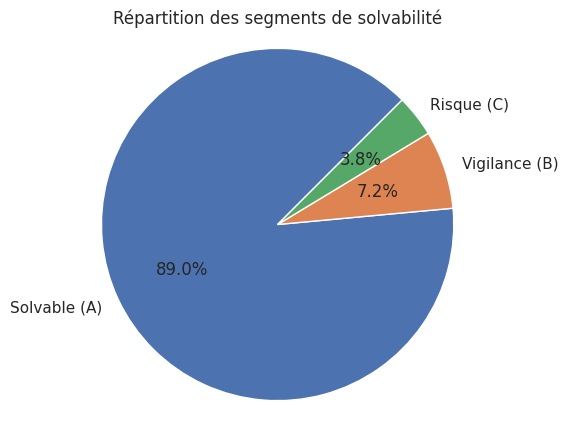

In [711]:
import matplotlib.pyplot as plt

# Data for the solvency segments
labels = ['Solvable (A)', 'Vigilance (B)', 'Risque (C)']
sizes = [4777, 386, 206]

# Create the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition des segments de solvabilité')

plt.show()


In [712]:
client_solv = pd.merge(df_client_clean, df_solv, how = 'left', on = 'client_id')
client_solv

client_id district_id birth_date gender  age tranche_age  has_loan  \
0            1          18 1970-12-13      F   28       18-30         0   
1            2           1 1945-02-04      M   53       46-60         1   
2            3           1 1940-10-09      F   58       46-60         1   
3            4           5 1956-12-01      M   42       31-45         0   
4            5           5 1960-07-03      F   38       31-45         0   
...        ...         ...        ...    ...  ...         ...       ...   
5364     13955           1 1945-10-30      F   53       46-60         1   
5365     13956           1 1943-04-06      M   55       46-60         1   
5366     13968          61 1968-04-13      M   30       18-30         1   
5367     13971          67 1962-10-19      F   36       31-45         1   
5368     13998          74 1953-08-12      F   45       31-45         0   

      loan_amount_sum  loan_monthly_ratio   avg_balance  nb_incidents  \
0                 0.0            0.000000  15994.008368           0.0   
1             80952.0            0.092308  36540.704393           0.0   
2             80952.0            0.092308  36540.704393           0.0   
3                 0.0            0.000000  26973.506838           0.0   
4                 0.0            0.000000  26973.506838           0.0   
...               ...                 ...           ...           ...   
5364         419880.0            0.143491  48769.447039           0.0   
5365         419880.0            0.143491  48769.447039           0.0   
5366          54024.0            0.124689  36105.771958           0.0   
5367         129408.0            0.176961  30469.940407           0.0   
5368              0.0            0.000000  36379.728458           0.0   

      solvable segment_solvabilité  
0            0        Solvable (A)  
1            0       Vigilance (B)  
2            0       Vigilance (B)  
3            0        Solvable (A)  
4            0        Solvable (A)  
...        ...                 ...  
5364         0          Risque (C)  
5365         0          Risque (C)  
5366         0          Risque (C)  
5367         0          Risque (C)  
5368         0        Solvable (A)  

[5369 rows x 13 columns]

In [713]:
client_solv = client_solv[['client_id', 'district_id', 'birth_date', 'gender', 'age','tranche_age',
  'has_loan', 'loan_amount_sum', 'loan_monthly_ratio',
  'segment_solvabilité']]
client_solv

client_id district_id birth_date gender  age tranche_age  has_loan  \
0            1          18 1970-12-13      F   28       18-30         0   
1            2           1 1945-02-04      M   53       46-60         1   
2            3           1 1940-10-09      F   58       46-60         1   
3            4           5 1956-12-01      M   42       31-45         0   
4            5           5 1960-07-03      F   38       31-45         0   
...        ...         ...        ...    ...  ...         ...       ...   
5364     13955           1 1945-10-30      F   53       46-60         1   
5365     13956           1 1943-04-06      M   55       46-60         1   
5366     13968          61 1968-04-13      M   30       18-30         1   
5367     13971          67 1962-10-19      F   36       31-45         1   
5368     13998          74 1953-08-12      F   45       31-45         0   

      loan_amount_sum  loan_monthly_ratio segment_solvabilité  
0                 0.0            0.000000        Solvable (A)  
1             80952.0            0.092308       Vigilance (B)  
2             80952.0            0.092308       Vigilance (B)  
3                 0.0            0.000000        Solvable (A)  
4                 0.0            0.000000        Solvable (A)  
...               ...                 ...                 ...  
5364         419880.0            0.143491          Risque (C)  
5365         419880.0            0.143491          Risque (C)  
5366          54024.0            0.124689          Risque (C)  
5367         129408.0            0.176961          Risque (C)  
5368              0.0            0.000000        Solvable (A)  

[5369 rows x 10 columns]

In [714]:
#vérification
#df_trans_clean['operation'].value_counts(dropna = False)

In [715]:
df_card_clean.head()

card_id disp_id card_type  card_date  year  month  day  periode  has_card
0    1005    9285   classic 1993-11-07  1993     11    7  1993-11         1
1     104     588   classic 1994-01-19  1994      1   19  1994-01         1
2     747    4915   classic 1994-02-05  1994      2    5  1994-02         1
3      70     439   classic 1994-02-08  1994      2    8  1994-02         1
4     577    3687   classic 1994-02-15  1994      2   15  1994-02         1

In [716]:
# jointure client avec loan et card
client_disp = pd.merge(df_client_clean, df_disposition_clean, on='client_id', how='left')
client_loan= pd.merge(client_disp, df_loan_clean, on='account_id', how='left')
client_card = pd.merge(client_loan, df_card_clean, on='disp_id', how='left')
client_card['has_card'] = client_card['card_id'].notna().astype(int)
client_card['has_loan'] = client_card['has_loan'].notna().astype(int)
client_card['has_account'] = client_card['disp_role'].replace({'OWNER': 1, 'DISPONENT': 0})
client_card.columns

/tmp/ipython-input-716-3805417473.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Index(['client_id', 'district_id', 'birth_date', 'gender', 'age',
       'tranche_age', 'disp_id', 'account_id', 'disp_role', 'loan_id',
       'loan_date', 'loan_amount', 'loan_duration', 'loan_payments',
       'loan_status', 'has_loan', 'card_id', 'card_type', 'card_date', 'year',
       'month', 'day', 'periode', 'has_card', 'has_account'],
      dtype='object')

In [717]:
client_card = client_card[['client_id', 'district_id', 'birth_date', 'gender', 'age',
       'tranche_age', 'has_account','has_loan', 'has_card']]

client_card

client_id district_id birth_date gender  age tranche_age  has_account  \
0            1          18 1970-12-13      F   28       18-30            1   
1            2           1 1945-02-04      M   53       46-60            1   
2            3           1 1940-10-09      F   58       46-60            0   
3            4           5 1956-12-01      M   42       31-45            1   
4            5           5 1960-07-03      F   38       31-45            0   
...        ...         ...        ...    ...  ...         ...          ...   
5364     13955           1 1945-10-30      F   53       46-60            1   
5365     13956           1 1943-04-06      M   55       46-60            0   
5366     13968          61 1968-04-13      M   30       18-30            1   
5367     13971          67 1962-10-19      F   36       31-45            1   
5368     13998          74 1953-08-12      F   45       31-45            1   

      has_loan  has_card  
0            0         0  
1            1         0  
2            1         0  
3            0         0  
4            0         0  
...        ...       ...  
5364         1         0  
5365         1         0  
5366         1         1  
5367         1         0  
5368         0         0  

[5369 rows x 9 columns]

#**Analyse Sup**

In [718]:
# Fusion client ↔ disposition ↔ compte
df_disp_client = df_disposition_clean.merge(client_card, on='client_id', how='left')
df_account_client = df_disp_client.merge(df_account_clean, on='account_id', how='left')
df_account_client

disp_id client_id account_id  disp_role district_id_x birth_date gender  \
0          1         1          1      OWNER            18 1970-12-13      F   
1          2         2          2      OWNER             1 1945-02-04      M   
2          3         3          2  DISPONENT             1 1940-10-09      F   
3          4         4          3      OWNER             5 1956-12-01      M   
4          5         5          3  DISPONENT             5 1960-07-03      F   
...      ...       ...        ...        ...           ...        ...    ...   
5364   13647     13955      11349      OWNER             1 1945-10-30      F   
5365   13648     13956      11349  DISPONENT             1 1943-04-06      M   
5366   13660     13968      11359      OWNER            61 1968-04-13      M   
5367   13663     13971      11362      OWNER            67 1962-10-19      F   
5368   13690     13998      11382      OWNER            74 1953-08-12      F   

      age tranche_age  has_account  has_loan  has_card district_id_y  \
0      28       18-30            1         0         0            18   
1      53       46-60            1         1         0             1   
2      58       46-60            0         1         0             1   
3      42       31-45            1         0         0             5   
4      38       31-45            0         0         0             5   
...   ...         ...          ...       ...       ...           ...   
5364   53       46-60            1         1         0             1   
5365   55       46-60            0         1         0             1   
5366   30       18-30            1         1         1            61   
5367   36       31-45            1         1         0            67   
5368   45       31-45            1         0         0            74   

     sending_frequency account_date  type_compte_kmeans  
0              mensuel   1995-03-24      Compte épargne  
1              mensuel   1993-02-26      Compte courant  
2              mensuel   1993-02-26      Compte courant  
3              mensuel   1997-07-07      Compte épargne  
4              mensuel   1997-07-07      Compte épargne  
...                ...          ...                 ...  
5364      hebdomadaire   1995-05-26  Compte courant pro  
5365      hebdomadaire   1995-05-26  Compte courant pro  
5366           mensuel   1994-10-01       Compte crédit  
5367           mensuel   1995-10-14      Compte courant  
5368           mensuel   1995-08-20      Compte courant  

[5369 rows x 16 columns]

In [719]:
#df_owner = df_account_client[df_account_client['disp_role'] == 'OWNER']
#df_account_client.head()

In [720]:
df_owner = df_account_client.merge(df_solv, on='client_id', how='left')
df_owner

disp_id client_id account_id  disp_role district_id_x birth_date gender  \
0          1         1          1      OWNER            18 1970-12-13      F   
1          2         2          2      OWNER             1 1945-02-04      M   
2          3         3          2  DISPONENT             1 1940-10-09      F   
3          4         4          3      OWNER             5 1956-12-01      M   
4          5         5          3  DISPONENT             5 1960-07-03      F   
...      ...       ...        ...        ...           ...        ...    ...   
5364   13647     13955      11349      OWNER             1 1945-10-30      F   
5365   13648     13956      11349  DISPONENT             1 1943-04-06      M   
5366   13660     13968      11359      OWNER            61 1968-04-13      M   
5367   13663     13971      11362      OWNER            67 1962-10-19      F   
5368   13690     13998      11382      OWNER            74 1953-08-12      F   

      age tranche_age  has_account  has_loan_x  has_card district_id_y  \
0      28       18-30            1           0         0            18   
1      53       46-60            1           1         0             1   
2      58       46-60            0           1         0             1   
3      42       31-45            1           0         0             5   
4      38       31-45            0           0         0             5   
...   ...         ...          ...         ...       ...           ...   
5364   53       46-60            1           1         0             1   
5365   55       46-60            0           1         0             1   
5366   30       18-30            1           1         1            61   
5367   36       31-45            1           1         0            67   
5368   45       31-45            1           0         0            74   

     sending_frequency account_date  type_compte_kmeans  has_loan_y  \
0              mensuel   1995-03-24      Compte épargne           0   
1              mensuel   1993-02-26      Compte courant           1   
2              mensuel   1993-02-26      Compte courant           1   
3              mensuel   1997-07-07      Compte épargne           0   
4              mensuel   1997-07-07      Compte épargne           0   
...                ...          ...                 ...         ...   
5364      hebdomadaire   1995-05-26  Compte courant pro           1   
5365      hebdomadaire   1995-05-26  Compte courant pro           1   
5366           mensuel   1994-10-01       Compte crédit           1   
5367           mensuel   1995-10-14      Compte courant           1   
5368           mensuel   1995-08-20      Compte courant           0   

      loan_amount_sum  loan_monthly_ratio   avg_balance  nb_incidents  \
0                 0.0            0.000000  15994.008368           0.0   
1             80952.0            0.092308  36540.704393           0.0   
2             80952.0            0.092308  36540.704393           0.0   
3                 0.0            0.000000  26973.506838           0.0   
4                 0.0            0.000000  26973.506838           0.0   
...               ...                 ...           ...           ...   
5364         419880.0            0.143491  48769.447039           0.0   
5365         419880.0            0.143491  48769.447039           0.0   
5366          54024.0            0.124689  36105.771958           0.0   
5367         129408.0            0.176961  30469.940407           0.0   
5368              0.0            0.000000  36379.728458           0.0   

      solvable segment_solvabilité  
0            0        Solvable (A)  
1            0       Vigilance (B)  
2            0       Vigilance (B)  
3            0        Solvable (A)  
4            0        Solvable (A)  
...        ...                 ...  
5364         0          Risque (C)  
5365         0          Risque (C)  
5366         0          Risque (C)  
5367         0          Risque (C)  
5368         0    

In [721]:
colonnes_a_supprimer = [
    'has_loan_y',
    'loan_amount_sum',
    'loan_monthly_ratio',
    'avg_balance',
    'nb_incidents',
    'solvable',
    'district_id_y'
]

df_owner.drop(columns=colonnes_a_supprimer, inplace=True)


In [722]:
df_owner

disp_id client_id account_id  disp_role district_id_x birth_date gender  \
0          1         1          1      OWNER            18 1970-12-13      F   
1          2         2          2      OWNER             1 1945-02-04      M   
2          3         3          2  DISPONENT             1 1940-10-09      F   
3          4         4          3      OWNER             5 1956-12-01      M   
4          5         5          3  DISPONENT             5 1960-07-03      F   
...      ...       ...        ...        ...           ...        ...    ...   
5364   13647     13955      11349      OWNER             1 1945-10-30      F   
5365   13648     13956      11349  DISPONENT             1 1943-04-06      M   
5366   13660     13968      11359      OWNER            61 1968-04-13      M   
5367   13663     13971      11362      OWNER            67 1962-10-19      F   
5368   13690     13998      11382      OWNER            74 1953-08-12      F   

      age tranche_age  has_account  has_loan_x  has_card sending_frequency  \
0      28       18-30            1           0         0           mensuel   
1      53       46-60            1           1         0           mensuel   
2      58       46-60            0           1         0           mensuel   
3      42       31-45            1           0         0           mensuel   
4      38       31-45            0           0         0           mensuel   
...   ...         ...          ...         ...       ...               ...   
5364   53       46-60            1           1         0      hebdomadaire   
5365   55       46-60            0           1         0      hebdomadaire   
5366   30       18-30            1           1         1           mensuel   
5367   36       31-45            1           1         0           mensuel   
5368   45       31-45            1           0         0           mensuel   

     account_date  type_compte_kmeans segment_solvabilité  
0      1995-03-24      Compte épargne        Solvable (A)  
1      1993-02-26      Compte courant       Vigilance (B)  
2      1993-02-26      Compte courant       Vigilance (B)  
3      1997-07-07      Compte épargne        Solvable (A)  
4      1997-07-07      Compte épargne        Solvable (A)  
...           ...                 ...                 ...  
5364   1995-05-26  Compte courant pro          Risque (C)  
5365   1995-05-26  Compte courant pro          Risque (C)  
5366   1994-10-01       Compte crédit          Risque (C)  
5367   1995-10-14      Compte courant          Risque (C)  
5368   1995-08-20      Compte courant        Solvable (A)  

[5369 rows x 16 columns]

In [723]:
df_client_final = df_owner.copy()
df_client_clean = df_client_final.copy()

#check des tables

In [724]:

df_client_clean = client_card.copy()

In [725]:
df_account_clean

account_id district_id sending_frequency account_date  type_compte_kmeans
0           576          55           mensuel   1993-01-01      Compte épargne
1          3818          74           mensuel   1993-01-01      Compte courant
2           704          55           mensuel   1993-01-01      Compte courant
3          2378          16           mensuel   1993-01-01  Compte courant pro
4          2632          24           mensuel   1993-01-02      Compte courant
...         ...         ...               ...          ...                 ...
4495        124          55           mensuel   1997-12-28      Compte épargne
4496       3958          59           mensuel   1997-12-28      Compte courant
4497        777          30           mensuel   1997-12-28  Compte courant pro
4498       1573          63           mensuel   1997-12-29      Compte épargne
4499       3276           1           mensuel   1997-12-29      Compte épargne

[4500 rows x 5 columns]

In [726]:
display(df_loan_clean.head())
loan = df_loan_clean.copy() #pbt2: ajout de has_loan

display(df_client_clean.head())
client = df_client_clean.copy() # pbt1 ajout des tranches d'age
#client = df_client_clean.copy() # pbt solvabilite : ajout has_account, loan et card


display(df_account_clean.head())
account = df_account_clean.copy() #pbt2:  ajout de type_compte_kmeans
#account = df_account_clean.copy(), #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_card_clean.head())
card = df_card_clean.copy()  #pbt card : suppression de colonnes de dates ajouter avec gemini

display(df_disposition_clean.head())
disposition = df_disposition_clean.copy()


display(df_district_clean.head())
district = df_district_clean.copy() #pbt 5 ajout du score PCA

display(df_order_clean.head())
order = df_order_clean.copy()


display(df_trans_clean.head())
transaction = df_trans_clean.copy() #pbt2: ajout de type_compte_kmeans
#transaction = df_trans_clean.copy() #pbt transaction: remplacer les inconnus par des valeurs sur la colonne Operation

#pbt 3 : rien a signaler (RAS)
#pbt 4 : nous ne reprenons pas le avg_balance, car pas utile, mais àre checker
#pbt 6 : RAS
#pbt 7 : RAS
#pbt 8 : RAS même si on devrait creuser les intérets sur la partie Power BI
#pbt compte : table compte, on ne garde pas ancienneté (droppper)
#pbt loan : RAS
#pbt card : drop de colonnes ajouter par Gemini et des dates sur transaction

loan_id account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0    5314       1787 1993-07-05        96396             12         8033.0   
1    5316       1801 1993-07-11       165960             36         4610.0   
2    6863       9188 1993-07-28       127080             60         2118.0   
3    5325       1843 1993-08-03       105804             36         2939.0   
4    7240      11013 1993-09-06       274740             60         4579.0   

  loan_status  has_loan  
0      défaut         1  
1       actif         1  
2       actif         1  
3       actif         1  
4       actif         1

client_id district_id birth_date gender  age tranche_age  has_account  \
0         1          18 1970-12-13      F   28       18-30            1   
1         2           1 1945-02-04      M   53       46-60            1   
2         3           1 1940-10-09      F   58       46-60            0   
3         4           5 1956-12-01      M   42       31-45            1   
4         5           5 1960-07-03      F   38       31-45            0   

   has_loan  has_card  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0

account_id district_id sending_frequency account_date  type_compte_kmeans
0        576          55           mensuel   1993-01-01      Compte épargne
1       3818          74           mensuel   1993-01-01      Compte courant
2        704          55           mensuel   1993-01-01      Compte courant
3       2378          16           mensuel   1993-01-01  Compte courant pro
4       2632          24           mensuel   1993-01-02      Compte courant

card_id disp_id card_type  card_date  year  month  day  periode  has_card
0    1005    9285   classic 1993-11-07  1993     11    7  1993-11         1
1     104     588   classic 1994-01-19  1994      1   19  1994-01         1
2     747    4915   classic 1994-02-05  1994      2    5  1994-02         1
3      70     439   classic 1994-02-08  1994      2    8  1994-02         1
4     577    3687   classic 1994-02-15  1994      2   15  1994-02         1

disp_id client_id account_id  disp_role
0       1         1          1      OWNER
1       2         2          2      OWNER
2       3         3          2  DISPONENT
3       4         4          3      OWNER
4       5         5          3  DISPONENT

district_id district_name           region  nb_inhabitants  \
0           1   Hl.m. Praha           Prague         1204953   
1           2       Benesov  central Bohemia           88884   
2           3        Beroun  central Bohemia           75232   
3           4        Kladno  central Bohemia          149893   
4           5         Kolin  central Bohemia           95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  nb_cities  urban_ratio  average_salary  \
0                        1          1        100.0           12541   
1                        2          5         46.7            8507   
2                        1          5         41.7            8980   
3                        2          6         67.4            9753   
4                        1          6         51.4            9307   

   unemployment_1995  unemployment_1996  entrepreneurs_par_1000  crimes_1995  \
0               0.29               0.43                     167      85677.0   
1               1.67               1.85                     132       2159.0   
2               1.95               2.21                     111       2824.0   
3               4.64               5.05                     109       5244.0   
4               3.85               4.43                     118       2616.0   

   crimes_1996  score_pca  
0      99107.0   9.279556  
1       2674.0  -0.342540  
2       2813.0   0.027026  
3       5892.0   0.509245  
4       3040.0   0.029990

order_id account_id bank_to account_to  order_amount              order_type
0    29401          1      YZ   87144583        2452.0  paiement groupé (SIPO)
1    29402          2      ST   89597016        3372.7   remboursement de prêt
2    29403          2      QR   13943797        7266.0  paiement groupé (SIPO)
3    29404          3      WX   83084338        1135.0  paiement groupé (SIPO)
4    29405          3      CD   24485939         327.0                 inconnu

trans_id account_id trans_date trans_type          operation  \
149431        1          1 1995-03-24     credit   depot en especes   
157403        5          1 1995-04-13     credit   virement entrant   
158831      199          1 1995-04-23     credit   depot en especes   
162680  3530438          1 1995-04-30     credit  retrait par carte   
167082        6          1 1995-05-13     credit   virement entrant   

        trans_amount  trans_balance           order_type  bank_to  \
149431        1000.0         1000.0              inconnu  inconnu   
157403        3679.0         4679.0              inconnu       AB   
158831       12600.0        17279.0              inconnu  inconnu   
162680          19.2        17298.2  interets crediteurs  inconnu   
167082        3679.0        20977.2              inconnu       AB   

       order_account type_compte_kmeans  year  month  day  periode  
149431       inconnu     Compte épargne  1995      3   24  1995-03  
157403    41403269.0     Compte épargne  1995      4   13  1995-04  
158831       inconnu     Compte épargne  1995      4   23  1995-04  
162680       inconnu     Compte épargne  1995      4   30  1995-04  
167082    41403269.0     Compte épargne  1995      5   13  1995-05

In [727]:
#type(df_account_clean)
df_client_clean

client_id district_id birth_date gender  age tranche_age  has_account  \
0            1          18 1970-12-13      F   28       18-30            1   
1            2           1 1945-02-04      M   53       46-60            1   
2            3           1 1940-10-09      F   58       46-60            0   
3            4           5 1956-12-01      M   42       31-45            1   
4            5           5 1960-07-03      F   38       31-45            0   
...        ...         ...        ...    ...  ...         ...          ...   
5364     13955           1 1945-10-30      F   53       46-60            1   
5365     13956           1 1943-04-06      M   55       46-60            0   
5366     13968          61 1968-04-13      M   30       18-30            1   
5367     13971          67 1962-10-19      F   36       31-45            1   
5368     13998          74 1953-08-12      F   45       31-45            1   

      has_loan  has_card  
0            0         0  
1            1         0  
2            1         0  
3            0         0  
4            0         0  
...        ...       ...  
5364         1         0  
5365         1         0  
5366         1         1  
5367         1         0  
5368         0         0  

[5369 rows x 9 columns]

#**Exportation des données**

In [728]:
# client.to_csv("client_final.csv", index=False)



In [729]:
# client.to_csv("client_final.csv", index=False)
# account.to_csv("account_final.csv", index=False)
# transaction.to_csv("transaction_final.csv", index=False)
# loan.to_csv("loan_final.csv", index=False)
# card.to_csv("card_final.csv", index=False)
# order.to_csv("order_final.csv", index=False)
# district.to_csv("district_final.csv", index=False)
# disposition.to_csv("disposition_final.csv", index=False)


In [730]:

df_client_final

disp_id client_id account_id  disp_role district_id_x birth_date gender  \
0          1         1          1      OWNER            18 1970-12-13      F   
1          2         2          2      OWNER             1 1945-02-04      M   
2          3         3          2  DISPONENT             1 1940-10-09      F   
3          4         4          3      OWNER             5 1956-12-01      M   
4          5         5          3  DISPONENT             5 1960-07-03      F   
...      ...       ...        ...        ...           ...        ...    ...   
5364   13647     13955      11349      OWNER             1 1945-10-30      F   
5365   13648     13956      11349  DISPONENT             1 1943-04-06      M   
5366   13660     13968      11359      OWNER            61 1968-04-13      M   
5367   13663     13971      11362      OWNER            67 1962-10-19      F   
5368   13690     13998      11382      OWNER            74 1953-08-12      F   

      age tranche_age  has_account  has_loan_x  has_card sending_frequency  \
0      28       18-30            1           0         0           mensuel   
1      53       46-60            1           1         0           mensuel   
2      58       46-60            0           1         0           mensuel   
3      42       31-45            1           0         0           mensuel   
4      38       31-45            0           0         0           mensuel   
...   ...         ...          ...         ...       ...               ...   
5364   53       46-60            1           1         0      hebdomadaire   
5365   55       46-60            0           1         0      hebdomadaire   
5366   30       18-30            1           1         1           mensuel   
5367   36       31-45            1           1         0           mensuel   
5368   45       31-45            1           0         0           mensuel   

     account_date  type_compte_kmeans segment_solvabilité  
0      1995-03-24      Compte épargne        Solvable (A)  
1      1993-02-26      Compte courant       Vigilance (B)  
2      1993-02-26      Compte courant       Vigilance (B)  
3      1997-07-07      Compte épargne        Solvable (A)  
4      1997-07-07      Compte épargne        Solvable (A)  
...           ...                 ...                 ...  
5364   1995-05-26  Compte courant pro          Risque (C)  
5365   1995-05-26  Compte courant pro          Risque (C)  
5366   1994-10-01       Compte crédit          Risque (C)  
5367   1995-10-14      Compte courant          Risque (C)  
5368   1995-08-20      Compte courant        Solvable (A)  

[5369 rows x 16 columns]

#Order Permanent

In [731]:
order_account = pd.merge(df_account_clean, df_order_clean, on='account_id', how='left')
order_account

account_id district_id sending_frequency account_date  \
0           576          55           mensuel   1993-01-01   
1          3818          74           mensuel   1993-01-01   
2          3818          74           mensuel   1993-01-01   
3          3818          74           mensuel   1993-01-01   
4           704          55           mensuel   1993-01-01   
...         ...         ...               ...          ...   
7208        777          30           mensuel   1997-12-28   
7209       1573          63           mensuel   1997-12-29   
7210       3276           1           mensuel   1997-12-29   
7211       3276           1           mensuel   1997-12-29   
7212       3276           1           mensuel   1997-12-29   

      type_compte_kmeans order_id bank_to account_to  order_amount  \
0         Compte épargne    30253      OP   71033382        3662.0   
1         Compte courant    35031      QR   35474443        3596.0   
2         Compte courant    35032      OP   32659602        1474.0   
3         Compte courant    35033      CD   34760767        4065.0   
4         Compte courant    30436      IJ   15132719        2141.0   
...                  ...      ...     ...        ...           ...   
7208  Compte courant pro    30535      GH    7662755        6412.0   
7209      Compte épargne    31720      IJ   19240260        3638.0   
7210      Compte épargne    34260      IJ   54098749        1722.0   
7211      Compte épargne    34261      CD    4509616         929.0   
7212      Compte épargne    34262      WX   88365083        1017.0   

                  order_type  
0     paiement groupé (SIPO)  
1     paiement groupé (SIPO)  
2                    inconnu  
3                  assurance  
4     paiement groupé (SIPO)  
...                      ...  
7208   remboursement de prêt  
7209  paiement groupé (SIPO)  
7210  paiement groupé (SIPO)  
7211                 inconnu  
7212               assurance  

[7213 rows x 10 columns]

In [732]:
df_order_clean.shape

(6471, 6)

In [733]:
df_account_clean.shape

(4500, 5)

In [734]:
account_order = pd.merge(df_account_clean, df_order_clean, on='account_id', how='inner')
account_order

account_id district_id sending_frequency account_date  \
0           576          55           mensuel   1993-01-01   
1          3818          74           mensuel   1993-01-01   
2          3818          74           mensuel   1993-01-01   
3          3818          74           mensuel   1993-01-01   
4           704          55           mensuel   1993-01-01   
...         ...         ...               ...          ...   
6466        777          30           mensuel   1997-12-28   
6467       1573          63           mensuel   1997-12-29   
6468       3276           1           mensuel   1997-12-29   
6469       3276           1           mensuel   1997-12-29   
6470       3276           1           mensuel   1997-12-29   

      type_compte_kmeans order_id bank_to account_to  order_amount  \
0         Compte épargne    30253      OP   71033382        3662.0   
1         Compte courant    35031      QR   35474443        3596.0   
2         Compte courant    35032      OP   32659602        1474.0   
3         Compte courant    35033      CD   34760767        4065.0   
4         Compte courant    30436      IJ   15132719        2141.0   
...                  ...      ...     ...        ...           ...   
6466  Compte courant pro    30535      GH    7662755        6412.0   
6467      Compte épargne    31720      IJ   19240260        3638.0   
6468      Compte épargne    34260      IJ   54098749        1722.0   
6469      Compte épargne    34261      CD    4509616         929.0   
6470      Compte épargne    34262      WX   88365083        1017.0   

                  order_type  
0     paiement groupé (SIPO)  
1     paiement groupé (SIPO)  
2                    inconnu  
3                  assurance  
4     paiement groupé (SIPO)  
...                      ...  
6466   remboursement de prêt  
6467  paiement groupé (SIPO)  
6468  paiement groupé (SIPO)  
6469                 inconnu  
6470               assurance  

[6471 rows x 10 columns]

In [735]:
account_order['order_type'].value_counts(dropna = False)

order_type
paiement groupé (SIPO)    3502
inconnu                   1379
remboursement de prêt      717
assurance                  532
leasing                    341
Name: count, dtype: int64

In [736]:
#groupé par account_id
account_ = account_order.groupby(['account_id', 'order_type']).size().reset_index(name='count')
account_

account_id              order_type  count
0             1  paiement groupé (SIPO)      1
1            10                 leasing      1
2            10  paiement groupé (SIPO)      1
3           100                 inconnu      1
4           100  paiement groupé (SIPO)      1
...         ...                     ...    ...
6148        996  paiement groupé (SIPO)      1
6149        997               assurance      1
6150        997                 inconnu      2
6151        997  paiement groupé (SIPO)      1
6152        998  paiement groupé (SIPO)      1

[6153 rows x 3 columns]

In [737]:
group = account_order.groupby('account_id')['order_amount'].sum()
group

account_id
1        2452.0
10       8377.0
100      7927.0
1000     7506.0
10001     529.0
          ...  
993      1812.3
995      2296.0
996      1934.0
997      2470.0
998      7641.0
Name: order_amount, Length: 3758, dtype: float64